In [142]:
import numpy as np 
import pandas as pd

import sys
sys.path.append('../input/gsdmm-short-text-clustering')
from gsdmm import MovieGroupProcess

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim, spacy
from gensim.models.ldamulticore import LdaMulticore
import re

from gensim.models import Phrases
from gensim.models.phrases import Phraser

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-5000-influencers/instagrameurs.csv
/kaggle/input/gsdmm-short-text-clustering/LICENSE
/kaggle/input/gsdmm-short-text-clustering/.gitignore
/kaggle/input/gsdmm-short-text-clustering/README.md
/kaggle/input/gsdmm-short-text-clustering/requirements.txt
/kaggle/input/gsdmm-short-text-clustering/setup.py
/kaggle/input/gsdmm-short-text-clustering/test/test_gsdmm.py
/kaggle/input/gsdmm-short-text-clustering/test/__init__.py
/kaggle/input/gsdmm-short-text-clustering/gsdmm/mgp.py
/kaggle/input/gsdmm-short-text-clustering/gsdmm/__init__.py


In [143]:
import warnings

warnings.filterwarnings("ignore")

# Explore the data:

In [144]:
data = pd.read_csv('/kaggle/input/top-5000-influencers/instagrameurs.csv',sep='\t')

In [145]:
data

,Unnamed: 0,user_name,posts,followers,following,profile_desc,image,post_1,nombre_likes_P1,nombre_commentaires_P1,...,nombre_commentaires_P10,date_P10,post_11,nombre_likes_P11,nombre_commentaires_P11,date_P11,post_12,nombre_likes_P12,nombre_commentaires_P12,date_P12
0,0,@dorra_zarrouk\ndorra درة.,"3,237","16,468,862","1,000",actress cinema tv theater fashion art masters ...,https://cdn1.picuki.com/hosted-by-instagram/q/...,dorra_zarrouk be always proud to have been a p...,84k,984,...,841,2 weeks,dorra_zarrouk every moment you live in the pas...,105k,1204,3 weeks,dorra_zarrouk i want to thank and appreciate y...,153k,880,3 weeks ago
1,1,@dhaferlabidine\ndhafer l'abidine ظافر العابدين,970,"4,051,027",660,facebook dhaferlabidine twitter dhaferlabidine,https://cdn1.picuki.com/hosted-by-instagram/q/...,dhaferlabidine التركيز محتاج هدوء k week,37k,391,...,231,2 months,dhaferlabidine from the brilliant joyawards ce...,140k,671,4 months,dhaferlabidine فيلم غدوة على نتفليكس في جميع ا...,8k,309,4 months ago
2,2,@latifaofficial\nlatifa لطيفة التونسية,"4,385","3,462,945","5,101",arab international singer actress winner of th...,https://cdn1.picuki.com/hosted-by-instagram/q/...,latifaofficial لطيفة مع الشركة العالمية وارنر_...,14k,137,...,129,2 weeks,latifaofficial كلام مش بيحود يا ابيض يا اسود ل...,25k,251,2 weeks,latifaofficial وحشتوني يا أحلى چمهور و انشالله...,19k,79,3 weeks ago
3,3,@rymooshka\nrymooshka ريموشكا,"1,151","2,010,164",318,brand ambassador tv presenter,https://cdn1.picuki.com/hosted-by-instagram/q/...,rymooshka have a nice evening love paris fashi...,12k,168,...,159,3 months,rymooshka ready for tonight swipe album dubai ...,10k,177,3 months,rymooshka male or female swipe album fashion f...,15k,178,3 months ago
4,4,@manelamara\nmanel amara / منال عمارة,"5,840","4,920,096","1,183",artist influencer for collaboration contactfam...,https://cdn1.picuki.com/hosted-by-instagram/q/...,studio_maya_wassim_chaaben la star manel amara...,3k,24,...,41,2 months,charfiphotoprint k months,3k,24,2 months,manelamara algérie k months ago,20k,91,2 months ago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,@salmamumin\numu salma mumin,792,"2,162,529",720,actress management playmanagementafr lurebysal...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,1k,36,...,48,1 week,salmamumin the wait has finally come to an end...,5k,74,1 week,salmamumin happy birthday queen nikkisamonas l...,1k,13,1 week ago
4996,4996,@serwaaamihere\nserwaa amihere [ psalm 3 ],447,"2,101,953",333,broadcaster oh_my_hairr officeandcobysa serwaa...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,12k,101,...,10,4 weeks,serwaaamihere happy birthday beautiful nana am...,11k,49,4 weeks,serwaaamihere floratissues endorsed by a legen...,444,6,4 weeks ago
4997,4997,@incrediblezigi\ngreatness➕🇬🇭,"2,129","1,773,175","2,937",giantsteps multiple award winning ghanaian cho...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,27k,586,...,170,1 week,incrediblezigi congratulations on your new alb...,5k,63,1 week,incrediblezigi come closer babe incrediblezigi...,6k,127,1 week ago
4998,4998,@asamoah_gyan3\nasamoah gyan,"1,606","1,806,636",38,professional football player,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,3k,78,...,26,1 month,asamoah_gyan i will be at the accra internatio...,847,20,1 month,asamoah_gyan eiiiii official_ras_nene will kil...,42k,752,1 month ago


In [146]:
import pandas as pd

# Définir une fonction de conversion pour les valeurs de la colonne "nombre de likes"
def convert_likes(likes):
    likes = likes.replace(',', '')  # Supprimer les virgules s'il y en a
    if 'k' in likes:
        likes = float(likes.replace('k', '')) * 1000
    elif 'm' in likes:
        likes = float(likes.replace('m', '')) * 1000000
    else:
        likes = int(likes)
    return likes


# Appliquer la fonction de conversion à la colonne "nombre de likes"
data['nombre_likes_P1'] = data['nombre_likes_P1'].apply(convert_likes)
data['nombre_likes_P2'] = data['nombre_likes_P2'].apply(convert_likes)
data['nombre_likes_P3'] = data['nombre_likes_P3'].apply(convert_likes)
data['nombre_likes_P4'] = data['nombre_likes_P4'].apply(convert_likes)
data['nombre_likes_P5'] = data['nombre_likes_P5'].apply(convert_likes)
data['nombre_likes_P6'] = data['nombre_likes_P6'].apply(convert_likes)
data['nombre_likes_P7'] = data['nombre_likes_P7'].apply(convert_likes)
data['nombre_likes_P8'] = data['nombre_likes_P8'].apply(convert_likes)
data['nombre_likes_P9'] = data['nombre_likes_P9'].apply(convert_likes)
data['nombre_likes_P10'] = data['nombre_likes_P10'].apply(convert_likes)
data['nombre_likes_P11'] = data['nombre_likes_P11'].apply(convert_likes)
data['nombre_likes_P12'] = data['nombre_likes_P12'].apply(convert_likes)
# Afficher le DataFrame avec les valeurs converties
data


,Unnamed: 0,user_name,posts,followers,following,profile_desc,image,post_1,nombre_likes_P1,nombre_commentaires_P1,...,nombre_commentaires_P10,date_P10,post_11,nombre_likes_P11,nombre_commentaires_P11,date_P11,post_12,nombre_likes_P12,nombre_commentaires_P12,date_P12
0,0,@dorra_zarrouk\ndorra درة.,"3,237","16,468,862","1,000",actress cinema tv theater fashion art masters ...,https://cdn1.picuki.com/hosted-by-instagram/q/...,dorra_zarrouk be always proud to have been a p...,84000.0,984,...,841,2 weeks,dorra_zarrouk every moment you live in the pas...,105000.0,1204,3 weeks,dorra_zarrouk i want to thank and appreciate y...,153000.0,880,3 weeks ago
1,1,@dhaferlabidine\ndhafer l'abidine ظافر العابدين,970,"4,051,027",660,facebook dhaferlabidine twitter dhaferlabidine,https://cdn1.picuki.com/hosted-by-instagram/q/...,dhaferlabidine التركيز محتاج هدوء k week,37000.0,391,...,231,2 months,dhaferlabidine from the brilliant joyawards ce...,140000.0,671,4 months,dhaferlabidine فيلم غدوة على نتفليكس في جميع ا...,8000.0,309,4 months ago
2,2,@latifaofficial\nlatifa لطيفة التونسية,"4,385","3,462,945","5,101",arab international singer actress winner of th...,https://cdn1.picuki.com/hosted-by-instagram/q/...,latifaofficial لطيفة مع الشركة العالمية وارنر_...,14000.0,137,...,129,2 weeks,latifaofficial كلام مش بيحود يا ابيض يا اسود ل...,25000.0,251,2 weeks,latifaofficial وحشتوني يا أحلى چمهور و انشالله...,19000.0,79,3 weeks ago
3,3,@rymooshka\nrymooshka ريموشكا,"1,151","2,010,164",318,brand ambassador tv presenter,https://cdn1.picuki.com/hosted-by-instagram/q/...,rymooshka have a nice evening love paris fashi...,12000.0,168,...,159,3 months,rymooshka ready for tonight swipe album dubai ...,10000.0,177,3 months,rymooshka male or female swipe album fashion f...,15000.0,178,3 months ago
4,4,@manelamara\nmanel amara / منال عمارة,"5,840","4,920,096","1,183",artist influencer for collaboration contactfam...,https://cdn1.picuki.com/hosted-by-instagram/q/...,studio_maya_wassim_chaaben la star manel amara...,3000.0,24,...,41,2 months,charfiphotoprint k months,3000.0,24,2 months,manelamara algérie k months ago,20000.0,91,2 months ago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,@salmamumin\numu salma mumin,792,"2,162,529",720,actress management playmanagementafr lurebysal...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,1000.0,36,...,48,1 week,salmamumin the wait has finally come to an end...,5000.0,74,1 week,salmamumin happy birthday queen nikkisamonas l...,1000.0,13,1 week ago
4996,4996,@serwaaamihere\nserwaa amihere [ psalm 3 ],447,"2,101,953",333,broadcaster oh_my_hairr officeandcobysa serwaa...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,12000.0,101,...,10,4 weeks,serwaaamihere happy birthday beautiful nana am...,11000.0,49,4 weeks,serwaaamihere floratissues endorsed by a legen...,444.0,6,4 weeks ago
4997,4997,@incrediblezigi\ngreatness➕🇬🇭,"2,129","1,773,175","2,937",giantsteps multiple award winning ghanaian cho...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,27000.0,586,...,170,1 week,incrediblezigi congratulations on your new alb...,5000.0,63,1 week,incrediblezigi come closer babe incrediblezigi...,6000.0,127,1 week ago
4998,4998,@asamoah_gyan3\nasamoah gyan,"1,606","1,806,636",38,professional football player,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,3000.0,78,...,26,1 month,asamoah_gyan i will be at the accra internatio...,847.0,20,1 month,asamoah_gyan eiiiii official_ras_nene will kil...,42000.0,752,1 month ago


In [147]:
data['posts'] = pd.to_numeric(data['posts'].str.replace(',', ''))
data['followers'] = pd.to_numeric(data['followers'].str.replace(',', ''))
data['following'] = pd.to_numeric(data['following'].str.replace(',', ''))

In [148]:
data['followers'] = data['followers'].astype(float)
# Calculer le taux d'engagement pour chaque utilisateur sur les 12 posts
data['taux_engagement1'] = (data['nombre_likes_P1'] + data['nombre_commentaires_P1'] +
                           data['nombre_likes_P2'] + data['nombre_commentaires_P2'] +
                           data['nombre_likes_P3'] + data['nombre_commentaires_P3'] +
                           data['nombre_likes_P4'] + data['nombre_commentaires_P4'] +
                           data['nombre_likes_P5'] + data['nombre_commentaires_P5'] +
                           data['nombre_likes_P6'] + data['nombre_commentaires_P6'] +
                           data['nombre_likes_P7'] + data['nombre_commentaires_P7'] +
                           data['nombre_likes_P8'] + data['nombre_commentaires_P8'] +
                           data['nombre_likes_P9'] + data['nombre_commentaires_P9'] +
                           data['nombre_likes_P10'] + data['nombre_commentaires_P10'] +
                           data['nombre_likes_P11'] + data['nombre_commentaires_P11'] +
                           data['nombre_likes_P12'] + data['nombre_commentaires_P12']) / data['followers']

data['taux_engagement'] = (data['taux_engagement1'] / 12) * 100
data = data.drop('taux_engagement1', axis=1)
# Formater le taux d'engagement avec 2 chiffres après la virgule et le symbole "%"
data['taux_engagement'] = data['taux_engagement'].apply(lambda x: '{:.2f}%'.format(x))
# Afficher le taux d'engagement de 12 posts pour chaque utilisateur
data


,Unnamed: 0,user_name,posts,followers,following,profile_desc,image,post_1,nombre_likes_P1,nombre_commentaires_P1,...,date_P10,post_11,nombre_likes_P11,nombre_commentaires_P11,date_P11,post_12,nombre_likes_P12,nombre_commentaires_P12,date_P12,taux_engagement
0,0,@dorra_zarrouk\ndorra درة.,3237,16468862.0,1000,actress cinema tv theater fashion art masters ...,https://cdn1.picuki.com/hosted-by-instagram/q/...,dorra_zarrouk be always proud to have been a p...,84000.0,984,...,2 weeks,dorra_zarrouk every moment you live in the pas...,105000.0,1204,3 weeks,dorra_zarrouk i want to thank and appreciate y...,153000.0,880,3 weeks ago,0.65%
1,1,@dhaferlabidine\ndhafer l'abidine ظافر العابدين,970,4051027.0,660,facebook dhaferlabidine twitter dhaferlabidine,https://cdn1.picuki.com/hosted-by-instagram/q/...,dhaferlabidine التركيز محتاج هدوء k week,37000.0,391,...,2 months,dhaferlabidine from the brilliant joyawards ce...,140000.0,671,4 months,dhaferlabidine فيلم غدوة على نتفليكس في جميع ا...,8000.0,309,4 months ago,0.78%
2,2,@latifaofficial\nlatifa لطيفة التونسية,4385,3462945.0,5101,arab international singer actress winner of th...,https://cdn1.picuki.com/hosted-by-instagram/q/...,latifaofficial لطيفة مع الشركة العالمية وارنر_...,14000.0,137,...,2 weeks,latifaofficial كلام مش بيحود يا ابيض يا اسود ل...,25000.0,251,2 weeks,latifaofficial وحشتوني يا أحلى چمهور و انشالله...,19000.0,79,3 weeks ago,0.58%
3,3,@rymooshka\nrymooshka ريموشكا,1151,2010164.0,318,brand ambassador tv presenter,https://cdn1.picuki.com/hosted-by-instagram/q/...,rymooshka have a nice evening love paris fashi...,12000.0,168,...,3 months,rymooshka ready for tonight swipe album dubai ...,10000.0,177,3 months,rymooshka male or female swipe album fashion f...,15000.0,178,3 months ago,0.84%
4,4,@manelamara\nmanel amara / منال عمارة,5840,4920096.0,1183,artist influencer for collaboration contactfam...,https://cdn1.picuki.com/hosted-by-instagram/q/...,studio_maya_wassim_chaaben la star manel amara...,3000.0,24,...,2 months,charfiphotoprint k months,3000.0,24,2 months,manelamara algérie k months ago,20000.0,91,2 months ago,0.21%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,@salmamumin\numu salma mumin,792,2162529.0,720,actress management playmanagementafr lurebysal...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,1000.0,36,...,1 week,salmamumin the wait has finally come to an end...,5000.0,74,1 week,salmamumin happy birthday queen nikkisamonas l...,1000.0,13,1 week ago,0.19%
4996,4996,@serwaaamihere\nserwaa amihere [ psalm 3 ],447,2101953.0,333,broadcaster oh_my_hairr officeandcobysa serwaa...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,12000.0,101,...,4 weeks,serwaaamihere happy birthday beautiful nana am...,11000.0,49,4 weeks,serwaaamihere floratissues endorsed by a legen...,444.0,6,4 weeks ago,0.41%
4997,4997,@incrediblezigi\ngreatness➕🇬🇭,2129,1773175.0,2937,giantsteps multiple award winning ghanaian cho...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,27000.0,586,...,1 week,incrediblezigi congratulations on your new alb...,5000.0,63,1 week,incrediblezigi come closer babe incrediblezigi...,6000.0,127,1 week ago,0.47%
4998,4998,@asamoah_gyan3\nasamoah gyan,1606,1806636.0,38,professional football player,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,3000.0,78,...,1 month,asamoah_gyan i will be at the accra internatio...,847.0,20,1 month,asamoah_gyan eiiiii official_ras_nene will kil...,42000.0,752,1 month ago,0.79%


In [149]:
import pandas as pd
categorical_columns = ['post_1','post_2','post_3','post_4','post_5','post_6','post_7','post_8','post_9','post_10','post_11','post_12']

# Supprimer le texte jusqu'au premier '\n' inclus dans chaque colonne
for column in categorical_columns:
    data[column] = data[column].apply(lambda x: x.split('\n', 1)[1] if '\n' in x else x)

# Afficher le dataframe nettoyé
data

,Unnamed: 0,user_name,posts,followers,following,profile_desc,image,post_1,nombre_likes_P1,nombre_commentaires_P1,...,date_P10,post_11,nombre_likes_P11,nombre_commentaires_P11,date_P11,post_12,nombre_likes_P12,nombre_commentaires_P12,date_P12,taux_engagement
0,0,@dorra_zarrouk\ndorra درة.,3237,16468862.0,1000,actress cinema tv theater fashion art masters ...,https://cdn1.picuki.com/hosted-by-instagram/q/...,dorra_zarrouk be always proud to have been a p...,84000.0,984,...,2 weeks,dorra_zarrouk every moment you live in the pas...,105000.0,1204,3 weeks,dorra_zarrouk i want to thank and appreciate y...,153000.0,880,3 weeks ago,0.65%
1,1,@dhaferlabidine\ndhafer l'abidine ظافر العابدين,970,4051027.0,660,facebook dhaferlabidine twitter dhaferlabidine,https://cdn1.picuki.com/hosted-by-instagram/q/...,dhaferlabidine التركيز محتاج هدوء k week,37000.0,391,...,2 months,dhaferlabidine from the brilliant joyawards ce...,140000.0,671,4 months,dhaferlabidine فيلم غدوة على نتفليكس في جميع ا...,8000.0,309,4 months ago,0.78%
2,2,@latifaofficial\nlatifa لطيفة التونسية,4385,3462945.0,5101,arab international singer actress winner of th...,https://cdn1.picuki.com/hosted-by-instagram/q/...,latifaofficial لطيفة مع الشركة العالمية وارنر_...,14000.0,137,...,2 weeks,latifaofficial كلام مش بيحود يا ابيض يا اسود ل...,25000.0,251,2 weeks,latifaofficial وحشتوني يا أحلى چمهور و انشالله...,19000.0,79,3 weeks ago,0.58%
3,3,@rymooshka\nrymooshka ريموشكا,1151,2010164.0,318,brand ambassador tv presenter,https://cdn1.picuki.com/hosted-by-instagram/q/...,rymooshka have a nice evening love paris fashi...,12000.0,168,...,3 months,rymooshka ready for tonight swipe album dubai ...,10000.0,177,3 months,rymooshka male or female swipe album fashion f...,15000.0,178,3 months ago,0.84%
4,4,@manelamara\nmanel amara / منال عمارة,5840,4920096.0,1183,artist influencer for collaboration contactfam...,https://cdn1.picuki.com/hosted-by-instagram/q/...,studio_maya_wassim_chaaben la star manel amara...,3000.0,24,...,2 months,charfiphotoprint k months,3000.0,24,2 months,manelamara algérie k months ago,20000.0,91,2 months ago,0.21%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,@salmamumin\numu salma mumin,792,2162529.0,720,actress management playmanagementafr lurebysal...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,1000.0,36,...,1 week,salmamumin the wait has finally come to an end...,5000.0,74,1 week,salmamumin happy birthday queen nikkisamonas l...,1000.0,13,1 week ago,0.19%
4996,4996,@serwaaamihere\nserwaa amihere [ psalm 3 ],447,2101953.0,333,broadcaster oh_my_hairr officeandcobysa serwaa...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,12000.0,101,...,4 weeks,serwaaamihere happy birthday beautiful nana am...,11000.0,49,4 weeks,serwaaamihere floratissues endorsed by a legen...,444.0,6,4 weeks ago,0.41%
4997,4997,@incrediblezigi\ngreatness➕🇬🇭,2129,1773175.0,2937,giantsteps multiple award winning ghanaian cho...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,27000.0,586,...,1 week,incrediblezigi congratulations on your new alb...,5000.0,63,1 week,incrediblezigi come closer babe incrediblezigi...,6000.0,127,1 week ago,0.47%
4998,4998,@asamoah_gyan3\nasamoah gyan,1606,1806636.0,38,professional football player,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,3000.0,78,...,1 month,asamoah_gyan i will be at the accra internatio...,847.0,20,1 month,asamoah_gyan eiiiii official_ras_nene will kil...,42000.0,752,1 month ago,0.79%


For the topic model very important feature is the length of the text, for example, LDA-model maybe gives a bad quality for short text and we need to try another approach.
See the mean text length of reviews:

In [150]:
import re
import gensim
import unicodedata

# Fonction pour supprimer les caractères spéciaux non alphabétiques
def remove_special_characters(text):
    # Supprimer les caractères spéciaux non alphabétiques
    text = re.sub(r"[^\w\s]", "", text)

    # Supprimer les diacritiques et normaliser les caractères arabes
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

    return text

# Liste des colonnes à utiliser
colonnes = ['profile_desc', 'post_1', 'post_2', 'post_3', 'post_4', 'post_5', 'post_6', 'post_7', 'post_8', 'post_9', 'post_10', 'post_11', 'post_12']

# Combinez les valeurs de toutes les colonnes en une seule colonne 'texte'
data['texte'] = data[colonnes].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Supprimez les caractères indésirables
data['texte'] = [re.sub(r'\s+', ' ', sent) for sent in data['texte']]
data['texte'] = [re.sub(r"\'", "", sent) for sent in data['texte']]

# Définir la fonction pour convertir les phrases en mots
def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

# Appliquer la fonction sent_to_words pour convertir les phrases en mots
data['texte'] = list(sent_to_words(data['texte']))

# Appliquer la fonction remove_special_characters à chaque mot dans la colonne 'texte'
data['texte'] = data['texte'].apply(lambda x: [remove_special_characters(word) for word in x])


In [151]:
data

,Unnamed: 0,user_name,posts,followers,following,profile_desc,image,post_1,nombre_likes_P1,nombre_commentaires_P1,...,post_11,nombre_likes_P11,nombre_commentaires_P11,date_P11,post_12,nombre_likes_P12,nombre_commentaires_P12,date_P12,taux_engagement,texte
0,0,@dorra_zarrouk\ndorra درة.,3237,16468862.0,1000,actress cinema tv theater fashion art masters ...,https://cdn1.picuki.com/hosted-by-instagram/q/...,dorra_zarrouk be always proud to have been a p...,84000.0,984,...,dorra_zarrouk every moment you live in the pas...,105000.0,1204,3 weeks,dorra_zarrouk i want to thank and appreciate y...,153000.0,880,3 weeks ago,0.65%,"[actress, cinema, tv, theater, fashion, art, m..."
1,1,@dhaferlabidine\ndhafer l'abidine ظافر العابدين,970,4051027.0,660,facebook dhaferlabidine twitter dhaferlabidine,https://cdn1.picuki.com/hosted-by-instagram/q/...,dhaferlabidine التركيز محتاج هدوء k week,37000.0,391,...,dhaferlabidine from the brilliant joyawards ce...,140000.0,671,4 months,dhaferlabidine فيلم غدوة على نتفليكس في جميع ا...,8000.0,309,4 months ago,0.78%,"[facebook, dhaferlabidine, twitter, dhaferlabi..."
2,2,@latifaofficial\nlatifa لطيفة التونسية,4385,3462945.0,5101,arab international singer actress winner of th...,https://cdn1.picuki.com/hosted-by-instagram/q/...,latifaofficial لطيفة مع الشركة العالمية وارنر_...,14000.0,137,...,latifaofficial كلام مش بيحود يا ابيض يا اسود ل...,25000.0,251,2 weeks,latifaofficial وحشتوني يا أحلى چمهور و انشالله...,19000.0,79,3 weeks ago,0.58%,"[arab, international, singer, actress, winner,..."
3,3,@rymooshka\nrymooshka ريموشكا,1151,2010164.0,318,brand ambassador tv presenter,https://cdn1.picuki.com/hosted-by-instagram/q/...,rymooshka have a nice evening love paris fashi...,12000.0,168,...,rymooshka ready for tonight swipe album dubai ...,10000.0,177,3 months,rymooshka male or female swipe album fashion f...,15000.0,178,3 months ago,0.84%,"[brand, ambassador, tv, presenter, rymooshka, ..."
4,4,@manelamara\nmanel amara / منال عمارة,5840,4920096.0,1183,artist influencer for collaboration contactfam...,https://cdn1.picuki.com/hosted-by-instagram/q/...,studio_maya_wassim_chaaben la star manel amara...,3000.0,24,...,charfiphotoprint k months,3000.0,24,2 months,manelamara algérie k months ago,20000.0,91,2 months ago,0.21%,"[artist, influencer, for, collaboration, la, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,@salmamumin\numu salma mumin,792,2162529.0,720,actress management playmanagementafr lurebysal...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,1000.0,36,...,salmamumin the wait has finally come to an end...,5000.0,74,1 week,salmamumin happy birthday queen nikkisamonas l...,1000.0,13,1 week ago,0.19%,"[actress, management, lurebysalma, account, ra..."
4996,4996,@serwaaamihere\nserwaa amihere [ psalm 3 ],447,2101953.0,333,broadcaster oh_my_hairr officeandcobysa serwaa...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,12000.0,101,...,serwaaamihere happy birthday beautiful nana am...,11000.0,49,4 weeks,serwaaamihere floratissues endorsed by a legen...,444.0,6,4 weeks ago,0.41%,"[broadcaster, oh_my_hairr, officeandcobysa, ac..."
4997,4997,@incrediblezigi\ngreatness➕🇬🇭,2129,1773175.0,2937,giantsteps multiple award winning ghanaian cho...,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,27000.0,586,...,incrediblezigi congratulations on your new alb...,5000.0,63,1 week,incrediblezigi come closer babe incrediblezigi...,6000.0,127,1 week ago,0.47%,"[giantsteps, multiple, award, winning, ghanaia..."
4998,4998,@asamoah_gyan3\nasamoah gyan,1606,1806636.0,38,professional football player,https://cdn1.picuki.com/hosted-by-instagram/q/...,account rate shows the popularity of the accou...,3000.0,78,...,asamoah_gyan i will be at the accra internatio...,847.0,20,1 month,asamoah_gyan eiiiii official_ras_nene will kil.

In [152]:
# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [153]:
tokens_reviews = list(sent_to_words(data['texte']))

In [154]:
tokens_reviews = make_n_grams(tokens_reviews)

In [155]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# I use gensim stop-words and add me own stop-words, based on texts
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in gensim.parsing.preprocessing.STOPWORDS.union(set(['week', 'month', 'day', 'love', 'year', 'ago', 'time', 'que', 'hour', 'link', 'look', 'come', 'work', 'know', 'want', 'video', 'people', 'meet', 'et', 'summer', 'world', 'let', 'die', 'use', 've', 'today', 'way', 'feel', 'share', 'follow', 'need','experience', 'start', 'live', 'help', 'story', 'moment', 'thing', 'man', 'place', 'thank', 'home', 'photo', 'und', 'support', 'try', 'think', 'het', 'enjoy','pour', 'watch','op', 'weekend','night', 'post', 'por', 'girl', 'create', 'journey', 'bring', 'set', 'lot', 'fun', 'heart', 'visit', 'win', 'woman', 'wear','end', 'will_be', 'tell', 'analysis', 'change', 'popularity', 'baby', 'videos_photo', 'post_photos', 'guy', 'book', 'body', 'hope', 'bio','month', 'week', 'day', 'year', 'ago', 'love','time', 'hour', 'today', 'come', 'look', 'summer', 'let',  'know', 'live', 'thank', 'birthday', 'work', 'world', 'moment', 'way', 'feel', 'happy_birthday', 'link', 'night', 'want','girl', 'people', 'fun', 'enjoy', 'dream', 'support', 'baby', 'city', 'popularity', 'analysis', 'post_photos', 'videos_photo', 'thing', 'share', 'forever', 'bless', 'weekend','soon',  'watch', 'win', 'guy', 'wish','video', 'heart', 'home', 'maldive', 'photo', 'miss', 'change', 'need', 'start', 'play','think', 'wear', 'ad', 'try', 'tonight', 'place','cant_wait', 'experience', 'bring', 'meet', 'smile', 'remember', 'vibe', 'man', 'outfit', 'memory', 'hope', 'drop', 'season', 'eye', 'woman', 'trip', 'belize', 'story', 'tell', 'face', 'finally','month', 'week', 'que', 'day', 'por', 'ago', 'este', 'hour', 'year', 'todo', 'mejor', 'siempre', 'ustede', 'mucho', 'vida', 'pero', 'gracia', 'amigo', 'video', 'ser', 'para', 'sin', 'ver', 'vierne', 'tiene', 'angeldimariajm',  'hace', 'si', 'ere', 'el_amor', 'look', 'tener', 'hacer', 'dio', 'estoy', 'gente', 'solo', 'gracias_todo', 'voy', 'tanto', 'soy', 'esto', 'puede', 'ante', 'sus', 'lune', 'cancione', 'agradecido', 'fotos', 'porque', 'riverplate', 'sea', 'una', 'mese', 'quiere', 'eso', 'auronplay', 'geramx', 'danikmichell', 'alejandroflrs', 'wosds', 'rusherke', 'guillevalde', 'iisauraa', 'time', 'link', 'era', 'post','viene', 'persona', 'baby', 'despue', 'aunque', 'nunca', 'feliz', 'el_mundo', 'gracias_por', 'espero', 'jueve','sebasputz', 'mundo', 'donde', 'marte', 'spotify', 'ti', 'soydannyalfaro', 'aracelyarambula', 'eckoyg', 'alepinedotv', 'erikasecade', 'redragonla', 'en', 'foto', 'querido','month', 'week', 'day', 'ago', 'year', 'et', 'pour', 'que', 'popularity', 'analysis', 'post_photos', 'videos_photo', 'merci', 'love', 'toujour', 'sur', 'hour', 'video', 'tre', 'paris_france', 'les', 'toute', 'votre', 'cette',  'tout',  'mali', 'photo','date', 'point', 'moment', 'pay', 'bonne_fete', 'tchetemusic', 'comment', 'meme', 'dan', 'contact', 'bto', 'saoussenjemni', 'nfmamayoungpap', 'benin_girl', 'sunufoot', 'look', 'en',  'partage', 'drmarouensing', 'memesdegeneve', 'actumusicsn', 'challenge', 'arrive','bio', 'force', 'par', 'elle', 'telephone', 'soon', 'continue', 'zidane', 'sat_allagbe', 'aichakamoise', 'digdio_off', 'quelque', 'thank', 'magnifique', 'time', 'grace', 'fort', 'dieu', 'fois', 'etre', 'ici', 'demain', 'rade', 'au', 'yassinebengamra', 'dibi_dobo', 'lryqnm', 'dodge','vos', 'choose', 'ce', 'si', 'place', 'car', 'une', 'ton','month', 'week', 'day', 'year', 'love', 'ago', 'follow','hour', 'summer', 'smile', 'trend','photo', 'vibe', 'canne', 'outfit','night', 'birthday', 'time', 'look', 'girl', 'like_mefollow', 'moment','heart', 'instagood', 'dm', 'spa', 'color', 'tag', 'feel', 'picoftheday', 'people', 'baby', 'let', 'mohsinyaba', 'abdeddayemfare', 'way', 'enjoy', 'picture', 'work', 'photoshoot', 'happy_birthday', 'popularity', 'analysis', 'post_photos', 'videos_photo', 'tonysnail', 'dream', 'manager', 'restaurant', 'weekend', 'luxury', 'imaneamti', 'mood', 'check_out', 'sandraaouadi', 'rawanmaleknehme', 'sophiesdaily', 'credit_removal', 'daily_picture', 'tugs_saruul', 'wear', 'shoot','mua','eyanaccache', 'niels_aouay', 'olfette_diarie', 'anardream', 'masumanabila', 'sdalinaa', 'hanadjrd', 'leasoukeynaa', 'coumbababacar',  'world', 'like', 'home','dubai', 'et',
                                                                                                                           'month', 'week', 'day', 'ago', 'year', 'في', 'علي', 'احلى', 'hour', 'كلمات', 'يارب', 'الله', 'arthurtheate', 'soon',  'love', 'photo', 'الحمدلله','محمد', 'انا', 'نهار', 'باذن_الله',  'جميع', 'جديدة', 'وانا', 'صور', 'مهرجان', 'bushraymohamme', 'alexanderuloom', 'summershaker', 'الى', 'ان', 'مليون', 'benismailarwa', 'raedabufatean', 'mahmodalturky', 'ashty_hadid', 'fan', 'الجميلة', 'maccabi', 'على', 'albasheershow', 'احبابي', 'bahrain', 'henedythereal', 'rahmalaribiii', 'hail','الحياة', 'انتو', 'تكون', 'الاغنية', 'لكم', 'جميعا', 'الرابط_في','rahmariadh', 'ramyayach', 'ish', 'sherinsbeauty', 'merci', 'styled_by', 'اجمل', 'contact', 'فيها',  'الناس', 'outfit', 'بزاف', 'غير', 'ناس', 'خالد', 'العالم', 'الحان', 'افريل', 'دبي', 'rihamhagag', 'klodia_dz', 'talaalami', 'hamsamajed', 'الزفات','pour','night', 'رمضان_كريم', 'عليكم','month', 'week', 'year', 'ago', 'day', 'rade','shishir', 'merci', 'et', 'ad', 'hour', 'الحمدلله', 'moment','love', 'soon', 'pour', 'في', 'allalirachid', 'sadok_yedde', 'aymen_dahman', 'sabribenhassen', 'book', 'player', 'rajaabelmir', 'safwenboufarwa', 'bertrandtraore','step', 'saifkhaoui', 'bassem_chatteli', 'assilnamli', 'soussou_aziza', 'victornelsson', 'win', 'جديدة', 'yasminenajar', 'saadssamirr', 'bassou_mohamme', 'shishir_fc', 'amfar', 'mhirsiiiiii', 'mariem_jaouadii', 'mohamedemam', 'raja_meziane', 'dagdoughoussem', 'yassinedridi', 'alayabrigui', 'moussavou_billa', 'tre', 'ان', 'challenge','الله', 'thank', 'know', 'stade_olympique', 'زينة', 'movie', 'ghofrane_ftouhi','share', 'dubai','toujour', 'collaboration', 'way', 'qualification', 'شخصية', 'اجمل', 'qatar_doha', 'peekette', 'benromdhaneolfa', 'aminechermiti', 'leroysane', 'maya_talem', 'drilonhoxha', 'trust', 'let', 'want', 'منها', 'link', 'الوطنية', 'جميعا', 'enjoy', 'fan', 'believe', 'مدينة','week', 'month', 'day', 'ago', 'summer', 'outfit', 'love', 'girl', 'year', 'hour', 'look', 'wear', 'ad', 'paris_france','time', 'toofacedslu','shoot', 'come', 'loavie', 'kenzaachiha', 'natproctor', 'que', 'world', 'watch', 'place', 'collection', 'dazyslebanon', 'mrjade', 'carodaur', 'isabella', 'allegrashaw', 'oliviabrente', 'albania_loqka', 'lilymaymac', 'positve', 'susannawurz', 'sablababla', 'icon_e', 'tiannalynnm', 'efia_odo', 'set', 'rimkaterji', 'vanesale', 'sofiesvava', 'missgeekay', 'deathinparadise', 'weekend', 'today', 'mood', 'skirt', 'alexsaibrahim', 'carolhannoun', 'jamieleesix', 'stienedlund', 'venderbys', 'valerielungu', 'graciepiscopo', 'shadikday', 'work', 'eye', 'winter', 'popularity', 'analysis', 'post_photos', 'videos_photo', 'styled_by', 'bear', 'marcusbutler', 'alinaeremia', 'bajoo', 'nengnn', 'oumoukalsoumm', 'dream','soul', 'link', 'shop', 'bag','chaymadimassi', 'kendalljenner', 'sarahputteman', 'shqipe_follow', 'skaijackson', 'libbypowell', 'rachana_ravady', 'im_yourhorng', 'color', 'video', 'vibe', 'trip','week', 'month', 'day', 'ago', 'love', 'photo','year', 'jewelry','congratulation', 'mua','عبد_الوهاب', 'happy_birthday', 'oussemasoulii', 'et', 'hour', 'styled_by','rachamokrane', 'shammashadow', 'carthage', 'في', 'osossssssss', 'chirinelajmi', 'safaalaraibi', 'dream','mejri_souha', 'shimaaseif', 'aminuxamine', 'sahar_hame', 'outfit', 'credit', 'thank', 'woman', 'special_thank', 'maldive', 'ghadaabdelrazek', 'afraee', 'sainaljassmi', 'ahlamalshamsi', 'look', 'happiness', 'video', 'dali__jerbi', 'lina_khouili','moment','reem_erhama', 'manelamara', 'sameh_dachraoui', 'heba_magdi', 'sarahelshamyy', 'وحوار_احمد', 'مهرجان', 'manager', 'girl', 'trend', 'reservation', 'dimajewellery', 'الى','wear', 'nermine_sfar', 'calalense', 'amanielswissi', 'jyhen_hs', 'ikramelabdia', 'maria_frhad', 'contact', 'shoot', 'paris_france', 'live',  'explore', 'vibe', 'جديدة', 'سيدي', 'collection', 'book', 'world', 'soon', 'عيد_الفطر','month', 'week', 'ago', 'day', 'year', 'popularity', 'analysis', 'post_photos', 'videos_photo', 'indiasuy', 'link', 'daniellarahme', 'love', 'follow','waa', 'ramykhalil', 'subscribe', 'abir_azl', 'chroukate', 'unitedbeauty', 'linlouuu', 'adammilardovicc', 'wizdesigner', 'komandiabate', 'oujo_oumberly', 'wlax_wlax', 'caribbean_mood', 'man','out_now', 'iamily', 'rasmi_rey', 'funnymeme', 'hodancabdi', 'book', 'makarmayfaro','gharbiikarim', 'hamza_nvst', 'danilosellaro', 'christa_lionne', 'shuayb_pack', 'time','girl', 'video', 'feat', 'nga', 'raziirawani','live', 'marbella', 'jenjoon', 'black_g_bdi', 'hunsencambodia', 'het','somaliwedde', 'fi', 'hour', 'come', 'tobi_napoli', 'year_hodandayah', 'mamycruz', 'linguerefallsss', 'contact', 'city', 'bruxelle',  'account', 'mood', 'tchiggy_tnt', 'djlife', 'irkenchyka', 'arditcuni', 'dlshadharkii', 'world', 'ik', 'gebruik', 'advertentie', 'ook', 'haar', 'tessvfashion','bless', 'somalibeauty', 'cite', 'guy', 'son', 'happy_birthday', 'thnk', 'soon',
                                                                                                                           'week', 'day', 'month', 'com', 'que', 'ago', 'hour', 'year', 'por', 'minha','todo', 'programa', 'ai', 'love', 'mundo', 'voce', 'aqui', 'bom_dia', 'prazer', 'video', 'trabalho', 'incrivel', 'putoportugue', 'patricia__pire', 'este', 'palco', 'vox', 'para', 'amanha', 'look', 'book', 'isso', 'mnkuush', 'nosso', 'marcelotwelve', 'edmazia_mayembe', 'kotingoo', 'mallaryah', 'lilsaintmusic', 'vida', 'esse', 'mesmo', 'angeladscosta', 'adicudz', 'dinamenecruz', 'fypシ', 'explore','grande', 'era', 'da_minha', 'bom', 'angola', 'desse', 'coisa', 'quando', 'sou', 'artista_bass', 'trxmusic','meu', 'divertir', 'disponivel', 'foi', 'bem', 'presenca', 'paraben', 'restaurante', 'rio_grande', 'live', 'douglascosta', 'lukamodric', 'evarapdiva', 'biura', 'time', 'cara', 'ser', 'foto', 'todas_a', 'amor', 'ele', 'ter', 'melhore', 'estar', 'mulher', 'espera', 'maiore', 'vai', 'seguidore', 'festa', 'estadio', 'dia', 'hit', 'mercado', 'ficacool', 'wawerafilme', 'putopratahmc', 'guire', 'zap_viva_week','week', 'month', 'day', 'ago', 'hour', 'amarasvika', 'year','photo', 'popularity', 'analysis', 'post_photos', 'videos_photo','krimo_black', 'behzadleito', 'sokunkanha', 'chhinmonineath', 'video', 'watch','olg_olegue', 'bajilumino', 'soon', 'link', 'blidogforreal', 'bosnianbeast', 'wolarsen','happy_birthday', 'heart', 'book', 'ihabamir', 'diljitdosanjh', 'makeuplusine','rock', 'vachetovmasyan', 'sovathmonivann', 'time', 'event', 'cover', 'contact', 'lyric', 'out_now', 'smv', 'love', 'work', 'summer','faina_fashion', 'knockout', 'សបតហទ', 'welcome','sms', 'chanisse', 'thank', 'cooperation', 'շատ','night', 'reach', 'beach','fouzi_torino', 'bloggerwanabe', 'instagrampost', 'shathahassoun', 'gaagablue', 'ine', 'et', 'mua','let', 'live', 'support', 'demain', 'bio', 'trend', 'մեր', 'au', 'voice', 'leave','band', 'хаиртаи', 'water', 'add', 'join', 'learn','stay', 'skin','ticket', 'head', 'reel','mean','check', 'country','store', 'plan', 'save','island', 'light', 'piece', 'offer','view', 'recipe', 'kid', 'run', 'person', 'minute', 'ask', 'word', 'happen', 'grow','feature', 'workout', 'care', 'power','morning', 'chance', 'build', 'training', 'tomorrow', 'walk', 'fall', 'mind', 'send', 'include', 'energy', 'stop', 'een', 'hold', 'hand', 'spend','click', 'den', 'mit', 'truly','result','sunset', 'adventure', 'rest', 'ingredient','order', 'stage', 'break', 'house', 'min','ticket', 'tomorrow', 'stay', 'head', 'explorepage', 'check','turn', 'reel','talk', 'mind','run', 'celebrate','booking', 'self', 'light', 'energy', 'wait', 'joke', 'lose', 'boy', 'barbado', 'stop','click', 'pant','joy','redbullrace', 'positivevibe', 'hand', 'emirate', 'album', 'send','star', 'space', 'piece',  'morning', 'hold', 'reason', 'yesterday', 'pic','glow', 'word', 'island', 'kid','away', 'stream','release', 'break', 'order', 'sun', 'page', 'partner','truly', 'email','fit', 'walk', 'drink', 'fall', 'couple', 'power', 'inspire', 'person', 'launch', 'fly','performance', 'grab', 'ask', 'laugh','apre','prix','sont','je', 'semaine', 'meilleure', 'aveiro_djess', 'toutes_le', 'image', 'plein', 'ete', 'clip','vie', 'bigstage', 'nous_avon', 'gagner', 'fait', 'equipe', 'cher', 'olfakaabi', 'cedricgrolet', 'toch_humoriste', 'chance', 'scene', 'question','snap', 'ou', 'concour', 'plusieur', 'succe', 'rencontre', 'taoufikbeng', 'reel','partager','site', 'femme', 'quon', 'peut', 'cote', 'passion', 'aeril_zafrel', 'star', 'fil', 'il', 'maintenant', 'tant', 'dautre', 'annee', 'lequipe', 'jai', 'boutique', 'vous_annoncer', 'entre', 'petit', 'sera','microvie', 'sandrine_nnanga', 'comme', 'decouvrir', 'trop','focus',  'san', 'lhistoire', 'vous_ete', 'aime', 'legende', 'malgre', 'robe', 'personne', 'activite', 'adresse','perruque', 'tournee', 'via_link', 'seima_girl', 'belhocini', 'haileybieber', 'vece', 'sale', 'tienen', 'poder', 'georginagio', 'explorebelize', 'quiero', 'toda', 'bueno', 'rhode', 'bendicione', 'es', 'esto_es', 'felicidade', 'con_ustede','hice', 'pena', 'del_mundo','ingrediente', 'sandritaromer', 'misioflow','volver', 'lindo', 'comentario', 'poco', 'cuerpo', 'bonito', 'millone', 'hay', 'nicovazquezok', 'increible', 'andrealegarreta', 'goldenescorpion', 'malenaratner', 'ayer', 'como', 'domingo', 'camino', 'vacacione', 'mujere', 'felice', 'gracias', 'finde', 'anitaparadaj', 'reel', 'conocer', 'pode', 'piel', 'los_leo', 'vestido', 'desde', 'buenos_aire', 'momento', 'cualquier', 'sere', 'quiene', 'tanta', 'disponible', 'dale', 'tiempo', 'gracias_dio', 'ciudade', 'uruguay', 'tel_whatsapp', 'virchugallardo', 'amaiasalamanca', 'laclauoficial', 'desireedurandd', 'everybody_go', 'greeicy','lugare', 'contarle', 'parte', 'atencion', 'sentido', 'palabra', 'tambien', 'cuanto', 'amore', 'trabajando', 'presente', 'carino', 'hermosa', 'trave', 'feliz_cumpleano', 'trabajar', 'quien', 'pase', 'vino', 'todas_la',
                                                                                                                           'thank_you_for', 'represent', 'uqashasenrose','heel', 'kidimusic', 'saintluciaking','partner', 'fight', 'blessing', 'simplyshredde', 'lucaggallone', 'dush', 'palesamolefe_bw', 'allowing_u','mean', 'tomorrow', 'person','flower', 'gift', 'mohamedfrigui', 'aladin_ayadi', 'celinekfoury', 'mapleleafs', 'bhyte', 'michaelaberdaga', 'bvrbvra', 'aldenrichard', 'serwaaamihere', 'episode', 'theidol', 'hannibalmj', 'saibalice', 'tabithatempler','class', 'order', 'job', 'begin', 'god_bless', 'stylebender','vannarithchea', 'mariembchaabane', 'lilyrose_depp', 'zachke', 'karenyazbeck', 'spilldmilk', 'schaalyahya', 'nasirhossainnh', 'gizzycaglar', 'misscjmile', 'training', 'join', 'brand', 'surprise', 'leg', 'asmamek', 'thylaneblondeau', 'm_trabelsii', 'country', 'catch', 'scene', 'queen', 'pm', 'minute', 'holiday', 'ss', 'message','mind', 'respect', 'peace','shoe','sunset', 'evening', 'walk','molka_g','mzradadarle','sun', 'attend', 'greece', 'fall', 'glow', 'ootd','franceskajace', 'chefgusto', 'reel', 'skincare', 'party', 'peace', 'rehamayman', 'egupta', 'ivysay', 'handcraftedlove', 'ozmdrn', 'sodgerel', 'jewellery','view',  'weld_el', 'samiramagroun','rim_bl', 'ellacervetto', 'iamhearte', 'dressed_by', 'ahmedriabi', 'fabric','base', 'keswat_mariage', 'forfait_promo', 'amamoumolka', 'anunanna', 'alketavejsiu', 'shouvikahme', 'star', 'michaelkor', 'launch', 'care', 'gift','fit','princess', 'sunshine', 'shine', 'sunglass','alikaroui', 'jemerce', 'brunoierullo', 'africanfashion', 'tlotlo_pule', 'trishpapadakos','store','skin', 'yesterday', 'studio', 'gala', 'inspire', 'mind','dali_abee', 'rozaajo', 'the_princess', 'elkilanywafaa','نادي','aliirabee', 'دايما','على_قناة', 'بيروت', 'لبنان', 'مطعم', 'كتير', 'mohammedassaf','بكل', 'رايع', 'حفل', 'لطيفة', 'hamadahelaleg', 'حفل_زواج','wait','خلاص', 'mohamedanwar', 'يوم', 'وين', 'واحد', 'جمهوري', 'ورد', 'مصر', 'السينمات', 'owner','hamaki', 'almashhadmedia', 'بومبه', 'asser_yassin', 'gehadelbanaa', 'waleedmiqdad', 'makeupbybasma', 'mr_selolwane','بهذا', 'performance', 'يكون', 'passion', 'بالله', 'شنو', 'اخويا', 'افراح', 'النهايي', 'حاجة', 'زيارة', 'كلام', 'مني', 'يومين', 'النهاردة', 'بعنوان', 'عادي', 'وانتوا', 'خصوصا', 'الستوري', 'حبايبي', 'ايام', 'inquiry', 'egyptian_actor', 'راح', 'هاشتاق', 'رمضان', 'يمكنكم', 'انتظروا','dressed_by', 'ahmedhelmy', 'ashrafabdilbaky', 'راندا_البحيري', 'mayasadi', 'رجب', 'year_serinoahme', 'aghar_flower', 'bakr_khald', 'ازمة_وتنتهي', 'pt','دبي_الامارات', 'drosamaodat', 'doeffrh', 'daloooabh', 'emirate','baneenstar', 'khalidalnasheet', 'ما','لهم', 'كثير', 'toulon_france', 'neven','الصيف', 'اجمعين', 'برشا','صالون', 'lobnasediri', 'hanaaady','دايما', 'الكل','مني', 'كتير', 'mazagan_beach', 'بين', 'عندهم', 'studio', 'امام', 'مكياج', 'ayd', 'مكياج_نادية_زيد','كيف', 'جميل', 'بحبك', 'صعب', 'اللهم', 'golf_resort', 'زوينة', 'kuwait_city', 'اللهم_صل', 'شوي', 'سعيد', 'خصمي', 'سنة', 'صار', 'سوريا', 'السناب', 'الشعر', 'روحي', 'الراس', 'raouf_maher', 'wajdilakhal', 'younessofficiel', 'تونس_المغرب', 'العراق_مصر', 'سوريا_لبنان', 'حفلات_اعراس', 'مسقط', 'r_rand', 'salmaeventsjo', 'bymahmoudothman', 'hhsamara', 'khalid_assiri', 'muathman', 'قرطاج','سعيده', 'راح', 'magazine', 'على_قناة', 'بكل', 'مصر', 'بسرعه', 'النجاح', 'بالصحة', 'لبنان', 'شكر', 'القلوب', 'الاقصى', 'صلاة_الجمعة', 'reel', 'goodvibe', 'explorepage', 'likeforlike', 'rimbougamra', 'hana_askri', 'rochdiolwane', 'fredrikahall','trendingreel', 'instadaily','follow_ليصلك', 'ابلة_فاهيتا', 'training', 'reelsinstagram', 'instalike', 'anushkasen', 'good_morne', 'trend_trende', 'eya_kamergi', 'girl_tumblr', 'commentcomment', 'meansonyta', 'busragulerr', 'likesforlike', 'menwithstyle', 'مكة', 'kairwan_al', 'therealpurnima', 'mannikaur', 'ph_mua','view', 'bhfyp', 'menstyle','outfitoftheday','ritzcarlton', 'arslenofficiel', 'aratgym', 'dergesa_ne','power','fyp_fypシ','مكة_المكرمة', 'بها', 'pretty', 'tunis', 'desert', 'viral_viralreel', 'samarmatoussi', 'lfl_cute_girl', 'amazing_iger', 'workout', 'self', 'inspiration', 'follower', 'instamood', 'fypage', 'lady', 'summertime', 'chhorn', 'rain', 'الصعب','drnourdentist', 'tak', 'maryem__sakka', 'sale','dengan', 'order', 'untuk', 'reklame', 'pale', 'jer', 'down_below', 'semua', 'mit', 'korang', 'dage', 'astroshaw', 'oskarhole', 'gtrlyfe_shirt', 'getworktt', 'som', 'min', 'vore', 'aften', 'copenhagen', 'blackflagmy', 'nabilarazali', 'melvinkakooza', 'magnuslandin', 'lidt', 'annonce', 'baru', 'buat', 'membantu', 'cillemouse', 'annahaarupmunch', 'far', 'der', 'jeg_er', 'jere', 'og', 'kærlighe', 'hvor', 'bramastavrl', 'fashasandha', 'atau', 'til', 'lige', 'sejr', 'bliver', 'dalam', 'launch', 'fatiyalatiff', 'fadbocey', 'sharnaazahmad', 'rasmushoejlund', 'gilliangilo', 'finamajid_style', 'hold', 'bersama', 'første', 'gar', 'efter', 'timer', 'follower', 'boleh', 'zizanrazak', 'semoga', 'boh', 'partner', 'produk', 'artigeardit', 'khomsul', 'inquiry','store', 'rise', 'jangan_lupa', 'nye', 'skal', 'det_er', 'husk', 'dere', 'terlalu', 'mange', 'menu', 'cantik', 'promo', 'kulit', 'shuibsepahtu', 'pulut_kune', 'annesofiekrab', 'jeppeolgaard',
                                                                                                                           'faz', 'annajoyce', 'seu', 'domingo', 'diegobesou', 'viver', 'campanha','nicolasotamendi', 'sua', 'parte', 'pai','tudo', 'fazer', 'preto', 'possivel', 'venha', 'na_minha', 'poder', 'olha', 'sera', 'senhor', 'marque', 'hora', 'marioaguilarmg', 'preto__show', 'mirko_ok', 'igao', 'diegomerritt', 'marca', 'depois', 'sobre', 'receber', 'estou', 'quase', 'tem', 'felize', 'apoio', 'fazer_parte', 'nao', 'nos_comentario', 'segundo', 'pode', 'foram', 'conhecer', 'sendo', 'palavra', 'sim', 'fas', 'meus', 'grupo', 'yuridacunha', 'sexta', 'agradecer', 'lutuimaoctavio', 'estamos', 'globo', 'album', 'pela', 'tempo', 'escolha', 'nsokimusic', 'tatianadurao', 'acreditar', 'filha', 'cidade', 'aonde', 'teu', 'buscar', 'quero', 'vou', 'deve', 'saudade', 'paidpartnership','evento', 'olhar', 'bemvindo', 'dar', 'sabor', 'lindo', 'toque', 'meu_aniversario', 'coracoe', 'novidade', 'cliente', 'algum', 'consegue', 'obrigado_por', 'facil', 'sem', 'mulhere', 'momento', 'batalha', 'qualidade','tribeca','directed_by',  'champagnepapi', 'redemptionvoice', 'sirinemile', 'caglarertugrul', 'deliatulei', 'friend','boy', 'vichoulove', 'ranadeeb','produced_by', 'lie', 'slimhal', 'dylr', 'wilmaelle', 'booking', 'aka','burgerrock', 'prod', 'apex_production', 'turn', 'sud', 'bayerfussball','lil', 'khadija','mohame', 'tunis_tunisia','update', 'check', 'magassleboss', 'okancanbolat', 'mzfiction', 'cannes_france', 'medium', 'present','email', 'th',  'sound', 'يوم', 'stream','premiere','project', 'nvsty', 'abirbennani', 'todoenliverpool', 'day_acmilan','sarabenamira',  'mix_mastere', 'interview', 'fly', 'silemhaf', 'beat', 'stay', 'available_now', 'mix', 'للموسيقى', 'رمضان', 'get_ready', 'chanel', 'sign', 'platform', 'cross','reel','chancetherapper', 'bolivia', 'qusay_taima','reelsinstagram', 'angelamerita', 'skin_influencer', 'ege_bj','rourouette', 'serenamamlouk', 'iamayatee', 'tsunehra', 'p_thomedesouza', 'covid__thank', 'fambruh', 'fashionmodesty', 'comment_share', 'keep_loving', 'stigdaartist', 'djlevichin', 'viralvideo', 'batootanasr', 'aviichavan', 'tasnuvahridi', 'soybrunoroca','concert','fambruhforever', 'arishfakhan', 'kyokyo_cigarbox', 'banderitax','vlog','legend', 'foryou', 'danish_zehen', 'sunset', 'fashionhijabii', 'youtube', 'coolestbadboi', 'edit', 'bro', 'mnt_vlad', 'viral_chill', 'acidrap', 'star', 'feeling', 'salon', 'center', 'transition', 'insta', 'hasheesh', 'couple', 'dont_forget', 'tamilsong', 'sainttropez', 'mohamed_bouglia', 'karemmazika', 'abdo_farhaat', 'nef', 'palicivona', 'kalu_kudal', 'ppreethi', '𝐅𝐨𝐫', 'teamtayzen', 'tawsifmahbub','number', 'loveyourself', 'dubai_mall', 'explorepage', 'imsafakabir', 'lip', 'sahl', 'stay','qof', 'trendingreel', 'profile', 'fam', 'boy', 'fcbarcelona', 'realmadrid', 'tour', 'compra', 'buen', 'esta', 'sentir', 'estilo', 'bienvenido', 'agustinbajda','pude', 'suerte', 'bonita','frase', 'ludwika_paleta', 'reymanaj', 'leonelfransezze','mismo', 'dicen', 'ganar', 'nadie', 'vivi', 'mejore', 'descuento', 'diferente', 'sabe','brasil', 'resultado', 'pasa', 'por_eso', 'pue', 'encontre', 'darle', 'kit', 'doy', 'seleccion', 'emocione', 'compartir', 'atra', 'edicion', 'madre', 'nuestro', 'sabado', 'perder', 'rapido', 'emocion', 'hasta_el', 'ciudad', 'risa', 'angelatorre', 'drliranzo', 'dannapaola', 'carlosrivera', 'gentianzenelaj', 'marley_ok', 'elizmariess', 'analylg', 'precio', 'mucho_amor', 'direccion', 'bendicion', 'especial', 'nos', 'tuve', 'fuerza', 'partido', 'quere', 'seguir', 'corazone', 'vinieron', 'fueron', 'sacar', 'profundo', 'se_puede', 'descuentos', 'nuevas', 'muchas_gracia', 'inform', 'briandadeyanara', 'fernandacga', 'omarchaparro', 'cazzu', 'carlosegutierz', 'andreswiese_r','biografia', 'hacen', 'sunrise', 'minuto', 'esperar', 'sobre_todo', 'gran', 'completo', 'alma', 'sol', 'todo_esto', 'subi', 'fui', 'salio', 'ella', 'libre', 'adio', 'conmigo', 'guitarra', 'hermano', 'sido', 'pasion', 'culer', 'concepcion', 'ya_disponible', 'comer', 'amistad', 'comparte','cumplir', 'contacto', 'dificil', 'olvidar', 'cancion', 'correr', 'senti', 'tod', 'plane', 'aprende', 'boliviano', 'cochabamba', 'cuale', 'produccion', 'cosa', 'hasta', 'logrando', 'directo', 'invitacion', 'calle', 'gary_medel', 'premio', 'informacion', 'condicione', 'lola_membrive', 'promocione', 'gerardpique', 'puertas_abierta', 'arigameplay', 'juanpa', 'karimepindter', 'marioruiz', 'natalieperez', 'fulopcatherine', 'intversion', 'elleonparede', 'fabru_blacutt', 'claudiobravo', 'falcao','mate','fuiste', 'hoje', 'envio', 'chile', 'quieren', 'clave', 'gastar', 'decirle', 'viste', 'algun','pare', 'salud', 'espectaculare', 'conocido', 'adelante', 'tene', 'cuanta', 'leccione', 'entender', 'existe', 'rede', 'miercole', 'asi', 'barca', 'ame', 'podido', 'sonrisa', 'por_favor', 'proceso', 'negocio', 'gracias_gracia', 'paise', 'nos_vemos', 'acompanarme', 'vivido', 'esta_cancion', 'platicar', 'cual', 'contratacione', 'esfuerzo', 'abrir', 'estas_foto', 'convidado', 'saber', 'clube', 'todo_lo', 'lxs', 'presentacion', 'haber', 'abro', 'bailando', 'copa', 'alimentacion', 'primero', 'funcion', 'tomo', 'crecer', 'miedo', 'cambio','realiza', 'auto', 'vamo', 'actuacion', 'rickysarkany', 'tremendo', 'creer', 'vuelta', 'padre', 'verlo', 'comodo', 'comunicacion', 'los_amo', 'inspiracion', 'entrada', 'perfecta', 'siento', 'modo', 'medallo', 'pink', 'ser_parte', 'mancity', 'mend', 'locoescrito', 'qatarsportsclub', 'domelipa', 'marieclaire_la', 'katiavlogss', 'samyrivera', 'samadhiza', 'richvagosent', 'zuriavvega', 'ingratax', 'mona_nicastro', 'barbiepucheta', 'marcosrojo', 'fernandoeidok', 'ronaldarnez', 'paraguay', 'darell', 'discotek', 'mile', 'recap', 'gole', 'feita', 'excelente', 'errore', 'uds','paciente', 'estos', 'falta', 'haciendo', 'vossa', 'experiencia', 'dado', 'saude', 'responder', 'atrave', 'canal', 'argentina', 'aca', 'claro', 'completa', 'poner', 'verdade', 'dejarme', 'arrancar', 'pessoas', 'faltar', 'editor', 'samspencework', 'elaynabachman', 'photo_credit', 'tienda', 'casa', 'ilusion', 'noche', 'tuya', 'cuando', 'el_ultimo', 'pueda', 'helicopter', 'fvg_fvg', 'propio', 'el_primer', 'nacer', 'muito_feliz', 'chido', 'tuvo', 'entonce', 'encontrar', 'oportunidade', 'hubiera', 'largo', 'proximo', 'fuera', 'lleno', 'queria', 'salir', 'vivo', 'pinche', 'conoce', 'estos_momentos', 'debe', 'gratis', 'apoyo', 'sueno', 'cumplido', 'ama', 'escolhido', 'sejam', 'mensagen', 'anos', 'joven', 'unitel', 'subir', 'publico', 'sair', 'celebrar', 'tinha', 'marcado', 'vario', 'producao', 'subo', 'contactos', 'dejar', 'invitarme', 'todos_lado', 'coleccion', 'probaste', 'uno', 'libertadore', 'amiga', 'guerra', 'valdezshoe', 'llego_el', 'alla', 'producto', 'exitos', 'trabajo', 'venir', 'obvio', 'olvido', 'amo', 'tigre', 'esten', 'cantar', 'tio', 'receta', 'esperando', 'siente', 'disfrutar', 'mis', 'hombre', 'tierra', 'mas', 'simplemente', 'productos', 'quedara', 'imagene', 'missuniverse', 'clase', 'detalle', 'atardecer', 'colaboracion', 'mujer', 'dare', 'aprendizaje', 'chilena', 'recuerdo', 'lbelonline', 'puse', 'llegar', 'onda', 'historias', 'libro', 'conocen', 'divertirse', 'parece', 'loveislove', 'race', 'boleto', 'bigone', 'agosto', 'recarga', 'parar', 'estado', 'triste', 'forcabarca', 'tive', 'avare', 'barbaraderegil', 'juansguarnizo', 'miseleccionmx', 'justyoss', 'patynaglobo', 'inspiracoe', 'euaryovaldo', 'danger', 'bizarrap', 'stefroitman', 'gimeaccardi', 'augusgimenez', 'merydelcerrok', 'nicoleayelen', 'alejadelosrio', 'ronicoc', 'fypシ_comedia', 'luciel_izumi', 'sile', 'chaplinshow', 'palomamami', 'likemedia', 'dump', 'pie','human', 'rajaas', 'product', 'ceo', 'omg', 'enorme', 'junto', 'capital', 'caso', 'alem', 'happybirthday', 'dude', 'otro', 'felicitacione', 'europa', 'duda', 'casado', 'pequeno', 'toma', 'ocasion', 'casi',
                                                                                                                           'voor','definitely', 'hear', 'guide','right', 'wat', 'spot', 'lead', 'program',  'course', 'treatment','so_much', 'open', 'sit', 'location', 'alle', 'tip', 'allow', 'land', 'money','embrace', 'room',  'motivation', 'listen', 'serve', 'read', 'cause', 'idea', 'write', 'level', 'taste', 'process', 'decide', 'long', 'strength','road', 'oil', 'door', 'ride', 'buy', 'provide', 'action','area','stand', 'achieve', 'speak', 'choice', 'drive', 'content', 'fur', 'version', 'mountain','kind', 'receive', 'sind','cup', 'actually', 'bit', 'line', 'code',  'touch', 'heal', 'carnival', 'vacation', 'sleep', 'understand', 'talent', 'om', 'nog', 'ist', 'form','future', 'teach','invite', 'king', 'train', 'has_been', 'cream', 'finish', 'swipe', 'track', 'podcast', 'highlight', 'pass', 'session', 'connect', 'al','issue','history','wonder', 'list', 'pain', 'perform', 'protect', 'size', 'bar','raise', 'heat', 'later', 'absolutely', 'shape', 'pack', 'meal', 'sauce', 'exercise', 'honor', 'improve', 'zu','colour', 'balance', 'earth', 'hard', 'master', 'purchase', 'app', 'thought', 'soca', 'capture', 'actress', 'chocolate', 'award', 'simply', 'tv', 'group', 'record', 'muscle', 'especially', 'gratitude', 'age', 'magic', 'apply', 'introduce', 'reality', 'pleasure', 'quality', 'website',  'maybe', 'growth', 'impact', 'pick', 'career', 'hat', 'deze', 'conversation', 'note','skill', 'sense', 'push', 'moon', 'member', 'progress', 'access', 'nicht', 'forget', 'online', 'emotion', 'condition', 'expert', 'pose','confidence', 'test', 'series', 'spring', 'crew', 'enter', 'practice', 'air', 'answer', 'edition', 'shade', 'powder', 'bake', 'salt', 'source', 'appreciate','blend', 'cut', 'return', 'meer', 'option', 'plant','ocean', 'so_many', 'به', 'رو', 'sky', 'struggle', 'everyday', 'fact', 'close', 'pride', 'shopping','prepare', 'act', 'zijn', 'transformation', 'landscape', 'destination', 'remove', 'treat', 'leader', 'street', 'benefit', 'type', 'tbsp', 'tooth', 'deserve', 'news', 'state', 'limit', 'cheer', 'relax', 'value', 'lunch', 'war', 'price', 'path', 'announce', 'chef', 'shot', 'reminder', 'garden', 'spirit', 'spread', 'paint', 'role', 'remain',  'tot', 'guest', 'fear', 'weight', 'din', 'feed', 'guess', 'promise', 'join_u', 'juice', 'imagine', 'ground', 'information', 'problem', 'diamond', 'stay_tune', 'pool', 'flow', 'blood', 'instead', 'locate', 'است', 'shark', 'situation', 'super', 'expect', 'suit', 'gain', 'vitamin', 'town', 'activity', 'glass', 'wildlife', 'bike', 'برای', 'rd', 'protein', 'weather', 'right_now', 'tree', 'butter', 'egg', 'press', 'vor', 'remind','connection', 'resort', 'youth', 'flavor', 'cheese', 'haben', 'currently', 'print', 'info', 'foundation', 'mission', 'flour', 'vegan', 'development', 'make_sure', 'wine',  'difference', 'lifetime', 'vision', 'nation','express', 'creation', 'range', 'tattoo', 'lash', 'camp', 'purpose', 'recovery', 'government', 'accept', 'phone', 'attention', 'boat', 'inspired_by', 'second', 'increase', 'reduce','bottle', 'property', 'case','stress', 'nail', 'no_matter', 'hate', 'village', 'formula', 'honestly', 'maar', 'material', 'workshop', 'wave', 'shume', 'trinidad', 'patient', 'generation', 'creme', 'portrait', 'fish','throwback', 'wie', 'witness', 'draw', 'search', 'tap', 'bahama', 'decision', 'ive_been', 'participate', 'deal', 'mark', 'bowl', 'eller', 'tradition', 'realize', 'onze', 'half', 'brain', 'wellness', 'cast', 'jump', 'lol', 'boost', 'как', 'healing', 'escape', 'carry', 'sand', 'discount', 'ensure', 'truth', 'fully', 'craft', 'manage', 'chill', 'table', 'apple','hike', 'einfach', 'prayer', 'artwork', 'feel_like', 'matter', 'movement', 'completely', 'bhutan', 'ill_be', 'lift', 'incredibly', 'giveaway', 'effort', 'concept', 'surgery', 'vandaag', 'effect', 'nach', 'ihr', 'lesson', 'dish', 'avoid',
                                                                                                                           'clothe', 'recommend', 'bird', 'deliver', 'mixture', 'за', 'solution', 'anniversary', 'stuff', 'bikini', 'round', 'stick', 'combine', 'full_video','item', 'stretch', 'period', 'awareness', 'comfort', 'pregnancy','opening', 'recap', 'exist', 'dont_know', 'prize','develop', 'corner', 'tea', 'lake', 'presence', 'showcase', 'method', 'staff', 'gold', 'campaign', 'slice', 'rate', 'recently', 'meeting', 'roll', 'cancer', 'early', 'swim', 'learn_more', 'donate', 'literally', 'direction', 'speaker', 'research', 'client', 'individual', 'herb', 'weer', 'veneer', 'igen', 'occasion','ring', 'sell', 'repost', 'pair', 'pull', 'schedule', 'download', 'transform', 'kill', 'charge', 'mention', 'cruise', 'shoutout', 'chase', 'cash', 'channel', 'eine', 'officially', 'stock', 'knowledge', 'transfer', 'custom', 'caption', 'rice', 'jacket', 'example', 'ogsa', 'ahead', 'programme', 'achievement',  'should_be', 'universe', 'cost', 'honour', 'encourage', 'board', 'environment', 'helt', 'language', 'field', 'control', 'involve', 'looking_forward', 'hang', 'tear', 'privilege', 'card', 'sign_up', 'smell', 'office', 'waste','chop', 'planet', 'repeat','slide', 'fast', 'fix', 'pop', 'title', 'melt', 'fail', 'beginning', 'arm', 'antwerpen', 'consider', 'bed', 'perspective', 'pasta', 'dough', 'throw', 'plantbase', 'select', 'dhe', 'daddy', 'secret', 'pot', 'appointment', 'deeply', 'texture', 'flight','blog', 'clean', 'extremely', 'echt', 'все', 'fragrance', 'desire', 'wisdom', 'text', 'burn', 'if_youre', 'root', 'discuss','pray', 'sunrise', 'would_like', 'meditation','character','complete', 'mijn', 'rule', 'past', 'term', 'it_take', 'pattern', 'mindset', 'whale', 'key','loved_one', 'honey', 'risk', 'require', 'empower', 'retreat', 'wing', 'cheesecake', 'انها','bank', 'timeless', 'agree', 'hack', 'saman', 'dry', 'battle', 'cool', 'morgen', 'lock', 'claim', 'momlife', 'та', 'rescue', 'contest', 'brunei', 'folk', 'report', 'invest', 'as_well', 'strengthen', 'diet', 'determination', 'laughter', 'importance', 'package', 'victory', 'review', 'fuel',  'tone', 'courage', 'topic', 'burger', 'spice', 'building', 'switzerland', 'kindness', 'seat', 'stir', 'shirt', 'venue', 'essence', 'worldwide', 'chat', 'mirror', 'register', 'network', 'wall', 'commitment', 'addition', 'human', 'onion', 'meget', 'hospitality', 'promotion', 'reveal', 'variety','summit', 'strawberry', 'boss', 'edge', 'legacy', 'so_far', 'stone', 'vegetable', 'tune', 'mall', 'hurt', 'doubt', 'promote', 'wood', 'hard_work', 'routine', 'cleanse', 'hill', 'tablespoon', 'حسب',  'alor', 'cycle', 'tool', 'angel', 'ps', 'bridal', 'new_york', 'floor', 'trick', 'lemon', 'seriously','heritage', 'lover', 'pressure', 'danke', 'core', 'opinion', 'aim', 'hide', 'handle', 'summervibe', 'های', 'supplement', 'adult', 'loss', 'limited_edition', 'teaspoon', 'silk', 'editor', 'fry', 'breath', 'ice', 'forward', 'signature','explain', 'humble', 'squat', 'death','structure', 'probably', 'elevate', 'sparkle', 'barbie', 'find_out', 'block', 'decade', 'engage', 'prep', 'accessory', 'reflection', 'costume', 'enhance', 'grant', 'vanilla', 'therapy', 'pepper', 'htoon_rashqa', 'serum','breathe', 'entry', 'notice', 'kiss', 'chaos', 'ander', 'protection', 'belief', 'wieder', 'pastry', 'jam', 'oder', 'hero', 'elegance', 'request', 'jean', 'target', 'denmark', 'apart', 'pocket', 'amazon', 'perfectly', 'good_luck', 'calendar', 'darling', 'seek', 'outside', 'an_amaze', 'lay', 'fund', 'gut', 'chip', 'preparation','chaque','olofbuntu', 'vraiment','cote_divoire', 'mon', 'tenue', 'bon', 'meskiniamine', 'felicitation','sur_youtube','leur', 'meilleur', 'toi','voici', 'traver',  'raphaelvarane', 'anniversaire', 'jeune', 'donne', 'avoir', 'partout', 'vrai', 'besoin', 'quand','jausuer','nouvelle', 'gammarth', 'rire', 'suite', 'journee', 'bientot', 'projet', 'damour', 'produit', 'compte', 'coucou', 'sourire', 'page_facebook', 'bon_dimanche', 'du', 'commentaire', 'qui', 'chez', 'faire', 'dimanche', 'gratuit', 'lor', 'detre', 'maroc', 'commande', 'nourasamet', 'diotisdiarie', 'fridaouswabi', 'nathalie_koah', 'ladivamido', 'bibizaine', 'ibaone', 'papsidyfall', 'preparation', 'dans_ma', 'ceo', 'temp', 'amour', 'pourquoi', 'fierte', 'reste', 'mes_amour', 'chose', 'pas', 'serie', 'cameroon', 'partenaire', 'loccasion', 'ame', 'abonnetoi', 'deuxieme', 'africain', 'restez', 'egalement', 'sujet', 'supporter', 'prochaine', 'solution', 'pate', 'realmadrid', 'io', 'sirfriedwil', 'halaweee', 'iamviebouloup', 'esmkne', 'pour_participer', 'direction', 'cest',  'loin', 'confiance', 'realiser', 'proche', 'deja', 'perseverance', 'douala_cameroon', 'cette_annee', 'connexion', 'evenement', 'tabaski','melange', 'secret', 'zone', 'reaction', 'derniere', 'quand_tu', 'facile', 'donc', 'dakar', 'vivre', 'rendezvous_ce', 'devoile', 'mixtape', 'alor', 'plaisir', 'promotion', 'liker', 'decoration', 'lay', 'speciale', 'selection', 'congo', 'passe', 'parfum', 'spectacle', 'huile', 'mabrouk', 'nejibbelkadhi', 'faridarguibaoff', 'hamdi__labidi', 'samibx', 'cauetofficiel', 'seadk', 'infinix', 'biworo_gang_off', 'blexpo', 'singom', 'happybirthday', 'laventure', 'courage', 'couleur', 'histoire', 'reve', 'doute', 'terrain', 'moin', 'titre', 'sort', 'etoile', 'nouveau', 'merite', 'ensemble', 'en_commentaire', 'seront', 'partie', 'probleme', 'retour', 'fete_des_mere', 'quil', 'faite', 'publication', 'pret', 'quelle', 'nos', 'quune', 'atteindre', 'citizen', 'realisation', 'belle', 'cocody', 'envie', 'les_deux', 'plus_belle', 'safar', 'جبل_يهز_الكل', 'dernier', 'gro', 'soin', 'reference', 'encore', 'resume', 'passer', 'nous_allon', 'ouroul_ayni', 'hmima_mokhtar', 'amagfr', 'ghadamaatouk', 'aminelimemmm', 'afefbenmahmoud', 'doralayouni', 'khaledkhiarii', 'radi_amine', 'ghandriofficiel', 'nesrineelbenna', 'ssephora', 'jashlem', 'iosisland', 'juus__dorange', 'dawalaofficiel', 'mouss_djenepo', 'fatel_officiel', 'success', 'jaime', 'saison', 'parler', 'commence', 'premierleague', 'premier', 'montre', 'homme', 'remerciement','prank', 'mail', 'etait', 'cotonou', 'ca_va', 'avec_moi', 'fier', 'parce_quon', 'laisse', 'contacter', 'pre', 'contactez', 'rendu', 'finale', 'sortir', 'heureux', 'palm', 'lapplication', 'du_monde', 'tuni', 'fiere', 'newbalance', 'prendre', 'instant', 'perspective', 'remix', 'bonjour', 'les_amis', 'different', 'arbre','nombreuse', 'serenite', 'carriere', 'mort', 'longtemp', 'ca_fait', 'voiture', 'reunion','africaine', 'vive', 'ye', 'okeledomag', 'celle', 'foire', 'reduction', 'nest', 'rabi', 'fini', 'recherche', 'visite', 'elbaldistyle', 'davoir','plage', 'steevy_ayman', 'marrakech', 'benin', 'unicef', 'trace', 'vie_est_belle', 'victoire', 'standup', 'lyon','alp', 'hamdi_hadda', 'clermontfoot', 'moalla_khouloud', 'eyasghir', 'bassem_sayadi', 'le_coloriste', 'laid', 'fedibenchoug', 'savoir', 'calilove', 'milvette__hair', 'bellissime', 'slvm_off', 'orphelin', 'aout_au', 'ivana_ononino', 'kamerlife', 'mollawague', 'thelonernigga', 'ouest_foire', 'prod_by', 'backstage', 'tape', 'dbatubinsika', 'atmosphere', 'psaume', 'glory', 'maccabihaifa', 'thanksgod', 'keep_goe','vote', 'charge', 'fille', 'garder', 'relation', 'jour', 'participer', 'ce_projet', 'sabonner', 'حبيبي', 'ca', 'vue', 'afrobeat', 'passage', 'totalement', 'pire', 'mieux', 'prodige', 'passez', 'bonus', 'levenement', 'vien', 'ecoutez', 'rentre', 'jusqua_ce', 'mai', 'monde', 'autre', 'sfax', 'regarder', 'grosse', 'demotion', 'lien', 'offert', 'el_oue', 'regard', 'est', 'changer', 'parmi', 'tellement', 'marche', 'celebratinglove', 'seance', 'pap', 'porte', 'participant', 'lannee',  'difficile', 'les_autre', 'programme', 'vite', 'ref', 'heure', 'pied', 'souhait', 'enfin', 'et_surtout', 'menage', 'chere', 'abonne', 'louverture', 'bon_weekend', 'bienvenue', 'ouverture', 'voila', 'alert', 'gate', 'achetez', 'didicontanaoff', 'participe', 'mande', 'lon',  'bijoux', 'nous_ont', 'saine', 'briller', 'organise', 'gagnant', 'coupe', 'thi', 'parfait', 'rend','salut', 'blanc', 'prise',
                                                                                                                           'cricket', 'prefer','dedication','compare','veel', 'diesis', 'river',  'certify', 'photooftheday', 'ability', 'consultation', 'ar', 'dust', 'so_excite', 'finely_choppe', 'danmark', 'machine','bloom','fishing', 'agent', 'combination', 'breast', 'thank_you', 'sing', 'screen', 'lounge', 'trail', 'row', 'affect', 'insight', 'naturelover', 'organization', 'shower', 'advice', 'exactly', 'powered_by', 'غرام', 'security', 'не','bt', 'pinch', 'slowly', 'personality', 'wrap', 'pause', 'iet', 'dat_ik', 'uit', 'salad', 'minuten', 'foodporn', 'pan', 'contribute', 'too_much', 'speed','wir', 'priority', 'te', 'bite', 'disease', 'horse', 'assisted_by', 'braid', 'spray', 'president', 'advocate', 'wellbeing', 'accord', 'sku', 'unit', 'middle', 'faith', 'hip', 'switch', 'prove', 'curate', 'label', 'dat', 'liefde', 'anymore', 'trade', 'navigate', 'daily', 'glute', 'bath', 'gather', 'an_opportunity', 'palette', 'lipstick', 'unfortunately', 'tiger', 'acne', 'seed', 'appearance', 'usually', 'personally', 'theme', 'resource', 'visa', 'scar', 'relief', 'thrive', 'address', 'crush', 'mistake', 'crown', 'potato', 'temperature', 'unlock','big_thank', 'section', 'clothing', 'sweat', 'toe', 'define', 'statement', 'suffer', 'hopefully', 'werden', 'etwa', 'load', 'surrounded_by', 'dip', 'thousand', 'cherish', 'little_bit', 'goodness', 'shadow', 'belgium','symptom', 'aid','figure', 'procedure', 'population', 'establish', 'bond', 'toast', 'many_more', 'crime', 'fridge', 'laser', 'earring','crowd', 'brunch', 'fyp', 'degree', 'scent', 'deine','afternoon','filter', 'concealer', 'outfitinspo', 'graag', 'vogue', 'blue', 'patience', 'survive', 'attitude', 'wanderlust', 'rezept', 'paper', 'volume', 'maintain', 'tilbage', 'flavour', 'shift', 'crack', 'unite', 'inch', 'customer', 'surround', 'wash', 'branch', 'slot', 'anxiety', 'expression', 'carefully', 'mentalhealth', 'hashtag', 'tunisiankitchen', 'demand', 'fat', 'airport', 'gun', 'flag', 'waar', 'metal', 'icin', 'bade', 'akanundrum', 'element', 'birthdaygirl', 'storm', 'footage', 'constantly', 'motivate', 'bathroom', 'steal', 'highly', 'excitement', 'hudabeauty', 'reflect', 'settle', 'tage', 'heute', 'embody', 'graduate', 'score', 'tend', 'depth', 'designed_by', 'cherry', 'zoom', 'conservation', 'participation', 'safety', 'immediately', 'advance','coat', 'matte', 'groom', 'dedicate', 'expand', 'good', 'disorder', 'shoulder', 'contact_u', 'plastic', 'dagen', 'driver', 'god', 'beatenvy', 'sadhguru', 'spontanio', 'realise', 'candle', 'naar', 'eerste', 'hoe', 'perfection', 'document', 'bridge', 'weitere', 'whisk', 'ende', 'exclusively', 'warrior', 'im_so_excite', 'relate', 'directly', 'extension', 'har', 'north', 'extend', 'aspect', 'essential', 'marry', 'more_detail', 'get_starte', 'hosted_by', 'cell', 'boundary', 'cookie', 'plate', 'blush', 'mash', 'mentor', 'initiative', 'evolve', 'reserve', 'abudhabi', 'replace', 'internet', 'sheet', 'motion', 'approach', 'investment', 'attack','deep', 'visual', 'specie', 'treasure', 'surface', 'gem', 'دو', 'cave', 'income', 'کار', 'nur', 'accuse', 'his_majesty', 'ghadaeltally', 'medicalmedium', 'gr', 'last_night', 'count', 'saree', 'كبيرة', 'might_be', 'reward', 'layer', 'lately', 'position', 'elke', 'waren', 'geen', 'kleine', 'zoal', 'ge', 'captivate', 'million', 'task', 'once_again', 'brush', 'dabei', 'violence', 'justice','haifawehbe','noorstar', 'بنت', 'ayten_amer', 'sajaaldulaimy','مو', 'ساعة', 'fayssal_vlog', 'mansorash', 'متابعة', 'الغريري', 'talin_tube','مين', 'برنامج', 'اللي', 'alsagheersalon','كلمة', 'fatmaelmahjoub', 'morocco_maroc', 'اطلالتي', 'خاص', 'tamerhosny', 'rayhanettee', 'lojain_omran', 'mohammedfare', 'months_md_iq', 'nourabelalef', 'ولكن', 'فيك', 'ربنا', 'شخص', 'غلطة', 'الحلوة', 'yasisland', 'samiatrabelsiii', 'chawat', 'eleen_su', 'nikolasskhoury', 'saifnabeell', 'al_ghrery', 'الساعة','هدية', 'سنوات', 'hall', 'المهم', 'حلوة', 'فولو', 'رسالة', 'عرض', 'معايا', 'عراقية', 'moamd', 'taimourmauge', 'ahmedalbasheer', 'cairo_egypt', 'كاملة', 'behindthescene', 'مسلسل', 'هذا', 'كذا', 'خلال', 'وزير', 'خير', 'احمد', 'وادي', 'اذا', 'بقية', 'زمان', 'المطبخ', 'صح', 'لجميع', 'سنين', 'كبيرة', 'اوي', 'mbc', 'موعدنا', 'خويا', 'الصور', 'aytenamer', 'sabamubarak', 'bushraofficial', 'daddyofficiel', 'oussamaramzi', 'الفرات', 'thourayaamrii', 'hassenhameli', 'welyanalbaiaty', 'azzazarour', 'نورا_بالالف', 'بالخير', 'عمر','منطقة', 'فرحة', 'كل', 'مثل', 'sheikh_zaye', 'الجبوري', 'فلاح_ابراهيم', 'ثم', 'الاخيرة', 'معانا', 'المسلسل', 'ليا', 'مبروك', 'للتواصل', 'البحر', 'يوما', 'بشكل', 'المشهد', 'الحب', 'ستار', 'حبيتو',  'كنت', 'مبسوط', 'لهذا', 'هيا', 'اليوتوب', 'نكون', 'الايام', 'مساء_الفل', 'الخصومات', 'دعواتكم', 'عام', 'مول', 'الرجال', 'قبل', 'عنك', 'واللي', 'هالسنة', 'شو', 'محبتكم', 'مهم', 'ازاي', 'عشان', 'طلع', 'الورد', 'يارب_العالمين', 'husband', 'نحبكم', 'العزيز', 'يا_حبيبي', 'والحب', 'عين','العيون', 'على_تلفزيون', 'discount_code', 'remaadesign', 'malika_store', 'zahooozahia', 'ahmedrebai', 'm_alnhet', 'juliaboutro', 'ruwaidamahrouqi', 'amani_aljhani', 'kashkoolatheer', 'مروشة_العزاوي', 'symphony', 'stormcenter', 'افضل',  'vogue', 'nabilla', 'طيب', 'بالعالم', 'يحميك', 'نفرح_بالحسين', 'قال','معرض', 'وفاة', 'كانت', 'ماهر', 'حلوه', 'لن', 'الرحمن_الرحيم', 'قاعة', 'اخيرا', 'انتم', 'لكل', 'حلوين', 'الفني', 'الشريف', 'الخدمات', 'happy_mother', 'بكلمة', 'القادم', 'عيد_سعيد', 'ميلادي', 'عمل', 'له', 'انسان', 'العراقية', 'عمري', 'التاريخ', 'اغنيه', 'galaxy', 'قرية','العربية', 'الشكر', 'لنا', 'كما', 'sunscreen', 'دقيقة', 'باش', 'الي', 'خصومات', 'اخر', 'معنى', 'عملية', 'saadlamjarre', 'aksalluxury', 'بلادي', 'الحلقات', 'الدكتور', 'حالة', 'منكم', 'كمان', 'waelphotos', 'حابين', 'مشاهير', 'دوام', 'استودعك', 'حياتي', 'حدا', 'هيج', 'واخيرا',  'يلي', 'اتمنى', 'arrangement', 'برشة', 'abudhabi', 'طيبيين', 'الاماكن', 'عامر', 'لقطة', 'شويه', 'بدي', 'مميزة', 'بنفت', 'تمشي', 'iramjewelry', 'رامز_جلال', 'انتعاش', 'alimohame', 'فضاء', 'صباح_الخير', 'شاهية_طيبة', 'summerofstyle', 'حلمة', 'مجانية', 'الشركة', 'الاردن', 'تشرفنا', 'اعوذ', 'bahrain_manama', 'terme', 'الهادي', 'صباحا', 'شعور', 'احلام', 'ياسين', 'sheinofficial', 'ليلى', 'akrammag', 'حسام_كامل', 'oussamachaouali', 'ghaithsouissi', 'رانيا', 'عاطف', 'hamzafadhlaoui', 'suhanowailaty', 'al_jarba', 'mayssamaghrebi', 'taimalfalasi', 'nouhaila_barbie', 'lana_mohd', 'souhairshow', 'saedyouness', 'abdalafo', 'gazapalestine', 'nesreen_dresse', 'salihamadaqasem', 'asmahan_classic', 'قصيده', 'وصف', 'thmanyah', 'كافي', 'maha_alajal', 'شعبان', 'alijasimm', 'ghassan_esmaeel', 'r_anooz', 'haifaahussain', 'mesoosalon', 'نقوم', 'bosna','shore', 'vitalunaspirit', 'الناس_الكل','beirut_lebanon', 'ain', 'لحظه', 'ريهام_حجاج', 'soulmate', 'توزيع', 'بسبب', 'عقد', 'الاول',  'summer_vibe', 'جيت', 'اراء', 'افكار', 'delice', 'كل_واحد', 'التونسي', 'انت', 'بسم_الله', 'مشاهدة_ممتعة', 'الفوز', 'الكشف', 'تعرف', 'وبارك', 'ذنب', 'اشهد', 'المسجد', 'لوي', 'جميله', 'لمة', 'اللمة', 'عديدة', 'waelphoto', 'مجموعة', 'ماهو', 'طلعت', 'الخير', 'صديق', 'ذاتي', 'عدنان', 'رجل', 'مشاركة', 'الليبي', 'sab', 'طيبه', 'وتقبل', 'الشهر', 'والمستقبل', 'واقع', 'الاناقة', 'التميز', 'قناة', 'للمرة', 'عزيز', 'سيتم', 'لباس', 'بوجودكم', 'عندك', 'وروحي', 'اول_مرة', 'قلبي', 'بكل_حب', 'لذيذ', 'alger', 'الفنان', 'معاك',  'videography', 'ماماتي', 'عنها',  'حبيت', 'بان', 'غادي', 'الخامس', 'بجايزة', 'رجوة', 'اند', 'بعده', 'لفيلم', 'خفيف', 'حدود', 'انهي', 'امبارح', 'راه', 'مرحبا_بيكم', 'عندي', 'كلشي', 'الكلمات', 'النجمة', 'حسيت', 'لندن', 'سعادتي', 'ولكل', 'الوادي', 'طول', 'تحضيرات', 'بنجاح', 'cofounder', 'مراكز', 'احد', 'خيرية', 'على_قناتي', 'سبب', 'ismailia', 'glamour', 'بداياتي', 'سناب','salfa_cast', 'اليوتيوب_الرابط', 'في_البايو', 'maysanber', 'shahadsallam', 'almajeed', 'مكان', 'boulevard', 'خلص', 'عليك', 'العاصمة', 'inabudhabi', 'yas_island', 'الذهبية', 'للناس', 'وجهك', 'لقايي', 'comingsoon', 'djerba',  'الدايت', 'اسمعوا', 'بحبها', 'ترند', 'مفاجاة', 'الشاذلي', 'صديقي', 'جاهزين',
                                                                                                                           'birthdaygirl', 'zarzi', 'ankitadave', 'vienna_austria', 'amitdubey', 'mireyaax','earring', 'dxb','myriamfare', 'ayouniamin', 'tomholland', 'rouvenlife', 'ashnfashn', 'azzyland', 'aoneditirwa', 'piyane', 'faith_sterle', 'fav', 'wardrobe', 'cricket','algiers_algeria','miri_jihe', 'sexxystaceface', 'photooftheday', 'viralreel', 'selfie', 'tbt', 'khemissi_iman', 'dorra_borzli', 'angelrai', 'lalitkmodi', 'bcb_cricket', 'fitbyjoc','babe', 'goodmorning', 'leather', 'cute', 'bollywood', 'bangladesh', 'raya_bouallegue', 'intag', 'dhanashree', 'blerinabombaj', 'florianmacek', 'moon_not_sober', 'mbega_warubizi','sneaker', 'funtime', 'taptap_send','summeroutfit', 'beautifulplace', 'pinktrip', 'lailaazaherr', 'mimialeblanc', 'hasnaink', 'eliyacioccolato', 'tag_someone', 'florianmarku', 'fituesja_radhe', 'lilbabycheezus', 'manlikeclix', 'whitedress', 'outfitinspo','icc', 'happy_sunday', 'brunch','blazer', 'shadow', 'crowded_room', 'makeupbydido', 'explorar', 'ranimaliani', 'fahmi', 'myna_nandhu', 'farah_ben_amara', 'lizasaade', 'intannajuwa', 'alidahmakeup', 'mobakayle', 'iamvanityreign', 'minycricket','summer_vibe', 'saree', 'bestie','pov','dite', 'quote', 'cairo_egypt', 'rajasthanroyal', 'sheinofficial', 'easy', 'ipl', 'abudhabi', 'goddess', 'mumbai', 'foryoupage', 'swimsuit', 'mini', 'glamour', 'city_ny', 'aymansadiq', 'excuse',  'take_care','coat', 'shopltk', 'big_thank','positivity', 'sscollection', 'soumow', 'lydiaasli', 'jajjacouture', 'nabila_chibah', 'zacht', 'rootedlive', 'shraddhakapoor', 'bahaahmaad', 'loudkidstour', 'arbanao', 'enikociiii', 'isaiahhcorte', 'lechateaugh', 'gentlemanlook', 'tinyhouse', 'attitude', 'managed_by', 'pc', 'wrap', 'veten', 'glitter', 'belong', 'mayssaferchichi', 'eid_mubarak', 'fundit', 'trainer', 'barcelona', 'hip', 'tunisiangirl', 'marry', 'duke', 'figure', 'pearl', 'simplicity', 'ohpolly', 'showroom', 'fashionweek', 'pinkoutfit', 'selflove', 'too_much', 'mylife', 'parfois', 'myeverything', 'bodybuilding', 'red_carpet', 'palace', 'coterieevent', 'yoga', 'hollywood', 'competition', 'men', 'collab', 'tshirt', 'autumn', 'scarf', 'diva', 'chair', 'gymmotivation', 'attessia_tv', 'miss_universe', 'pilate', 'crowd', 'dhiamsekni', 'yasbouabid', 'sandra_chihaoui', 'khemirranim', 'fouadslimani', 'touronholiday', 'billieray', 'luxurytravel', 'le_morne', 'analog', 'borazemani', 'orindahuta', 'mmdalamer', 'taptapsendbgd', 'shein_u', 'nexgenbelize', 'travelbelize', 'sugarsugar_ig', 'punjabisong', 'onelife', 'directselle', 'vintage','mermaid', 'strike', 'black', 'tie','cherry', 'drnour', 'اكبر', 'طبي', 'regret', 'glam','pak', 'bere', 'bukur', 'cfare', 'clothing', 'vere', 'plot', 'fee','priority','familytime', 'sweat', 'spin', 'sneak_peek', 'remittance', 'earn', 'beachlife', 'enthusiast', 'familyvacation', 'yuzi_chahal', 'goodlife', 'karo', 'jet', 'vetem', 'businessman', 'tower', 'prime_minister', 'strongwoman', 'lovequote', 'instafun', 'fashiongram', 'lately', 'behindthescene', 'prosperity', 'enquiry', 'eliminate', 'enjoylife', 'conquer', 'fyp', 'combo', 'warrior', 'versace','luxurylife', 'handmade', 'hashtag', 'good_vibe', 'combination', 'royalty', 'world_cup','statement', 'amazonfashion', 'restock', 'gonna_be', 'mystery', 'vente', 'menswear', 'thelondoneg', 'acrylic','dont_miss', 'attract', 'who_else', 'jewel', 'little', 'vacay', 'th_july','tuck', 'marvel', 'blackoutfit', 'advice', 'advantage', 'maiomar', 'french_riviera', 'prestige', 'totally', 'cebu', 'vacationvibe', 'sweatpant', 'walmartfashion', 'th_august', 'hijabfashion', 'twin', 'thalasso', 'monastir', 'lunette', 'belgium', 'doll', 'classy', 'afternoon', 'blackandwhite', 'lipstick', 'حدايق', 'soniadahmani', 'algarve', 'palma','graduation', 'algier', 'peep', 'clutch', 'gig', 'nejibbelhassen', 'bruge', 'styledbyemyk', 'jajja_couture', 'ebtssam_hair', 'bingecircle', 'lynahallawi', 'voyageurjewelry', 'sandrarizkbag', 'daniasstudio', 'buynow', 'ladiesapparel', 'cooldress', 'teamhk_team', 'allusnehareddy', 'amin_hajri', 'dxbgift', 'raminft', 'lokeshraj', 'pinography', 'jimenasanchezmx', 'vibekelentz', 'fllad', 'playapp', 'doseofcolor', 'psc', 'homecoming', 'brittanypuerto', 'luxurycar', 'mehazabien', 'frombenin', 'naisglambeauty','queenzenaa', 'broderie_love', 'orlando_florida', 'trrrent', 'tiny_house', 'نفسك',  'philippine', 'trailer', 'bij', 'sunlight', 'lookin', 'disappoint', 'blondie', 'mouth', 'prove','accord', 'frame','vape', 'mire', 'te_gjitha', 'tjeter', 'pse', 'personality', 'vete', 'dot', 'couplegoal', 'viralpost', 'instareel', 'reelitfeelit', 'volume', 'customer', 'captivate', 'sealife', 'calm', 'now_streame', 'aed', 'wander', 'sunday','deposit', 'homie','fundjave', 'ndaj', 'who_want', 'vjen', 'accidentally', 'nocaptionneede', 'goodnight','curl', 'direkt', 'nar','residence','typically', 'vam', 'sacrifice', 'pilot', 'makeover', 'есть', 'living', 'statue','route', 'noodle','professional', 'ajafricadirect', 'bennyboygenius','hunt', 'hiking', 'steak', 'grote', 'trap','easily', 'farm', 'peak', 'slightly', 'ich', 'snow', 'perfekt', 'boot', 'dining', 'grill',  'wealth', 'encounter', 'possibility', 'biscuit', 'glucose', 'instructor', 'concern', 'sustainability', 'tsp', 'upcycle', 'worry', 'contain', 'squeeze', 'border', 'motorsport', 'jar', 'tager', 'hvad', 'guru', 'monastery', 'ensyfit', 'application', 'luck', 'freeze', 'organize', 'policy', 'طماطم', 'influence', 'ease', 'pune', 'beautifully', 'meter', 'possibly', 'total', 'thrill', 'suggest', 'համար', 'hər', 'centre', 'habit', 'beyonce', 'mask', 'preserve', 'vase', 'gently', 'function', 'construction',  'unfold', 'filler', 'antiage', 'potential', 'presentation', 'hook', 'damage', 'written_by', 'holder', 'respond', 'rum', 'minder', 'consume', 'protest', 'riedel', 'azharhubail', 'degre', 'straight', 'bet', 'lack', 'inside', 'فلفل', 'komt', 'gender','twice', 'church', 'library', 'viel', 'florence', 'mehr', 'meiner', 'dear_friend', 'uber', 'alternative', 'when_youre','alt', 'jungle', 'vehicle', 'outfits', 'ink', 'discussion', 'massage', 'operation', 'restore', 'meat', 'response', 'miracle', 'guarantee', 'instruction', 'ml', 'vinegar', 'بنة', 'high', 'pursue', 'gel', 'curve', 'comment_below', 'prevent', 'temple', 'lecture', 'snatch', 'cartier', 'portion', 'eurovision', 'melon', 'دارد', 'gum', 'invisalign', 'noget', 'mennesker', 'thimphu', 'гэж', 'satvicmovement', 'remoforrer', 'landofhope', 'bazodeemag', 'rugbybrick', 'maker','station', 'trading', 'mois', 'shake','overcome',  'phase', 'lekker', 'toch', 'heb', 'так', 'которые', 'swissalp', 'operate', 'rooftop', 'mit_dem', 'einer', 'auch', 'jede', 'feedback', 'failure', 'parenting', 'gang', 'sight', 'guidance', 'drift', 'port', 'milestone', 'economy', 'hype', 'supply', 'andre', 'display', 'bundle', 'nd', 'sure', 'quickly', 'linen', 'short', 'cant_believe', 'happy_father', 'cloud','canon', 'livre', 'neck', 'lipo', 'resilience', 'low', 'assistant', 'veggie', 'university', 'collagen', 'flexibility', 'trauma', 'splash', 'soak', 'each_other', 'one_the', 'commit', 'does_not', 'repair', 'crispy', 'specialist', 'recognize', 'heeft', 'ship', 'mango', 'oat', 'herpe', 'rep', 'rip', 'protocol', 'hawaii', 'beef', 'باشد', 'letourdefrance', 'bhutanese', 'u_and_me', 'thedoldergrand', 'sitism', 'redindacity', 'intention', 'invitation', 'drone', 'judge', 'physically', 'looks_like', 'babmjb', 'charity', 'favourite', 'climb', 'waterfall', 'diesen', 'wer', 'worden', 'twist', 'iron','assist', 'tension', 'thinking', 'dive', 'valley', 'կարող', 'moisturizer', 'incorporate', 'subject','chapter', 'how_much', 'hug', 'refuse', 'بنينة', 'lime', 'handful', 'empowerment', 'harmony', 'shot_by', 'bean', 'excite', 'bend', 'circle', 'rainbow', 'depending_on', 'flake', 'losangele', 'any_question', 'خوب', 'mother_nature', 
                                                                                                                           'همین', 'gibt', 'eure', 'bestvacation', 'meine', 'whip', 'det_var', 'every_step', 'kindly', 'beirute', 'yanickfolly', 'bodyholiday', 'magic_finger','akeem','cent', 'pump', 'more_post', 'aliciakey', 'amandacerny', 'sawyerboytv', 'hukae','shot_by', 'motto_ilovesoca','matrafrench', 'vancityreynold', 'gigihadid', 'nskstyle', 'belladally', 'rufusgifford', 'sarahmagusara', 'comments_share', 'strictlybabbzy', 'prettygunna', 'missvivianruiz', 'tjtriage', 'valentineartist', 'yanzopanzo', 'khsotto','abtalk','arena', 'lago', 'boot', 'cassie', 'nickiminaj', 'mikaylageier', 'excision', 'jessicarosegale', 'travisyohe', 'djlollicue', 'da_tako', 'ioannaavraam', 'imsofigreen', 'window','entbreakingnew', 'service','davidguetta', 'zeinab_harake', 'howtodadnz', 'okyeamekwame','install','ferjani_safi', 'mayridts', 'laurengiraldo', 'elfiraloy', 'adeniyijohnson', 'donkeeboy', 'tonybellissimo', 'kimberlyamy', 'anishaxo', 'iwergeorge', 'stanwalker', 'danhangman', 'incrediblezigi', 'lets_go', 'haha',  'happy_father', 'cooler', 'manifest', 'sis', 'wit', 'stluciacarnival', 'mrevan', 'shit','wheel', 'idol', 'photographed_by', 'tulum', 'awez_darbar', 'spicyuuu', 'elisha__h', 'nailsdid', 'thenafeesakamal', 'deejayblank', 'mzthickncoco','beer', 'league', 'bday', 'dope', 'best_friend', 'washington_dc','crystal', 'naildesign', 'mortenofficial', 'baddie', 'suppose', 'happy_mothers', 'taylorswift', 'excite','underwear', 'mohanshakti', 'nagmamirajkar', 'mostlysane', 'wizkhalifa', 'ranveersingh', 'donnadg', 'domgossweiler', 'sohimalih', 'guywiththehair', 'lordguzzo', 'sillestaunstrup', 'flowday', 'hayleykarrina', 'yanahpooh', 'dupontkima', 'balepimosweu', 'pmpm_area', 'krystal', 'rivato_nintu', 'realprincessmae', 'rip', 'cutie', 'butterfly', 'bet', 'greatness', 'shampoo', 'saint', 'special', 'paradise', 'never_forget', 'tier', 'maker', 'chapter', 'be_afraid','intend', 'platinum', 'fave', 'good_morning', 'flashback', 'cpl', 'short', 'lap', 'sisterss_diary', 'judge', 'tribute', 'parenting','pmpm', 'trippin', 'chelsea', 'jungle', 'lace','thrifte', 'tension', 'hurry', 'nour_gn', 'bachchan', 'krystledsouza', 'gaurikhan', 'reesesbookclub', 'sambilokonga', 'ferozekhan', 'autan_botanical', 'trayfour', 'ladylondon', 'joewoahy', 'schecoperez', 'browncardigan', 'manakaranaka', 'lorainareimer', 'mminaivy', 'africulture', 'elnennym', 'shemmyj', 'years_dboatsxm', 'nicholaspooran','swing', 'pun', 'rehearsal','imperfection', 'award_winne', 'hybajewel', 'hell', 'living', 'snack', 'fool', 'francistown', 'sept', 'djs', 'how_much', 'bukhash', 'one_the', 'proof', 'sprint','obsess', 'copyright', 'estate','boyfriend', 'presave', 'bus', 'alpha', 'icon', 'globe', 'singe', 'iifa', 'produce', 'doesnt_matter', 'sydney', 'avail', 'viral', 'life_lately', 'smoke','httpswame', 'an_honor', 'luck', 'september_th', 'endlessly', 'asst','aur', 'la', 'murder', 'wanna', 'fulfil', 'moschino', 'buffet', 'canyon', 'tulum_mexico', 'areej_ay', 'fireman', 'adityabhansali', 'aslimonalisa', 'year_chediamir', 'stunt', 'bad_aint', 'meerub', 'instareels_reel', 'day_extrabah', 'irissalguero', 'koolkidrockwell', 'rudeboydrink', 'natkimberley', 'tshesebe', 'sopheakkosoma', 'movaytuh', 'sedale', 'hugggz','serenity', 'teammate', 'ramnanisaloni','tracklist', 'mastered_by', 'sht', 'bitch', 'negativity', 'supply', 'freeze', 'kinda', 'guarantee', 'dj', 'inspo', 'greatest_gift', 'checkout', 'mentally', 'peak', 'gear', 'stlucia', 'fridaymood', 'teamfoxxmusic', 'reply', 'miami_carnival', 'sip', 'national','wig', 'harvest', 'verse', 'bliss', 'fathersday', 'funnyvideos', 'deh', 'appreciation', 'coming_soon', 'pretend', 'station', 'notting_hill','superhero', 'accomplish', 'belt', 'hole', 'compliment', 'she_said', 'glimpse', 'our_belove', 'owe', 'trouble', 'tribe', 'user', 'funnyvideo', 'premium', 'ruin', 'cant_believe', 'hubby', 'lens', 'confirm', 'yslbeauty', 'transport','poster', 'direct', 'rabbit', 'such_an', 'malawati', 'tkrider', 'many_time', 'swipe_left', 'sex','darkness','assistant', 'sweetheart', 'entirely', 'discipline', 'ysl', 'cook', 'elvanagjataaaa', 'curve', 'cater', 'warmth', 'alhamdulillah', 'dining', 'ghetto', 'encouragement', 'chief', 'comment_below', 'may_god_bless', 'invitation', 'picnic', 'teen', 'grill', 'getting_ready', 'instruction', 'flyer', 'dollar', 'botswana', 'yours_truly', 'feelin', 'massage', 'lagi', 'tint', 'wake', 'ameen', 'empire', 'rhapsodyjame', 'rababazmani', 'fendi', 'easemytrip', 'dablde', 'skkn', 'ss_dazyslebanon', 'sabinenehme', 'tissoudali', 'rahkigiovanni', 'dom', 'timmytrumpet', 'deport', 'morinaga', 'sistaclick', 'brigantine', 'katiefloody', 'creativecrewbh', 'silvia_iacucci', 'kosoma', 'sopheak', 'cavaaller', 'yaall', 'teddysonjohn', 'bbciplayer', 'lime_poledance', 'blackboy_dmd', 'deeperthansoca', 'rvchi', 'dboatsxm', 'olfa_hammouda','martinique','verstappencom', 'will_answer', 'within_minute', 'iamcardib',  'khairulame','billet', 'mayssakasbi', 'carlossainz', 'iraq_keeker', 'hypasoundsmuzik','maxverstappen','aziz__gaie', 'movlog', 'iraq_keekrss','ae', 'shopee', 'karimagouit', 'somalimodel', 'ilandboy_preedy', 'publicite', 'donner', 'mynivea','meh','instaieb', 'seblafrite', 'kemitraore', 'sampai','cet_evenement','iron','syurga', 'de_lie_arnaud', 'qaabilaskincare', 'kevinmagnussen', 'mole_dechief', 'parcey', 'makanakie', 'coming_soon', 'world_champion', 'balik', 'keep_pushe', 'circuit', 'protege', 'pun', 'main','shukriyahaya','dermatology', 'latto', 'seconde', 'muse', 'بقيمة_درهم', 'daller', 'tout_au', 'nivea', 'retrouver', 'banget', 'nak', 'montreal', 'lhonneur','sdn_bhd', 'skrg', 'playlist', 'tunggu', 'grand_merci', 'bienveillance', 'etape', 'diri', 'tengah','sy',  'somaligirl', 'saveur', 'equipedefrance', 'lundi','bacchafestival', 'socaondehill', 'complexe','sont_disponible', 'mula', 'wissemyahyaoui', 'waed', 'jannanick', 'daddynowland', 'le_temp','coupon_code', 'anew', 'واحصل', 'هدايا', 'خصم', 'huaweiarabia', 'zandvoort', 'pole', 'lap', 'toutdonner', 'selamat', 'wan', 'grand', 'lance', 'ide', 'partenariat', 'incroyable', 'peine', 'raya_haji', 'pukul', 'bapa', 'tire', 'banger', 'douce', 'elyesaouinet', 'invitation', 'specialement','prefere', 'heureuse', 'merveilleuse', 'hier','sen', 'prochain', 'macam', 'cepat', 'dunia_akhirat', 'saya','certaine', 'plateau', 'lun_de', 'luniver', 'tout_ca', 'dexperience', 'rouge', 'svp', 'croire', 'aventure', 'offre', 'aout', 'repose', 'priere','tenor', 'souvent', 'ecole', 'bonne', 'keep_worke', 'grand_frere', 'chaine_youtube', 'singlemomlife', 'souvenir', 'tous_le', 'vetement', 'laissez', 'dencouragement', 'reussite', 'plus_tard', 'lafrique', 'comme_ca', 'veut', 'soleil', 'lindependance', 'formule', 'auntie', 'debrief', 'merci_davoir', 'injection', 'lemoroccomall', 'bordeaux_france', 'barcelone', 'sofia',  'moez_gdiri', 'bullpenla', 'bizid', 'thd', 'deepconfession', 'awarness', 'santementale', 'bienetre', 'toxicpositivity', 'makeup_md', 'abe', 'ubaimz', 'ritrud', 'galileamontijo', 'sabbirofficial', 'djabis', 'sao_ci', 'emande', 'kabeh', 'just_marlyy', 'noteserie', 'cabrelnanjip', 'deschamps_nana', 'appstore', 'terminus', 'balou_design', 'iam_bouscape', 'banlieue', 'paoumardiop', 'soperfect','physique', 'fin',   'internationale', 'pensez', 'cap', 'rabat',  'frenchmontana', 'yasmine', 'cafeconflore', 'karla', 'seetheunseen', 'scale', 'paddock', 'combattu', 'keluar', 'unbox', 'grand_prix', 'nweworldwide', 'chopdaily', 'kere', 'lagi', 'cœur', 'somalifashion', 'robot', 'manel', 'sama', 'spanishgp', 'accompagner', 'doux', 'autograph', 'malam_ni', 'esok',  'superieure', 'prend', 'numero', 'toureiffel', 'losangele', 'lhuile', 'somalimeme', 'somalicat', 'actualite', 'lactualite', 'troupe', 'inedit', 'lalbum','fete', 'detente', 'revien', 'teaser', 'pour_laccueil', 'frite', 'remise', 'qui_ont', 'chambre', 'rever', 'honore', 'bugatti', 'tatouage', 'max', 'personnel', 'tetap', 'lepas', 'ajak', 'dulu', 'rahmat', 'setuju', 'seigneur', 'filtre', 'explorer', 'rapide', 'fabrique', 'remercie', 'coup', 'noire', 'apprendre', 'malien', 'discussion', 'passionnante', 'pouvoir', 'senegal', 'amara', 'dailleur', 'lui', 'port', 'ouverte', 'framboise', 'jessaye', 'vieux', 'satisfaction', 'ecouter', 'voir', 'font', 'gloire', 'cetait', 'gentleman', 'benediction', 'hor', 'compter', 'perte', 'lien_dans_ma', 'travailler','mot', 'ceux_qui_ont', 'malienne', 'somalia', 'ivoire', 'dabonne', 'les_prochaine', 'mistcashj', 'hommage', 'decouverte', 'des_annee', 'magique', 'classique', 'londre', 'choisir', 'les_meilleur', 'sur_ma_chaine', 'togo_lome', 'distance','exauce', 'douala', 'parce_que', 'cheveux', 'bonsoir', 'clash', 'sidydiop', 'vous_offre', 'presentation', 'vous_aimez', 
                                                                                                                           'necessaire', 'gnou', 'rek', 'monster', 'choisi', 'folie', 'officielle', 'rendezvous', 'adolescent', 'snoop', 'connaitre',  'qui_gagne','soit', 'empire_afrique', 'rage', 'retrouve', 'vibrer', 'dune', 'authentique', 'originale', 'solaire', 'epreuve', 'loperation', 'surtout', 'aide', 'mauvaise', 'revenir', 'chemin', 'comme_dhabitude', 'malirapbuzz', 'contain', 'animation', 'soiree', 'projection', 'scuderiaferrari', 'parc_des_prince', 'achat',  'bolonvibe', 'encouragement', 'bonne_chance', 'acce', 'gagnez', 'manque', 'investissement', 'vos_message','akhir', 'profiter', 'montrer', 'making', 'merci_tous', 'station','britneyspear', 'flyskuad',  'redes_sociale', 'aman', 'aliado', 'michellerenaud', 'cesaltytuneza', 'mencionaaaaaa', 'aman_hill', 'mikywoodz','fin', 'detra', 'opcione', 'matrix', 'contract', 'sonyimage', 'canadien', 'implant', 'zairanara', 'visualsoflife', 'folkcreative','fazem', 'hija', 'mi', 'continuar', 'datum', 'misma', 'gane', 'sesion', 'sean', 'recuerda_que', 'multiple', 'merece', 'tocar', 'olvide',  'qualquer', 'parede', 'deste', 'tecido', 'octubre', 'dije', 'causa', 'hacerlo', 'rio', 'las_mujere','video_completo', 'estudio', 'nivel', 'ideale', 'porto', 'saludo', 'arena', 'split', 'deli', 'shopping_mall', 'fcporto', 'gohabsgo', 'docker', 'muerte', 'bignelokarga', 'bolinha', 'gmzona', 'mencionaaaaaaa', 'lectore','numero', 'muito', 'casos',  'centro', 'suma', 'intere', 'thats_wrap', 'tarde', 'sub', 'fuente', 'web', 'altura', 'mejor_manera', 'mil', 'acontece', 'hecho', 'salvar', 'disfruten', 'completamente', 'hablo', 'apostar', 'regalo', 'complice', 'cdmx', 'viven', 'destruir', 'dieron', 'tampoco', 'terror', 'ayuda', 'atento', 'pq', 'angolano', 'valore', 'cocacola', 'lancar', 'horario', 'visita', 'dele', 'irma', 'atraves_da', 'pelo', 'boas', 'gratidao', 'propuesta', 'descripcion', 'spoiler', 'transformacion', 'escena', 'deport', 'hoy', 'hicieron', 'opcion', 'contame', 'consigo', 'primera', 'cosita', 'saludable', 'pista', 'inspirado', 'remedio', 'felicitacoe', 'uma', 'compartilhar', 'estre', 'cree', 'accione', 'flore', 'bendiga', 'acompane', 'accesorio', 'zapato', 'dejado', 'hogar', 'pido', 'perfecto', 'merecen', 'nuevamente', 'ensena', 'independiente', 'digerir', 'pelicula', 'farandula', 'estoy_muy_feliz', 'profunda', 'aprendi', 'repetir', 'guia', 'encuentro', 'conexion', 'morir', 'novio', 'medio', 'responsable', 'labio', 'linare', 'treino', 'los_mejores', 'valido', 'logre', 'duracion', 'pedido', 'formacion', 'necesita', 'te_merece', 'dirigido', 'todos_os_dia', 'sensacoe', 'promocion', 'surpresa', 'conseguir', 'twitch', 'tenia', 'por_confiar', 'inscripcione', 'real', 'haberte', 'tantas', 'nuevo_episodio', 'triunfo', 'gerardangulo', 'emocionado', 'vayan_ver', 'alguno', 'deporte', 'amas', 'ufcespanol', 'otra', 'tome', 'operacion', 'zastalent', 'siguiente', 'ficou', 'ao_vivo', 'lisboa', 'orgulho', 'destino', 'favorita', 'emocoe', 'ceu', 'estamo', 'aquele', 'aprendido', 'pediu', 'abertura', 'meu_canal', 'da', 'convite', 'assistir', 'gosta', 'soldado', 'fundo', 'um_do', 'cleenter', 'ser_feliz', 'lider', 'brindar', 'fotografia', 'fique', 'teve', 'homen', 'mr_filadagodaaa', 'credito', 'quisere', 'argentino', 'venta', 'familiaaaaaa', 'transmision', 'vuelve', 'creia', 'hermoso', 'recuperacion', 'frio', 'colageno', 'pueden_perder', 'oficiale', 'mayore', 'los_ninos', 'vieron', 'mostrarle', 'madrid_spain', 'entero', 'guardalo', 'realizacion', 'beneficio', 'papi', 'ale', 'ezeiza', 'parrilla', 'representa', 'deixar', 'comenta', 'combinacion', 'confirmado', 'accion', 'del', 'lugar', 'terapia', 'encuentran', 'cantante', 'tanto_amor', 'decisione', 'creo', 'ph', 'actividade', 'fuerte', 'comunicadore', 'gracias_ustede', 'decirte', 'descubre', 'sucede', 'papai', 'meu_coracao', 'vip', 'agora', 'lista', 'quedaron', 'este_vierne', 'totalmente', 'cerca', 'verdad', 'locura', 'conquistar', 'estuvo', 'resistir', 'cine', 'bazzaao', 'vontade', 'vencedore', 'baixo', 'dupla', 'guste', 'error', 'solucion', 'tenerte', 'quedar', 'conocerte', 'sentirse', 'afortunado', 'vibra', 'sumando', 'hazloconhonor', 'potosi','intentando', 'mayor', 'perdon', 'que_les_parecio', 'preparado', 'eso_es', 'vinijr', 'sabia', 'haga', 'adidasoriginal', 'velada', 'llena', 'queretaro', 'dedicacion', 'subido', 'infinito', 'illness', 'etiqueta', 'cupido', 'segui', 'bitch', 'colaboracione', 'descubrir', 'espectadore', 'alegre', 'ensenarme', 'gremio', 'respeta', 'por_acompanarme', 'diversion', 'londre', 'pense', 'short', 'official',  'perca', 'valentino', 'podium', 'pole_position', 'revelacao', 'colon', 'paulpogba', 'marquinhosm', 'racista', 'maluma', 'craque', 'jaquelline', 'drmauinforma', 'anahydpg', 'fedevigevani', 'escorpion', 'ch', 'zimboraaa', 'todaaaaa', 'landrickunico', 'rrpl', 'tivoli', 'ruiorlandomusic', 'jejum', 'growthmindset', 'mukumaconstroi', 'magoas', 'afogar', 'rhorho_studio', 'alve', 'doguitorecord', 'blooper', 'bloque', 'squadmuzik', 'elcanaldeboca', 'monnaclothing', 'general_pacheco', 'iempre', 'nazarenavelez', 'colaborar', 'pccomponente', 'vrracingteam', 'helissondias', 'proprio', 'year_intversion', 'maskavo', 'tatiana_gemy', 'helenperfume', 'parisino', 'efe', 'soypapiedson', 'alejandrodelius', '𝘙𝘈𝘚𝘗𝘙𝘖𝘋𝘈𝘕𝘖', 'ulaznice', 'moodygram', 'ogcity', 'puntoticket', 'laroja', 'yaeguerrieri', 'drmission','سهم', 'الفتة', 'عمار_الارض', 'المصري', 'خدمة', 'فودافون', 'الاتزان', 'الدول_العربية', 'استعين', 'صفات', 'البيت', 'بنسبة', 'او', 'انفصال', 'عاطفي', 'ممكن', 'دعوة', 'حمل', 'همنا', 'ودعا', 'بمعرض', 'جناح', 'بالرباط', 'العنوان', 'olm', 'سوفتيل', 'رسول_الله', 'اخبرني', 'gettyimage', 'رشيد', 'سنطل', 'هذا_الشهر', 'الكريم', 'كمقدمين', 'وسعدنا', 'الجزيل', 'الظل', 'insanely', 'giggle', 'ciclo','pencil',  'birth','deepikapadukone', 'acknowledge', 'wind','pet', 'bodybuilder', 'lief', 'lieve', 'leuk', 'hij', 'weg', 'expectation', 'fold', 'embark_on', 'charm', 'climate_change', 'stroke', 'talk_about','diving', 'piano', 'terrace', 'warn', 'когда', 'arthurallain', 'upload', 'fuse', 'nutrient', 'basis', 'infos','upgrade', 'sector', 'bronzer', 'humanity', 'emphasize', 'at_least', 'occur', 'flip','crossfit', 'simmer','calorie', 'our_bodie', 'بودم', 'tlpick', 'overnight', 'jokevandevelde', 'продукты', 'double', 'terracotta', 'collect', 'raspberry', 'olive_oil', 'sommer', 'execution', 'brow', 'pa', 'sidste', 'altid', 'dib', 'booth', 'rinpoche', 'barbuda', 'obesity_fix_on', 'archiproduct', 'fitgreenmind', 'carlosxcorleone', 'lovecurate', 'lesroydurand', 'naturally', 'competence', 'blow', 'identity', 'compete', 'final', 'bass', 'midnight', 'مطبخ', 'دقايق', 'ماء', 'zelf', 'elkaar', 'terug', 'doen', 'kom', 'volgen', 'freshly','mesmerize', 'rush', 'equipment',  'revolution', 'court', 'furniture', 'کردن', 'sonamkapoor', 'national_park', 'carbon', 'iman', 'tale', 'planning', 'antigua', 'mohammadi', 'duck', 'hormone', 'maison', 'removal', 'mineral', 'employee', 'awe', 'trial', 'saving', 'venture', 'sweater', 'gallery', 'showbiz', 'быть', 'garlic', 'stability', 'stain', 'maken', 'af', 'redone', 'یه', 'carb', 'mold', 'depression', 'lourdesanchezok', 'postpartum', 'assistance', 'seal', 'freezer', 'get_your_copy', 'neuen', 'dafur', 'tofu', 'croatia', 'از', 'anzeige', 'heavy_cream', 'faktisk', 'det', 'verden', 'ferie', 'omkre', 'բայց', 'thevoicebw', 'drahmedbensaid', 'simonourianmd', 'natalieevamarie', 'harrysde', 'chapadinha', 'farzadfarzin', 'drnyheder', 'qasıgı', 'anabavrka', 'authenticallyb', 'thankyou', 'offrir','silence','baby_girl', 'huda', 'foodstagram', 'momenten', 'speech', 'plaat', 'twee', 'net', 'indulge', 'recover', 'budget', 'steam', 'andere', 'denken', 'panel', 'fairytale', 'more_than', 'equality', 'publish', 'authority', 'what_happen', 'passport', 'category', 'engagement', 'consistency', 'bunch', 'background', 'venner', 'seafood', 'rent', 'shell', 'hub', 'facility', 'scream', 'aspire', 'look_forward', 'recreate', 'bikelife', 'amin', 'resistance', 'الرياض', 'kick', 'reception', 'bestoftheday', 'sweet','burundi', 'foster', 'tailor', 'immune_system', 'therapist', 'oven', 'copy', 'reading', 'map', 'nutella', 'خميرة_خبز', 'instafashion', 'addiction', 'contour', 'necklace', 'hire',  'wrinkle', 'breastfeed', 'luxuryhotel', 'parliament', 'ear', 'geneliad', 'strategy', 'clarity', 'admission', 'roof', 'intuition', 'citation', 'mest', 'qatarairway', 'hunter', 'campus', 'grade', 'tee', 'educate', 'tech', 'liner', 'البحرين_عمان', 'pound', 'شدن', 'omdat', 'dus', 'volcano', 'human_right', 'resident', 'gap', 'discovery', 'beverlyhill', 'وقتی', 'hair_growth', 'boil', 'nut', 'topping', 'durch', 'accommodation', 'playstation', 'vendor', 'leaf', 'leopard', 'apartment', 'officer', 'samman', 'audition', 'islandvibe', 'rwc', 'tunisianyogini', 'cdanail', 'themodernnonna', 'visitcopenhagen', 'gsolecigar', 'trixiemattel', 'hammerhead', 'thatmexicanot', 'leed', 'اما', 'hop', 'متع', 'bodybuilder', 'angle',  'tutorial', 'ربع', 'جيدا', 'ثوم',
                                                                                                                           'mandala', 'salahbarka','sabrinafti',  'حبوا_بعضكم','fentybeauty', 'jenniferwinget', 'polinabright', 'jury','gal_gadot', 'dossierperfume', 'alexiseconomoux', 'sunshinecruz', 'مجموعة_فريدة', 'من_الملابس_تجمع', 'للنساء_اللواتي', 'reve_unique', 'coverage',  'double_tap', 'sadiesink', 'nazar', 'paintingclip', 'thefilmcartel', 'salmamumin', 'helma_حلمة', 'ronoss', 'ilefb', 'gown', 'watercolor', 'bassmaboussel', 'maggyzblog', 'taramilktea','exhibition', 'runway','acrylicpainte', 'exploremore', 'sketch', 'tunisia', 'hegdepooja', 'elafpremium',  'videographer', 'reelsvideo','patreon', 'wed', 'mesh', 'shein_sheingal', 'rymooshka', 'hendsabri', 'hanashiha', 'urstrulymahesh', 'jessnarjess', 'brunoierullo_bi', 'onirose','captured_by', 'maffswe', 'marocaine','liner', 'dubailife', 'belizetravel','liliabenaziza', 'beautiful_bride', 'brow', 'bridesmaid', 'nyxcosmetic', 'newcollection','artgallery', 'hvbstudio', 'coordinate', 'newyork', 'ecofriendly', 'wavebar',  'innate_wanderer', 'staceyanudari','tanger', 'kick','kajal', 'eliesaabworld', 'canvas', 'contour', 'disney', 'prom', 'silver', 'reception', 'oysho', 'maybelline', 'pyramid', 'pageant','instore', 'lense', 'marvelous_shot', 'portraitpage', 'featuremeofh', 'ftwotw', 'myphotoshop', 'portraitmood', 'globe_people', 'bravogreatphoto', 'portraiture', 'selfportrait', 'instaportrait', 'portrait_shot',  'acryliconcanvas', 'eid', 'tiffanyandco', 'dossier', 'swarovski', 'helamelki', 'makeuphaircrown','radwan_menzer', 'farkıyla', 'kebap', 'syria_palestine', 'ihec_carthage', 'amaniart', 'ayeshaobeauty', 'belizephoto', 'gogoborneo', 'tobe', 'tc', 'bersiram', 'justelodie', 'adornmain', 'zentanglekiwi', 'ataraxiaowl', 'whatsappcall', 'congrat',  'authenticity', 'soie', 'cape', 'tunisie', 'schwarzkopf', 'cherifouali', 'athena', 'ambergris_caye', 'meaning', 'announcement', 'eyeshadow', 'favorite', 'reelmaker', 'lili', 'les_fille', 'rymriahi', 'brick', 'lingerie', 'blackgirlmagic', 'bronzer', 'diary', 'maccosmetic',  'الشخصي', 'turkey', 'slay', 'favorite_color', 'reelsindia', 'ramadan_kareem','bleed', 'no_copyright', 'engagement', 'bling','blouse', 'infringement','fatales_store', 'newly','thread', 'newyorkcity', 'sleeve', 'greek_island', 'sketchbook', 'parking', 'sprinkle', 'veil', 'midnight', 'camping', 'thankyou', 'manzillife','walid_saie', 'istanbul', 'mbcthevoice', 'fleurdelyspa', 'alf',  'carmensoliman', 'fatmachakroun', 'salamkatanani', 'radwaelsherbiny', 'elaf', 'ahmadshahart', 'lawn', 'sanajave', 'bonbon', 'bruneiwedding', 'powdering','stylediarie', 'everybodyinplt', 'stylegoal', 'metoday', 'boohoo', 'budget', 'orochinajewelry', 'prompt', 'uplift', 'صحة', 'تونس', 'happyeid', 'pigment', 'berry', 'احنا',  'candy', 'soar','late', 'obviously', 'reef', 'crystal_clear', 'belizevacation', 'sonyalpha', 'total_look', 'prince', 'complement', 'rotation', 'effortless', 'rarebeauty', 'definition', 'brighten', 'satin', 'activewear', 'denim', 'morningroutine', 'oppo', 'هادي', 'عجباتكم', 'sophistication', 'exude', 'bouquet', 'well_deserve', 'cheek', 'imagination', 'copper', 'fringe', 'violin', 'luxuryhome', 'eyebrow', 'fairy', 'mykonos', 'followback', 'male', 'museum', 'instagramreel', 'السماء', 'pantalon', 'duo', 'vinyl', 'makeupoftheday', 'giza', 'relaxation', 'malmo', 'devote', 'scroll','تشارك', 'exchange', 'fountain', 'خبروني', 'بتلاقوها', 'setting', 'shed', 'voguemagazine', 'turkish',  'copy', 'disturb', 'neutral', 'necklace', 'greeting', 'indigofashiontn', 'majestic_people', 'menwithclass', 'fashioninspo','las_vegas', 'womensfashion', 'niece', 'reelvideo', 'artofinstagram', 'fenty',  'mist', 'igdaily', 'getting_marrie', 'bizerte', 'chaussure', 'let_anyone', 'unleash', 'corset', 'springsummer', 'perfume', 'candidate', 'reset', 'never_stop', 'spotlight', 'avatar', 'stevendoanstyle', 'recycle', 'embroider', 'masterpiece', 'dazzle', 'painter', 'sof', 'yacht', 'south', 'toptag', 'anchor', 'revolution', 'soap', 'from_yesterday', 'dinaelkasheff', 'sweatshirt', 'cambodia', 'dawn', 'soufriere', 'fallfashion', 'thx', 'airplane', 'defeat', 'mobile', 'riyaz', 'submit','islammitwally', 'eyelashe', 'blow', 'callwhatsapp', 'istanbul_turkey', 'met_gala', 'شييا', 'toy', 'gucci', 'dubai_unite', 'cairofilm', 'صحراء', 'cavaliere', 'mu', 'wrestolounge', 'allure', 'big_screen', 'sac', 'wttessa', 'hairgoal', 'blvck', 'sadichhashr',  'luanavjollca','chekra_rammeh', 'aniealerte', 'issamtn', 'petosagan', 'photos_credit', 'essaqramal', 'ghassanalmaleh', 'mimie', 'bebesaran', 'bamakosoldat', 'pitch','cristiano', 'هادي',  'روحك','tvklan', 'hanene_eleuch', 'riyadmahrez', 'jamal_ontheroad', 'conakry_guinea','bunch','sofia_bessi','parcour', 'mtn', 'shokriarfaoui', 'zendaya','kick', 'captain','burkina_faso', 'dure','oumousang', 'tommyhilfiger', 'prison','al_hamdoulileh', 'theswaggmantv', 'drkobry', 'babyy_perfect', 'تونس',  'imaneamti_dubai', 'voetbaltraject', 'memorie', 'flaken', 'championship', 'នងករមពលយប', 'ដង', 'pondsagemiracle', 'arabe', 'karimbenzema','be_continue', 'ettounsi', 'commencer', 'haut','catlover', 'عيدكم', 'trophy','bruno', 'reprise', 'paddle', 'malheureusement', 'ريتو', 'bossbottle','grip', 'renaissance', 'goalkeeper', 'movenpick_hotel', 'maniere', 'fortune', 'nom', 'reussir', 'nane', 'maye', 'seule', 'مروة', 'medyassinedridi', 'bilellaribi', 'sfilmmaker', 'fatmazzfh', 'rhali', 'samiahammi', 'hajer_driss', 'rania_angie', 'styledbyibra', 'azargem', 'elevensportsbe', 'pyrenee', 'plushbeauty', 'c_hountondji', 'whianwamo', 'markbumgarner','parole', 'qatar', 'hi', 'downtown','plaat', 'reclame', 'dit', 'notification', 'shtinja','ces_moment', 'sok_somavotey', 'vous_faire', 'lamassetnail', 'sghircouture', 'maillot', 'facon', 'teatrololla', 'rhonealpe', 'lame', 'superstar', 'esprit', 'oasis','parle', 'teint', 'relooke', 'talentueuse', 'retourne',  'dorigine', 'decrire', 'porter', 'que_nous_avon', 'cette_journee', 'deception', 'tunisia', 'positivement', 'cloture', 'largent', 'samedi', 'allez', 'selon', 'confection', 'سهرية', 'telle', 'warm_welcome', 'ballantine', 'ces_dernier', 'streaming', 'credit_photo', 'ramadanvibe', 'oppomaroc', 'oppo', 'les_produit', 'never_stop','vous_donner',  'recevoir', 'dahliabeautyspa', 'bayrembm', 'sandale', 'restent', 'souffrir', 'le_monde', 'tunisien', 'صحة',  'sac', 'جمهور', 'paradi', 'ligueubereat',  'everyone_who', 'vs', 'soyez', 'remplie', 'بلي', 'apparence', 'inoubliable', 'geneve', 'ile_maurice', 'fun_fit_event', 'diesel', 'jardin', 'chaleureusement', 'melanin', 'diamant','veste', 'tout_ce', 'extraordinaire', 'astuce','soukra', 'vient', 'sensible', 'pensee', 'battery', 'compose', 'columnist', 'dafrique', 'commenter', 'ديما_ملمومين', 'فلوجة', 'solide',  'cotonou_benin', 'suffit', 'اعطيوني', 'tanger', 'nous_esperon', 'nete', 'devenir', 'objectif', 'une_journee', 'sapanca', 'youve_got', 'choisis', 'melaninpoppin', 'مستعان', 'hamdoulilah', 'rcde', 'ex', 'dawla', 'work_hard', 'rose', 'mykonos', 'selfmade', 'les_fille', 'taraji', 'ضيف_برنامج', 'zaiemhedi', 'aziz__bey', 'lola_k', 'darmarsacube', 'photocredit', 'corruption', 'labogrenat', 'rabebhosny', 'fclorient', 'raniagabsi', 'ibaa_hamli', 'legerete', 'lurban', 'mes_ragazzi', 'kainacosmetic', 'imenkader','malek_baccari', 'mootez_zaddem', 'sontelle', 'جيزي', 'envoie', 'iman_elbani', 'muez', 'fcunion','amine_stonee', 'fattalelie', 'stephaniedurant', 'fawazalessa', 'belge', 'lanxiete', 'rscaneerpede', 'neerpede', 'dupuis_emilie', 'capitale', 'arditgjebrea', 'alexmontrey', 'inkstaboy', 'calilo_io', 'kompa', 'frido_ido', 'sophie', 'david_finisher', 'lesfillesdisent', 'claudenzahuss', 'brazzaville', 'suziemiller', 'lome', 'samuel_ahounou', 'fusionado', 'avfcofficial', 'starboyiba', 'មនទរពទយអនតរជត', 'muriel_blanche', 'edmasauce', 'studio_max_x', 'reapparition', 'princeessaka', 'samedi_aout', 'degat', 'queeny', 'adskulubu', 'bm_jaay', 'ngaakablinde', 'mouhhgmailcom', 'ablayembaye', 'ayway', 'اما', 'موفق',  'workhard',  'زادة', 'الامارات', 'nieuwe', 'informatie', 'bezoek', 'enkel', 'deel', 'dubaiuae', 'marina', 'kevinkdmbe', 'understatement', 'more_than', 'farfromdone', 'mirakelstadion', 'stap', 'vernieuwd', 'traject', 'ontwikkeld', 'samenwerke', 'vindt', 'bedoeld', 'goeste', 'twee', 'keer', 'beginnen', 'anzegem', 'grlpwr', 'bts', 'beleve', 'overnachte', 'ervoor', 'hoeft',
                                                                                                                           'hieraan', 'te_neman', 'uiteraard', 'ងយៗដមបឈនរងវន', 'adore', 'newyork', 'thinq', 'funnycouple', 'sahri', 'doudou', 'pantalon', 'levre', 'chaimahousseini', 'الcommentaire', 'chapitre', 'jai_toujour', 'cette_aventure', 'danniversaire', 'tuniscarthage', 'meur', 'humaidalbuqaish', 'albuqaishjungle', 'rabbi', 'voisin', 'allezleslion', 'calisthenic', 'allon', 'gen', 'donnent', 'fructueuse', 'puisse', 'products_use', 'selectionne', 'ouvert', 'voltaire', 'sombre','تخفيضات', 'kheiro_year', 'hashemitefamily', 'cap__radwa', 'sirenmansour', 'استقبال', 'farhanabodi', 'abuamrh','ghaliasalhi', 'تبي_فلو', 'عباس', 'costaparazit', 'ㅤㅤㅤㅤ', 'ㅤㅤㅤ_ㅤㅤㅤ','الكلمة', 'خاطر', 'معلومات', 'الزلعاوي', 'من_ال_جي', 'najwaqatar', 'alanod_ibrahim', 'ahmedalanzoor', 'kalmat','عليهم', 'اما', 'المحرق', 'صحي', 'حبوب', 'سوا', 'location_raffle', 'monnaie', 'lg_instaview', 'draymanalbayaa', 'اسماء', 'اسمها', 'صالح', 'خلف', 'دقايق', 'مسجد', 'للاسف', 'بي', 'صباح_الورد', 'شخصا' , 'لكن', 'fn_atelier', 'mosaiquefm', 'الثلاثاء', 'ثلاجة_instaview', 'meshhekk', 'kadim_al','الاحتلال', 'كواليس', 'الايادي', 'سعيدة', 'بحب', 'وانتو', 'شهر', 'ابو', 'مافي', 'للاستفسار', 'تحديد', 'الفرن', 'طلاب', 'twitter', 'اسمع', 'كبير', 'باختصار', 'نوع',  'القادم_اجمل', 'صباح_الفل', 'الطيبة', 'لينك', 'متوفر', 'طبيعي', 'فى', 'وان_شاء_الله', 'تجارب', 'setup', 'بلدي', 'اوروبا', 'عيدكم', 'السلطة', 'بمشاركة', 'صالح_الاعمال', 'الجميع', 'موقعنا', 'صحة', 'جماعة', 'العطاء', 'دوري', 'كاس_العالم', 'نوفل', 'اماني_السويسي', 'concertgebouw', 'ramzymahmoud', 'oumeimaelkhalil', 'تيماء', 'mazenra', 'shmowkh', 'تامين', 'alanzoor_hip', 'المنامة', 'الف_مبروك', 'الماضي', 'صانع', 'مشهد', 'الكويت_kuwait', 'حايل', 'الامارات', 'ابوظبي', 'ហងសមស', 'booster','محتوى', 'طيبة', 'عليها', 'الشي', 'رابط', 'مسكين', 'رمزي', 'جلال', 'شاركنا', 'لشخص', 'melody', 'اغنية', 'مهمة', 'الافكار', 'بالتعليقات', 'يعودها', 'بمنطقة', 'الخطوة', 'الاستفسار', 'اضحى', 'زملايي', 'لمن', 'حصري', 'حصريا', 'رمادي', 'طويلة', 'خاصة', 'ساعات', 'المعلومات', 'اهلا', 'وسهلا', 'نهاركم', 'بحمد', 'جربوها', 'وشكرا', 'capri', 'مجانا', 'انه', 'بجميع', 'المجهود', 'الاول_لفيلم', 'كانها', 'الروح', 'وسند', 'بمولودة', 'كومنت', 'vedio', 'شارع', 'اللهم_امين', 'الاصدقاء', 'جملة',  'يكونوا', 'هل', 'متنوع', 'الكومنتات', 'بالفوز', 'مفيش', 'wassimsteve', 'وحب', 'اسلام', 'التفاصيل', 'العايلة', 'شيء', 'بما_انو', 'نظارات', 'حاسس',  'موجودة', 'مبروووك', 'ممثل', 'new_chapter', 'يعني',  'يمكنك', 'تجربة', 'بلد', 'بعدها', 'bukhashbrother', 'baraa_alzubidi', 'باجمل', 'حق', 'فساتين', 'اللهم_لا', 'الاصل', 'جمهور', 'القدم', 'اولادكم', 'الحمد', 'الامر', 'من', 'بال', 'compose', 'باللون', 'عاد', 'محبين', 'كنتو', 'وصحبه', 'سبحان', 'المملكة', 'العيادي',  'maisonvalentino', 'palm_dubai', '𝙼𝙴', 'معيا', 'امينةفاخت', 'azizabouraoui', 'ثقف', 'hamdouelhouni', 'غالية_بنعلي', 'sherine', 'mekkystyle', 'ahmedmekky', 'marwaabdelsamie', 'heidykaram', 'redaelwahabi', 'فيتامين', 'thehamzafilali', 'kaoutarberrani', 'الحمامات', 'تنمية_بشرية', 'layalinamag', 'barosmaldive', 'farahashour', 'الامير', 'ghadashop', 'فيديوات', 'رمزيات', 'serinoahme', 'اطفال', 'سلمت', 'year_rababag', 'humanagementme', 'العاصي', 'galaxys', 'انا_الذيب', 'zahranstore', 'essam_en', 'monaa_alsaber', 'maidanclick', 'mezzahplatter', 'قطر_الامارات', 'لمسيرة', 'بحرينية', 'رويشد', 'المواطنة', 'تشتهر', 'fathya_ajlan', 'الزفة_الان', 'amisdayclub', 'aoksokunkanha', 'kimchanbormey', 'symbol', 'satisfy', 'tale', 'cılbır', 'ottoman', 'sultan', 'th_century', 'melted_butter', 'infuse', 'paprika', 'substitute', 'wikipedia', 'okuurr', 'who_need', 'commencer', 'louise', 'charlotte', 'neuwel', 'forbes_fr', 'kais', 'etihad', 'oclock','mothers_day', 'بالنجاح', 'couverture', 'paulduchemin', 'ley', 'des_mere', 'mamancomblee', 'toutpourmesfil', 'nabillabeauty', 'une_nouvelle', 'fond', 'maladie', 'سبيل', 'kommende', 'vorausgeschaut', 'erste', 'jung', 'unterweg', 'ersten', 'mitzuteilen', 'verteidiger', 'viel_gluck', 'erfolg', 'damaligen', 'torhutertrainer', 'zsclion', 'siegfrie', 'willkomman', 'heissen', 'einheit', 'تاثير', 'شركة','حسن', 'الطلبة', 'عليكم_جميعا', 'مبادرة', 'غزة', 'العسل', 'بالتوفيق', 'حمزة', 'حي', 'لمشاهدة', 'مطر', 'مستمتعين', 'سالمين', 'لولا', 'ياسمين', 'مضى', 'وربي', 'rabdigital_uae', 'كامل', 'سوي', 'مقتطفات', 'ហងសមស', 'teskertitn', 'ramadanvibe', 'ههههههههه', 'كبرت', 'اشياء', 'مثواه', 'البوست', 'الملتقى', 'الموت', 'والمسلمين', 'والتوصيل', 'ببث', 'والعافيه', 'البصرة', 'ادور', 'طبعا', 'حابب', 'فاتت', 'البابا', 'انتظروني', 'الفقيد', 'المشاريع', 'العودة','السهرية', 'المكونات', 'دجاج', 'رحلتنا', 'خطوات', 'الصحي', 'مشاركتي', 'قراءة', 'وبس', 'بسنابي', 'دوما', 'الكولكشن', 'وليس', 'راجعون', 'القعدة', 'العمود', 'المسلمة', 'سمعتوا', 'الطبيعة', 'معي', 'هناك', 'هاي', 'احبتي', 'الغالي', 'بيتك', 'وتستمر', 'حلمي', 'يالله', 'الحقيقه', 'فيديو', 'ناصر', 'العضلات', 'الطبيعي', 'الحر', 'الغرق', 'السنوية', 'الملابس', 'احساسي', 'التحفونة', 'الاطفال', 'ذات', 'اللبنانية', 'الحفاظ', 'محسن', 'يقولي', 'وحبيبي', 'قنوات', 'الغاليه', 'في_حياتي', 'للحجز', 'صوما', 'شهيا', 'بقلوب', 'مشرقة', 'للقلوب', 'بتحبوها', 'بالتاكيد', 'ستوديوهات', 'عدد', 'شاملة', 'الحجاب', 'لما_يكون', 'covent', 'روتيني', 'للمناطق', 'بيضاء', 'هالمرة', 'حتى', 'نورتوا', 'فرحتنا', 'للعمل', 'الكسكسي','raydyj', 'salambo', 'hockey', 'box',  'qyacollectione', 'shanicebelize', 'kane_s_w', 'bodybuilde', 'supermarket', 'mcdonald', 'amauryguichon', 'pierregasly', 'sasittube', 'jenhawkin', 'pindapandaonly', 'tduh', 'thebodyholiday', 'mswilliam', 'iamjessicabraga', 'viratkohli', 'pumaindia', 'myjap', 'shehnaazgill', 'shreyaghoshal', 'lelepon', 'nurseblake', 'drasa', 'thescottadkin', 'stellarrhapsody', 'elvisvb', 'tsholorabotsho', 'tritoan_th','forgive', 'asmr', 'united_state', 'arianagrande', 'niallhoran', 'diamondariza', 'jiistype', 'compete', 'roller', 'flex_gain', 'katrinakaif', 'lorengrey_hail', 'usa_explorepage', 'meksanginov', 'pryanca_t', 'nadiabatson', 'marianrivera', 'johnprat', 'josefrakich', 'tgreurope', 'congrat', 'noise', 'kick', 'bruneifooddiary', 'kajal', 'pasqualelarocca', 'neelofa', 'pepero', 'manith_j', 'andieigengirl', 'rossltaylor','toddler', 'explosion', 'cricketer', 'shelf', 'recycle', 'bali',  'yuvisofficial', 'scan', 'payment', 'flash',  'anushkasharma', 'vdbcameron', 'watergun', 'nickeh', 'tekklan', 'iamsaraii', 'letsebe_letsebe', 'ulakhulan', 'cathynecole', 'joeboxerparker','vyrloriginal', 'watermelon', 'an_absolute', 'get_yours','look_forward', 'delete', 'talk_about', 'pls', 'revolve', 'durian', 'allblack', 'genius', 'strive', 'mess', 'watson', 'nurse', 'lolly', 'dioriviera', 'liverpool', 'publish', 'responsibility', 'disclaimer', 'wifi', 'seule_adresse', 'briller_cet', 'vibe_summerk', 'zazittaa', 'upi_pin', 'varundvn', 'hurdle', 'mawarashid', 'tizzaqyah', 'copenhell', 'officialdjeff', 'drmalinga', 'popapopa', 'lumut_delivery', 'never_stop', 'youtube_channel', 'thestudio', 'submit', 'secure', 'chain', 'dtep', 'pyaar', 'birth', 'new_zealand', 'toh','btw', 'scrub', 'pm_onward', 'naturally', 'announcement', 'bow', 'blast', 'bestfriend', 'santorini', 'shock','crusader', 'proudly', 'qr_code', 'device', 'ass', 'beast', 'redeem', 'msg', 'hustle', 'cenote', 'aspire', 'onlygoodvibe', 'getaway', 'lokmanedz', 'cocoogram', 'sahilkhan', 'vkcouple', 'harrdysandhu', 'west_coast', 'rea_trabelsi', 'aboodrlr', 'wwwonepiececouk', 'hanneclaes', 'qyaheadband', 'alejandraxoxx', 'hendrix', 'fyewitchcoochie', 'thoughts_below', 'township', 'aaronleefriesen', 'dblackgh',  'addict',  'تونس', 'homemade','momandson', 'demi', 'litre', 'fecule', 'drama', 'had_blast', 'flagship', 'lain','been_waite', 'peek', 'wallet', 'bk', 'pace', 'qualify', 'beautiful_soul', 'ani', 'nearly', 'every_single', 'nz', 'craving', 'attempt', 'august_th', 'rank', 'mushroom', 'bat', 'anyone_else', 'rimelbenna', 'bouquet', 'eyelash', 'rugby', 'got',  'weave', 'mineral', 'staycation', 'rwc','hahah', 'adulte', 'weekspregnant', 'proceed', 'refresh', 'woke_up', 'skip', 'firework', 'admire', 'fine', 'seulement', 'champ', 'preorder', 'keep_going', 'presale', 'meaning', 'hey_guy', 'curtain', 'african', 'fairytale', 'outing', 'noon', 'monitor', 'bout', 'chemistry','span', 'bay', 'worth', 'knock', 'headband', 'aewcollision', 'learn_how', 'stand_chance', 'gas', 'dragon', 'pageant', 'coz','bilelslatnia', 'nosaile', 'advise', 'swisslover', 'gurl', 'jbh_visual', 'kadooment', 'bsydofficiel', 'bluearmy', 'katlegojo', 'ainijunaidi', 'heartskitchenbn', 'eshop', 'mikadlacruz', 'catalog', 'duvalclub', 'juliansavea', 'moanapasifika', 'tworldcup', 'sebre',  'dair', 'inspirer', 'efficace', 'facon', 'sweet', 'jattends_vo','impression', 'been_worke', 'hittin', 'abroad','ce_magnifique', 'goat', 'red_bull_re', 'advisor', 'single', 'dont_ask', 'sleeve', 'bother', 'adityadevmusic', 'trophy', 'qualifying', 'meri', 'fiji', 'brighten', 'grind', 'figure_out', 'cheat', 'nasi', 'biskita', 'mengandungi', 'ultimately', 'midst', 'anytime', 'crash', 'rival', 'superman', 'deny', 'principle', 'passed_away','masala', 'outlet', 'alarm', 'savor', 'effortless', 'adamasmai', 'caffeine', 'pitch', 'behavior', 'catching_up', 'mdw', 'fried_chicken', 'budget', 'spicy', 'consumer', 'happy_easter', 'eagle', 'james_wavemaker', 'truck', 'wishing', 'testament', 'eventually', 'jumpsuit', 'standard', 'btch', 'clock', 'bali_indonesia', 'neice', 'grab_your', 'tropez', 'derby', 'sangat', 'mrleo', 'xuvodon', 'favour', 'whiten', 'grocery', 'companion', 'thats_why', 'prioritize', 'notify', 'purse', 'trio', 'euro', 'accomplishment', 'clear', 'instal','selfcare', 'basic', 'testing', 'greet',
                                                                                                                           'laten', 'lange', 'link_below', 'soda', 'recommendation', 'ohne', 'niemal', 'immer', 'ally', 'poetry', 'sink', 'refer', 'dumbbell', 'strip', 'foarte','conflict', 'succeed', 'notamment', 'хамт', 'ginger', 'tarabine', 'their_familie', 'desi', 'recording', 'suggestion', 'lineup', 'عشق', 'ons', 'commission', 'undergo', 'yeast', 'میشه', 'رفت', 'podem', 'var', 'tortilla', 'davoskloster', 'wochen', 'boo', 'bruger', 'billede', 'største', 'cbonde', 'wildlifeaddict', 'parineetichopra', 'tamannaahspeak', 'bellahadid', 'marounchedid', 'djdaddyk', 'ishquote', 'candicemarten', 'drsmile', 'srfnew', 'tobiholliger', 'frankietavare', 'emileehembrow', 'millie', 'mavrinstudio', 'dariafolde', 'turk', 'hakankahraman', 'two_cent', 'panbrighttravel', 'mybudgetculture', 'emiliaonline', 'danydaniel_art', 'nailsnailsnail', 'iriskenfack', 'imyasminealice', 'ozden__mehme', 'urankholboo', 'almahome','erphaanalve',  'photodump', 'effortlessly', 'expose', 'wereld', 'van_mijn', 'zal', 'gewoon', 'jij', 'tijden', 'sage', 'recepten', 'ведь', 'abuse', 'collaborate', 'endure', 'overlook', 'fcbasel', 'ganzen', 'victim', 'poem', 'coast', 'reject', 'finger', 'breathtake', 'have_been', 'grain', 'determine', 'det_bliver', 'pancake','beverage', 'admit', 'bebe', 'haben_wir', 'besten', 'extra', 'truthmatter', 'onelove', 'sharing', 'profit', 'barber', 'flawless', 'consult', 'fame', 'no_longer', 'mascarpone', 'paste', 'observe', 'samychaffai', 'tunisianfood', 'levure_chimique', 'breastimplant', 'fonction', 'online_join', 'goodbye', 'soothe', 'mindfulness', 'urge', 'rally', 'sail', 'skillet', 'equip', 'mohamedbinzaye', 'دوستون_دارم', 'broccoli', 'bubble', 'villager', 'fireplace', 'qualitytime', 'buddha', 'caution_must_be', 'pain_level', 'زندگی', 'باید', 'بلند', 'روزی', 'comments_below', 'coconut', 'lightly', 'saute', 'garage', 'خارجی', 'float', 'lovely', 'bandar', 'aldrig', 'senere', 'livet', 'mariafantino', 'bitcoin', 'আম', 'অনক', 'ingomagbi', 'emelmathlouthi', 'hichasestoke', 'lanaelsahely', 'susanadxoxo', 'sayeh_mariem', 'croco_team', 'sandy_jazze', 'mariafrangieh', 'danaemercer', 'كود_خصم', 'ايهيرب_ecj', 'باث_اند_بودي', 'مكياج_سياحة', 'veroniquedekock', 'evihanssen', 'maaiker', 'stefgustaph', 'toonaert', 'mathiasvergel', 'myhyggehouse', 'raniivdb', 'pascalenaessen', 'dvanlangenhove', 'missglobalpeace', 'coolaser', 'radhidevlukia', 'glucosegoddess', 'drwilliamrahal', 'dr_alem', 'mymode', 'obesity_fix_is', 'wolffan', 'zhwelt', 'naszadar', 'paluten', 'cedriklorenzen', 'pouya_yoga', 'notoriouscree', 'isabellaalberte', 'govisitdenmark', 'voguelive', 'stealthelook', 'boglioli', 'aulonamusta', 'arjankonomi', 'irinassw', 'peransatehrani', 'emilyskyefit', 'piamuehlenbeck', 'mama_mila_au', 'laundry', 'soathehulk', 'courtneyact', 'hannahpolite', 'missdollci', 'avantblue', 'minajrunbelize', 'spicepinkie', 'pics_tap_follow', 'iddavanmunster', 'ielt', 'jameskydd', 'insatadaily', 'ntc_feature', 'chefchrischo', 'wuchunfbclub', '飛輪海_frh', 'ネイネイ_ねいねい', 'bormeyvannak', 'h_motivation', 'her_tail', 'pro_anu', 'burteujinmgl', 'cassia_alata', 'gaymeme', 'rickytizle', 'brennanation', 'momslikeme', 'krewkutz', 'stevenanthony', 'themawilliam', 'detox_program', 'chart_best_time', 'jabb_protocol', 'home_weight', 'iamsuperbianca', 'studiotakitimu', 'lesmill', 'reallife', 'contribution', 'instantly', 'complexion', 'sibling', 'drip', 'jullie', 'eigen', 'welke', 'bucketlist', 'geven', 'что', 'unveil', 'acid', 'emotionally', 'immensely', 'stroll', 'bereit', 'bucket_list', 'nose', 'fork', 'rack', 'naturlich', 'seine', 'gemeinsam', 'originally', 'refugee', 'await','francisngannou',  'maryemhz', 'mydubai', 'aymenghribi', 'alisunaoff', 'beach_resort', 'lebaneseicon','norchene', 'carrementgent', 'abyxo', 'porshaparadise', 'onshm', 'jade_mountain','sunglasse',  'qatarlive', 'joamatar', 'lusail', 'sunflower', 'anantara', 'صحة_الابدان', 'emyliadac', 'furyngannou',  'marwa_agrebi', 'casualstyle',  'vieuxmontreal', 'foliomanagement', 'ammouna', 'mydubailife', 'qatarlife', 'carrement', 'calligraphy', 'desharambhajan', 'long_laste', 'villa','depends_on', 'كان', 'chio', 'customise', 'certainly', 'cure', 'bomb', 'الدوحة', 'blackdress', 'piton', 'funnyreel', 'bulgarihotel',  'alulamoment', 'years_mychrono', 'sadhguruquote', 'dhekrahosni', 'thepearlqatar', 'ritalamah', 'callmesunda', 'ruslan_agayev', 'stationery', 'asocheata', 'sugar_beach', 'kelvincentgh', 'stevemorrism', 'miracleonnail', 'director_holy', 'عليا',  'phuket', 'pure_joy','tunisianstyle', 'precieux', 'casualoutfit', 'waist', 'obsession', 'ounass', 'laicotuni', 'strongwomen', 'seeker', 'lotusworld', 'pinkdress', 'splendor',  'bore','ootdfashion', 'illustration', 'cloth', 'dahab', 'quit', 'تجميل', 'good_idea','cannesvibe', 'mare','pfw', 'liquid', 'gloss', 'ounce', 'wax', 'bazin', 'blacklove', 'eidoutfit', 'fame', 'postcard', 'spirituality','private_coache', 'dailyquote', 'tile','ismailahre', 'narsissist', 'getreadywithme', 'airbrush', 'prettyinpink', 'random', 'mascara', 'photo_dump', 'glance', 'mad_solution', 'disneyworld', 'theo', 'وكانها', 'مجوهرات', 'ravie', 'اليابان','alia', 'ssense', 'bonne_semaine', 'goldenhour', 'طيبين', 'withgalaxy', 'maroua_issa', 'دارين_حداد', 'misselite', 'فاطمة_ناصر', 'violette', 'teeshirt','شوبس', 'sabrinetrifi', 'kamiliayat', 'asmahosni', 'swarovskibead', 'beachwear', 'macneer', 'beautifulwoman', 'tunisianbride', 'عروستنا', 'shinecollection', 'dubaifashion', 'riadhbouaziz', 'ff', 'amalcherif', 'dubai_mydubai', 'zenap_mohame', 'qle', 'sharbilawad', 'bvb', 'equinox_voyage', 'year_lina_lbh', 'عرب', 'mydubaipic', 'thepalmbeache', 'dubairesort', 'dubailuxury', 'lebanon_لبنان', 'hegde', 'rishinaacharya', 'love__rose', 'dailywisdom', 'قطر_الدوحة', 'theweeknd', 'stella', 'forgiveness', 'zelfasoufan', 'beingsanshot', 'amrapalijewel', 'archamehta', 'ruchimunoth', 'intendedemail', 'fixremove', 'ganat_hame', 'thevanillaissue', 'lancomepartner', 'juliaavns', 'misiamadrid', 'aulagalab', 'lapeliculera', 'الوريدية', 'والتجميل', 'retailer', 'hy', 'styleupyourlife', 'eyepainte', 'focalisation', 'للعسل', 'ebtisam_abdulla', 'raleighevent', 'bnw', 'monochrome', 'bnwphotography', 'woen_ilga', 'madeinbenin', 'banner', 'foschinisa', 'burberry', 'regina_cwhite', 'muasingapore', 'malaywedde', 'tomfordbeauty', 'solemnization', 'pelamin', 'good_news', 'momoym', 'swisse', 'cheavibol', 'មងយបន', 'gymshark', 'priscilahern', 'elsaboulo', 'barcelonaworld', 'alula', 'grecotel', 'elrow', 'rhine', 'beautyobsesse', 'beccafrica', 'toumi_lina', 'darelcap', 'negro', 'azar_diamond', 'ليس', 'دعوات', 'شريبنكم', 'ideesdailleur', 'danuptunisia', 'liliano', 'casablanca', 'fes', 'moroccotravel', 'bluecity', 'verify', 'upi', 'deduct', 'debit', 'sm', 'upi_transaction', 'upihelp', 'hoon', 'fusion', 'tac', 'naemasaiff', 'عاملين', 'preference', 'iyeedmessaoud', 'rym_hamami', 'عرفت', 'feriel_youssef', 'الابيض', 'dine', 'indulgence', 'maleup', 'promocode', 'mau', 'godmother', 'girlie', 'paris', 'virgo', 'gliter', 'get_your', 'lifeisgood', 'fearless', 'lancomeofficial', 'selling', 'جميلة', 'dentelle','sinon', 'espace', 'laicotunis', 'elghanjacouture', 'reddress', 'swipe_right', 'hadhara', 'spark', 'itsnourhabbachi', 'alain', 'grwmreel', 'الضحكة', 'croptop', 'calmness', 'indoor', 'sofa', 'exhibit', 'douz', 'zaye', 'motivationquote', 'understanding', 'tan_lines', 'bw', 'reels_reel', 'cathedral', 'eidvibe', 'summerday', 'guard', 'good_time', 'depend', 'sandal', 'definetly', 'modernism', 'renseignement', 'printemp', 'didnt_know', 'imen_zdiri_hs', 'tunisianwedding', 'withfriend', 'andi', 'تقوم', 'streetwear','tylertheophane','isabella_mit_a','midsizefashion', 'tarinrahman', 'covetonthego', 'icecube', 'suzanaaljuneidi','ltk','toronto_ontario', 'revolveme','tattoostyle', 'centre_ayda','daybyday','omarzekri', 'akostark', 'suzan_mutesi', 'aaronsansoni', 'themoreyouknow', 'cwknix',  'sriiishh', 'kevincrownmusic', 'davidfarrier','assalamualaikum', 'seminar', 'barbiethemovie', 'sindasadfi', 'imouniroy', 'marianodivaio', 'theangelawhite', 'gulseamine', 'dont_mis', 'priyankachopra', 'wigloungebw', 'w_cribb','focusing_on','suveerramsook', 'khair', 'rashakhawly', 'iamlocd', 'kikiayer','cedar', 'pamelakoueik', 'chrissyteigen', 'aproko_doctor', 'carlaangeline','ivanaalawi', 'nedranugget', 'hamishandandy', 'imjanedeleon', 'delivery',  'nourkeirouz', 'livelovecedar', 'bellamoore', 'hilarybarry',  'bamboo',  'samueldegraef', 'madfitig', 'iloveruffag', 'scarletsnowbelo', 'sobriety','verdyan','burundiwedd', 'reneebigtime','leyla', 'shahidkapoor','balenciaga', 'dinaakesbi', 'ninaiskandar','chrisappleton',  'kritisanon', 'houseofcb',  'stitch', 'uv', 'thparallel', 'parvez_pzee', 'annabellahilal', 'botd', 'lipstain', 'hydrate',  'enquire', 'iamkenfern', 'warm_wishe', 'cupid', 'sheinforall',
                                                                                                                           'shereneboo', 'closure', 'aimeesayah', 'yasminepierard','selflove_dxb', 'kinkymatter', 'therealmoii', 'armanibeauty', 'tattooartist','khaliljemaiel', 'facial','emrata', 'gdrfa_dha', 'doungmanich', 'kinky_matter','sooo', 'kissproduct', 'deet', 'booknow', 'shein_ar',  'retoucher', 'tattoodesign', 'teamgalaxy', 'emaar', 'selfiepose', 'aleyasmine', 'sanaw', 'think_talkie', 'phototip', 'makeupbyalinna', 'mirrormirror', 'howtowear', 'whowhatwear', 'ootdblogger', 'hairhack', 'youshoudbehere', 'qw',  'lydiaforson','highlighter','تشرفت','iambeckyg', 'parookaville','bolingiofficiel', 'vanilack', 'theecember', 'leenodaash', 'itslydboss', 'landrover_new',  'erlinghaaland', 'aminaminouch', 'twice_sana','زكرياء_الغفولي', 'staytune', 'mohamedfarag', 'whoizcarla', 'catvonk', 'rbvortex', 'hitradioma', 'styledbybu', 'ελλαδα','revenge', 'loading',  'status', 'sanajyp', 'gold_comics_eg', 'brandonmechele', 'katechromia', 'finamajidmua', 'fabricvaletbn', 'eddy_nini', 'antrikarantoni', 'тасалбар_авах', 'savage','hama____harbi', 'alahly', 'burundian_bg', 'dmln', 'flaminhotmovie', 'siapa', 'baju',  'αυτο', 'besos', 'dimension', 'los_angeles', 'marseille', 'kain', 'فعلا', 'malade','bestof_burundi', 'buddy','wallpaper', 'jananail', 'rukabeauty', 'samvishal', 'tomokofficial', 'sheshi_wilson', 'flowershop_rose', 'roses_redrose', 'albania_lule', 'florist_girl', 'gift_giftidea', 'avustralya', 'yummysnacke', 'finamajid', 'exo', 'vydyneth', 'ozden', 'mehme', 'north_cyprus', 'greeksummer', 'elisavetnicol', 'theomdesigncy', 'khadarkeyow', 'jbl','composition',  'drill', 'otw', 'benda', 'την', 'ambition', 'iyo', 'puerto_banus', 'που', 'χρονια', 'uu','shaqo','bluedress', 'provence', 'existence','tinaturner', 'graphic','celinaspookyboo', 'kriscollin', 'inanna','laurenxburch', 'redbull', 'cricketcomau', 'akbigslick', 'kahlilsimplis', 'chelseareject', 'galleybayresort', 'auswomencricket','thenotoriousmma', 'dxrk',  'katylove_s', 'marcoodermatt', 'alistarbrekker', 'bhabna_ashna', 'tzypanchak', 'givesyouwing', 'krisjenner', 'adelainemorin', 'sanializa', 'nsdkh', 'sarahpsingh', 'hydration',  'girlfriend', 'these_street', 'omar_touileb', 'tylerjblackburn', 'jasonderulo', 'kenroczen', 'benzirishrat', 'nirabhossain', 'andreabulgaria', 'sopheakwen',  'weapon', 'melbourne', 'fantasy', 'ashe',  'permit', 'ciara', 'thiago', 'nasady','orange','যখন', 'irevaus', 'bunny', 'মত', 'belgium_europe', 'bookstagram', 'grandma', 'yaelquint', 'ill',  'fuck',  'coworke', 'loganpaul', 'amarsibai', 'suite_hotel', 'louistalpe', 'janellebrown', 'keepbeinggreat', 'bunlengg', 'peau', 'samehsankari', 'funniest', 'audio', 'কর', 'ignore', 'retro', 'all_platform', 'came_out', 'traffic', 'deluxe', 'balm', 'kyliecosmetic', 'uncle', 'blossom', 'cupcake', 'orbit', 'jottiverbruggen', 'nedratawwab', 'sundress', 'jonbouff', 'verleihtflugel', 'goride', 'chloeiscrazy', 'eva', 'officialbelaire', 'marinanikolaouu', 'utopia', 'spur', 'locworld', 'patriot', 'clothingsource', 'blythe', 'filmfestlocarno','ayezakhanak', 'amrdiab','rubamusharbash', 'حياتنا', 'dhia_jendoubi','dryamenhabboub', 'تحقيقها_كن', 'ايجابي', 'taliss', 'emyhetari', 'imeeto', 'doha_qatar', 'appgallery', 'الملحفة_الشاوية', 'بوقالات_جزايرية', 'المطبخ_الجزايري', 'pich_solikah', 'مرات', 'المهرجان', 'طنجة', 'thevmaker', 'صلاح_وفاتي', 'العرض', 'saberrebai', 'المغربية', 'bnl_yt', 'bnatte_dz', 'shirazlb', 'narins_beauty',  'serpientee', 'fermartinezmk', 'سالي_فواد', 'مرحبا', 'composer', 'بحفل', 'صاحب_الجلالة', 'liiya_dz', 'kabour', 'momedalsaye', 'شادي','play_store', 'المسلمين', 'dazur_france', 'livemusic', 'كي', 'تحب', 'بمدينة', 'شكر_خاص', 'tangier', 'script',  'notalgie', 'farahyasmine', 'دنيا_بطمه', 'le_roi_mohame', 'شيراز', 'احبايي', 'bunrong','ميكس', 'بصراحة', 'doha', 'عنا','الدنيا', 'بمناسبة', 'الجو', 'مقطع', 'مايو', 'قريبا', 'بصحة', 'صالات', 'شحال', 'كلو', 'بتوقيت', 'والحان', 'بالستوري', 'نهايي', 'سلسلة', 'السينما', 'ديما', 'الفريق', 'ينال', 'اصدقايي', 'زيارتي', 'بديت', 'الانيق', 'لامك', 'تحية', 'رايد', 'القفطان_المغربي', 'العالية',  'diwanfm', 'iyo', 'منصات', 'افتتاح', 'سوسة', 'النهار', 'للنادي', 'حكايات', 'dzpower', 'emnafakher', 'ducatipanigalev', 'mouraderouge', 'تدريبية', 'محفزة', 'app_store', 'tawerbytt', 'ibtissamtiskat', 'swm_collection', 'dorsaf_hamdani', 'alikhafaji', 'coach_دعم', 'الربع', 'rbaa', 'alsaye', 'maher_zain', 'platinumrecord', 'north_h_bhutan', 'الصباح','ايجابية', 'injah_tv', 'agence', 'بنصحكم', 'برنامجي', 'رييل', 'dohalife', 'اقوى', 'ابيض', 'جديدي', 'عبد', 'موتانا', 'الذي', 'حولك', 'قطر', 'بلاد', 'بهذه', 'بتكون', 'دراما', 'jaylifte','island_resort', 'pslwave', 'izabelaion', 'terrilyon','primevideoin', 'theestallion', 'rtizt','reemalsanea', 'chinitaprincess','superstarriri', 'thank_you_all', 'hrithikroshan', '吳鑫樂_吴鑫乐', 'stanleyenow','query',  'emmawatson', 'levenrambin', 'tackofall', 'jumbybayresort', 'thickgirlsrock', 'caradelevingne','avneetkaur', 'bhuvanbam', 'bayanalsadiq', 'theanzaigallery', 'realsolvenmusic', 'the_homebasic', 'kerwindubois', 'iamandalioloisa',  'casino', 'friday', 'dancevideo', 'groove', 'trending', 'vocal', 'enjoyment', 'doh','election', 'streets_vision', 'rixosmoment', 'ayaghandour', 'remodsouza', 'nativci', 'hinaaltaf', 'srijlaguha', 'rum_drinker', 'aliffali', 'protex', 'mitchsantner', 'squad', 'entire_team', 'riddim', 'happy_bday', 'appear', 'anthem', 'unity','lad', 'tserie', 'dennerysegment', 'pre_save', 'invasion', 'kootiscouture', 'milan', 'main_character','rixoshotel', 'dahaadonprime', 'jaackkabangu', 'shanigrimmond', 'dhakadiarie', 'bri_yanmusic', 'luvzhexa', 'yeshi_lhendup', 'bronxxponscene', 'ashana', 'ashanafinesse', 'seeby','rudinadembacaj','afaseleccion', 'rozana_radi', 'bayemodoukane','shahidadherb','vhmangola','sepse','elgitdoda', 'gabyespino','bote','arafah', 'asuncion', 'bronce',  'rompecorazone', 'shemsikreshaa', 'atentatet', 'florjanbinaj', 'portokill_humor','sugehecoresort','beber', 'uroj', 'dificile', 'corriente', 'ora','materiale','eleccion', 'luluhouse',  'anuel', 'capricornio', 'vicqueen', 'lorihoxha', 'ildabejleri', 'mekah', 'tecnologia', 'semana', 'vend','teta', 'tranquilo', 'dashurine', 'preparacion', 'celeste',  'tamu', 'sot', 'mueble', 'mesada', 'carvao', 'pushime_on_top',  'raya', 'suami', 'ano', 'humano', 'gentoreborn', 'gentochampion', 'planetgento', 'gloria','ber', 'pula', 'oficialmente', 'kjo', 'jeta', 'situacion', 'publicacion', 'aparecer', 'rompe', 'relacione', 'montenegro', 'ambo', 'eterno', 'pensando', 'sorpresas', 'porosit', 'interno', 'syte', 'shoh', 'recuerden_que', 'pouco', 'shqiptare', 'gjithmone', 'paraiso', 'companero', 'cantando', 'ore','aun', 'tuviste', 'diciembre', 'hitmaker', 'forca', 'burger_ija', 'femijeve', 'nje', 'nate', 'finalmente', 'certeza', 'experiencias', 'construccion', 'creo_que', 'cumpleano', 'mas_importante',  'onde', 'muaj', 'terra', 'viaje', 'agradecerle','hola','determinacion', 'mostrar', 'cumple', 'lembro', 'principal', 'dini', 'rodeo', 'perfeccion', 'se', 'pasar', 'meta', 'muito_obrigado', 'cumplen', 'verdadera', 'esa', 'pantalone', 'estados_unido', 'vajza', 'compartirle', 'sonado', 'fue_muy', 'muchas_vece','pata', 'gjirokastre', 'proteccion', 'resiste', 'colore', 'corte', 'visit_burundiaf', 'hamma_storie', 'reillysander', 'binta_bolly', 'alexipav', 'alamarzougui', 'inoxtag', 'ashnoorkaur', 'planmyleisure',  'yamigautam', 'melayu_berita', 'dan_epaper', 'clara_kany','olyashelby', 'missfazura', 'poseidea', 'posereference','visitburundi',  'azzaslimene', 'dianadanielleb', 'zul_malebaker','dankjewel', 'advertising', 'burundionthemap', 'please_dm', 'tozeur', 'hatimammor', 'jami_aq','trendsetter','syukur', 'ismail',  'membre','pada', 'bidadariku', 'calmdown', 'nuit', 'miliksemua', 'aiteam', 'siaran', 'burundianqueen', 'platformshow', 'ikaze_tour','pistache', 'complet', 'extrait',  'caroline_biss', 'bouwen', 'laminate', 'timber', 'vrienden', 'ment', 'gezonde','feather', 'kambing', 'keanureeve', 'sooo','menarik', 'yg', 'best_selle', 'royaume', 'عيدالفطر', 'app_store', 'google_play', 'tp', 'cam', 'grand_opene', 'cleanser', 'solat', 'fetedesmere', 'palestinien', 'emcee','dachat', 'kyiv_ukraine', 'redemption', 'cakiteasy', 'joujma_real', 'tizianoraw', 'sunsiyamiruveli', 'sunsiyamresort', 'drokypratamaa','tomcoronel','dhaferlabidine','selenagomez','tournament', 'djkhale', 'volley_beauty', 'ehsankhajeamiri', 'nidhinagori', 'rasminelaudrup', 'hannes_lochner', 'lewishamilton', 'vanessahudgen', 'ahmadmehranfar', 'kamora', 'gabsdiva', 'william_patino', 'janymin', 'rolandgarro','djkeissy', 'طنز',  'starbuck', 'radhijaidi', 'malekbensaad', 'mirzasaniar', 'abolfazlarab', 'sfounicorn', 'dog_winter', 'hb_photo', 'tcreurope','rcaofficiel', 'striker', 'samanthakerr', 'royal_kupar', 'marega', 'onsjabeur','barrier', 'تنها', 'obstacle', 'rainniedara', 'سریال', 'timowerner', 'billiard', 'chorten_nyingpo','algerie_maroc', 'النادي','derm',  'warm', 'پست','tcrserie', 'sreyneanea', 'champagne', 'fifa', 'recharge',  'cm', 'pleaser_latex', 'almostcesca', 'aviation', 'shellbeauty', 'collette_emily', 'drspacefroot', 'kickstarter','raffle','ceramide', 'oakley','عزیز', 'ساعت', 'نظر', 'debut', 'factory', 'اتفاق', 'rainforest', 'mlcricketusa','unicorn', 'شوخی', 'میکنه', 'باور', 'hardwork', 'venom', 'بیشتر', 'بیماری', 'afford', 'forbe','norte', 'archive', 'cockpit', 'daydream', 'anthonyjoshua', 'dvf', 'sureshraina', 'asfl', 'alluarjunonline', 'stephencurry', 'voleybol_voley', 'cubecontrol', 
                                                                                                                           'richsolfood','circumstance', 'cousin',  'duty', 'restriction', 'factor','giver', 'disse', 'dice', 'bikergirl', 'cargirl','closet', 'consequence', 'dey', 'soldier', 'lavender', 'say_goodbye', 'periode', 'farce', 'مغرفة_صغيرة', 'reputation', 'vary', 'ricotta', 'ajouter', 'cabin', 'epice', 'كسكسي', 'لمدة', 'expertise', 'جامعه', 'barackobama', 'phrase', 'حجاب', 'cucumber', 'mousse', 'height', 'super_excite', 'offering', 'compassion', 'thank_you_very', 'scratch', 'pipe', 'cocoa_powder', 'grief', 'neem', 'emerge', 'approximately', 'democracy', 'infrastructure','grew_up', 'pursuit', 'بیرون', 'ouder', 'laatste', 'huid', 'niet', 'zo', 'maar_ik', 'wolf', 'toilet', 'alcohol', 'помогает', 'corpo', 'پس', 'batch', 'thyme', 'دارم', 'moisture', 'align', 'salt_pepper', 'dark_chocolate', 'ultimate_guide', 'plantpowere', 'dich', 'mountainlife', 'dronningen', 'prin', 'sig', 'outbreak', 'visitdenmark', 'vet', 'iceland', 'aotearoa', 'moustfakhater', 'rawaa_beauty', 'rakulpreet', 'anupampkher', 'salmahayek', 'farshadsilent', 'delrezpaulchef', 'klaasje_meijer', 'ranideconinck', 'thevisualdome', 'winnie_bogaert', 'feature_must', 'cupping_therapy', 'rujutadiwekar', 'rubiofuerte', 'regina_doctor', 'packed_full', 'options_way', 'drgsmile', 'raw_vegan', 'wendyholdener', '𝙎𝙃𝘼𝙍𝙀_are', 'ᴅɪsᴄᴏᴜɴᴛ_ᴄᴏᴅᴇ', 'zadar', 'tonigarrn', 'fruitypoppin', 'emmett_sparle', 'valdemarsro_dk', 'armengreyg', 'maya_recipe', 'reynoldpoer', 'manuel_bechter', 'drathaismartin', 'laramarixx', 'fahrinfaizaa', 'destinyewagner', 'kayla_countess', 'brittanydiego', 'coachbelize', 'djwestb', 'trainwithlo', 'specsnsarcasm', 'ostavite', 'gomasisi',   'ykjb_coaching', 'manszelmerlow', 'drstavrou_eip', 'araltasher', 'evabakesbread', 'joeachille', 'laderaresort', 'ladera_resort', 'katsviewonlife', 'tropicoil', 'omaribanksmusic', 'syphifte', 'roxyromeo', 'coleen', 'kristinawebb', 'mamadoctorjone', 'dbkaye', 'treyratcliff','origin', 'mat', 'waar_ik', 'wordt', 'tweede', 'rider', 'cow','suddenly', 'liver', 'cart', 'sourdough', 'deadline', 'welche', 'fur_ein', 'sein', 'paar', 'die_letzten', 'hunger', 'schone', 'flood', 'restrict', 'roughly', 'plenty', 'road_trip', 'isolation', 'ankle', 'mobility', 'flere', 'highquality', 'delight', 'simultaneously', 'performed_by', 'freely', 'wipe', 'arbeiten',  'enchant', 'peel','repetition', 'detox', 'moisturize', 'surf','province', 'registration', 'other_place', 'high_quality', 'evidence', 'outcome', 'merch', 'profonde', 'creme_liquide', 'dairy', 'preheat', 'tick', 'nourish', 'letter', 'wound', 'sel', 'المطبخ_التونسي', 'crust', 'sensation', 'diy', 'horizon', 'hue', 'dois', 'diversity', 'المنطقة', 'tube', 'fairmont', 'unwavere', 'wide_range', 'sculpture', 'soften', 'tray', 'headache', 'facade', 'wild', 'format', 'bracelet', 'crisis', 'whether_youre', 'почему', 'excellence', 'bump', 'van_on', 'zoveel', 'doet', 'vind', 'trigger', 'grave', 'aiartwork', 'decrease', 'saglık', 'много', 'если', 'starter', 'bind', 'omega', 'چیزی', 'حتی', 'blender', 'optimize', 'norm','cleaning', 'institution', 'shut', 'theres_nothe', 'few_minute', 'perfect', 'manifestation', 'letzten', 'tax', 'bedroom', 'باشید', 'luxurylisting', 'puff', 'strain', 'hrs', 'likely', 'søde', 'hvis_du', 'allerede', 'gamle', 'blev', 'pigerne', 'vi', 'at_være', 'length', 'carve', 'collar','sailing',  'cayecaulker', 'gyaltsuen',  'longchenpa', 'cheetah', 'antiguabarbuda', 'narendramodi', 'sabrine_taleb', 'coolsculpte', 'cuisine__iman', 'tamaracuisine', 'theshilpashetty', 'iamamyjackson', 'bipashabasu', 'virendersehwag', 'gymworkout', 'insta_ibbcity', 'treehouse', 'leendendievel', 'lieseluwel', 'demorgen', 'pranzo', 'drfahrettinkoca', 'florahadi', 'hijama', 'pimple',  'mchezzi', 'sbbcffff', 'michibxbe', 'marlenreusser', 'همبستگی', 'kinzahashmi', 'philipplahm', 'lightsaber', 'itsvegasdave', 'philipmayshow', 'herligesvend','mellchave', 'sipas_fatme', 'easyveganmeal', 'biscoff', 'sarahrav', 'studyhack', 'irina_dreyt', 'pairadize', 'elvishyadav', 'puretropix', 'nikarashaun', 'westb', 'thepatricecurry', 'danielyund', 'purrfectionpaw', 'hervenguetch', 'rickyt', 'msjudyly', 'selenawatkin', 'chavdakid', 'iamangelicap', 'camilleprat', 'samwarb', 'kingdom', 'spending_time', 'editing', 'ملعقة', 'زبادي', 'niet_meer', 'rond', 'idee', 'nummer', 'muziek','maak', 'gisteren', 'fleur', 'cacao', 'realm', 'shred', 'abend', 'dass', 'dazu', 'frage', 'damal', 'royal_family', 'footprint', 'reader', 'plunge', 'stampede', 'territory', 'scenery', 'specifically', 'bench', 'deadlift', 'comecar', 'billeder', 'harbour','næste', 'depart', 'primer', 'exposure', 'volgende', 'interact', 'warm_up', 'shouldnt_be', 'favor', 'loan', 'romance', 'adolescente', 'motor', 'dir', 'resultat', 'embassy', 'their_live', 'accompanied_by', 'threat', 'di', 'worker', 'lighting', 'brownie', 'button', 'timing', 'ended_up', 'dart', 'paysage', 'sucre_glace', 'almond', 'curiosity', 'meditate', 'jannahcuisine', 'معدنوس', 'cac', 'خميرة', 'exercice', 'asperge', 'especially_when', 'viennent', 'contrast', 'spaghetti', 'accompany', 'doyoutravel', 'ray', 'normally', 'awaken', 'mirandakerr', 'affection', 'suffering', 'stem', 'acquire', 'century', 'briefly', 'gemini', 'cover_story', 'killer', 'swimming', 'everyone_else', 'debate','caramel', 'cube', 'slip', 'developpement', 'ligament', 'shatter', 'representative', 'comunidade', 'productivity', 'stoke', 'forum', 'move_forward', 'peanut_butter', 'green', 'torture', 'alot', 'personal_growth', 'writing', 'indicate', 'меня', 'توی',  'cultivate', 'percent', 'ive_got', 'bra', 'cauliflower', 'vaak', 'homeworkout', 'beter', 'zitten', 'van', 'tijd', 'sla', 'itune', 'ski', 'incident', 'agenda', 'ive_learne', 'infection', 'patate', 'ricetta', 'dieta', 'рекомендации', 'drizzle', 'genuinely', 'عکس', 'diabetes', 'oregano', 'lemon_juice', 'baking', 'sentence', 'lettuce', 'scoop', 'apena', 'outra', 'مدت', 'breathing', 'тут', 'людеи', 'просто', 'там', 'pineapple', 'thicken', 'summary', 'sample', 'ever_since', 'phd', 'lbs', 'abundance', 'subscription', 'parsley', 'gastronomy', 'sich', 'srf', 'welt', 'embryo','was_born', 'chf', 'gute', 'filet', 'پیش', 'سینما', 'پخش', 'rewire', 'email_address', 'percussion', 'symbolize', 'glaze', 'predator', 'først', 'sommeren', 'afste', 'hinanden', 'fra', 'brug', 'maneder', 'apple_podcast', 'os', 'behandle', 'sine', 'minimalism', 'fernande', 'keni', 'pillow', 'shein', 'further_info', 'sunsetlover', 'ছড', 'kiwi', 'niger', 'sheep', 'listing', 'makeuplook', 'bigcat', 'tmski', 'curlyhairstyle', 'lightroom', 'art_print', 'moeznaouar', 'jihenemile', 'troudibilel', 'hichammasrar', 'sachintendulkar', 'gaurgopalda', 'gymlover', 'azermhamdi', 'gilleskhoury', 'samirasaid', 'nikishahdubai', 'dralialjadi', 'slowlife', 'abuckinx', 'jolienroet', 'karolas_kitchen', 'visual_dome', 'davidantoine', 'dgel', 'insecten', 'waarneme', 'fusebrussel', 'organismo', 'wimhofmethod', 'gabormatemd', 'daylight', 'dracarolhoff', 'fullyraw_vegan', 'juicer', 'freckledfilm', 'deghbali', 'miss_gunner', 'thebirdspapaya', 'audreyannej', 'biolayne', 'ninelconde', 'ekemini', 'magnuscort', 'olivererngart', 'malteebert', 'lesifre_design', 'rossana_orlandi', 'coreondu', 'elionapitarka', 'claudiapavel', 'wisefab_cargirl', 'oliviadbowen', 'min_prep', 'mfanno', 'duckling', 'chontelduncan', 'engagementre', 'i_dreyt', 'a_mavrin', 'producer_mavrin', 'ogik_jatmiko', 'maxiriedel', 'palakmp', 'tigershroff', 'tiger_shrofffc', 'au_meme_stande', 'misty_terrace', 'photos_pwdojji', 'dangmawar', 'dpmmfc', 'officialdpmmfc', 'tcharleso', 'buea', 'mourzane', 'tomsheard', 'project_source', 'toodgor', 'amara_gram', 'karellevv', 'womb', 'allenmchastanet', 'iambridgeet', 'goodhotelco', 'socaisland', 'yall_drop', 'shaistadeen', 'chekakramer', 'matootle', 'propre',
                                                                                                                           'mastuu', 'oeildafrique','advertisement','marbella_spain','images_reel','wiltcher', 'fait_gagner', 'kikikickzclub', 'valide','amin_darmoul', 'marco_madman', 'commente', 'nheb', 'chinois','davidsbeenhere','snoopdogg', 'capricurve', 'excel_guide', 'thegreylayer', 'dubai_abodubi', 'doha_kwite', 'scissors_cor', 'doctormike', 'irelleyoko', 'seychelle', 'maxykhoisan', 'mariethach', 'ruelulu', 'exceldictionary',  'kerimcandurmaz', 'sampinto','ձեզ','plastic_surgery', 'دبي_ابوظبي', 'customize', 'gmoalvarez', 'alinedanioth', 'benave', 'sets_rep', 'personaltrainer', 'bbl', 'revision', 'impress', 'facebook_page', 'beverly_hill','drstuartlinder', 'home_workout', 'nkuli_m', 'mercadojenny', 'more_confident', 'hamstring', 'էլ','pavilion', 'closure', 'rid', 'pourtoi','sii_mouuu', 'wl', 'handbalance_oah', 'dmwhatsapp', 'also_provide_po', 'just_textdm', 'belait', 'lsirene','ենք', 'uae_dubai', 'knee', 'dihdah_bw', 'convenience', 'injury', 'shawl', 'salute', 'nohow', 'actorprabha', 'vsg', 'vsgcommunity', 'madfit', 'gegabyteam', 'cocorocha', 'jadenbydesign', 'fitsuny', 'naa_ashorkor', 'մեզ','chest', 'surgeon', 'rejuvenate','regardless', 'delay', 'mass','luggage', 'ignite', 'los_angeles', 'grid', 'than_ever', 'adjust', 'անկեղծ', 'antioxidant',  'valentine', 'stomach', 'svizzera', 'bustle', 'conditioner', 'whats_happene', 'ebook','tuzcity','emeliabrobbey','belə', 'baku_azerbaijan', 'vusalaalizade', 'anarkhuu', 'buyanaaaaaaaa', 'lalla_larosah', 'emmii', 'salwaaljarrash', 'love_morelike', 'chhay_virakyuth', 'yurick', 'gunu', 'də', 'zaman', 'ganzayagn', 'baku', 'маань', 'moda_hijaber', 'hijab_hijablife', 'rica_etsem', 'aliyevtarix', 'hllyblog', 'bizə', 'chab_mawad', 'arutmain', 'manafagayev', 'uuganaa_actor', 'olsun', 'шинэ', 'bize', 'arzu',  'alpnavruz', 'msb', 'resul__abbasov', 'yaxsiliq_ibadet','ilk',  'qədər', 'bol', 'кто','peterulimax', 'belindapop', 'hesenov_orxan', 'asyafuad', 'vafa_zeynalli', 'asura_gunu', 'nadjiba', 'sashaloochik', 'anugodbonez', 'maraqlı', 'bodrum', 'oldu', 'hər_zaman', 'menecer', 'sahib', 'versin', 'olub', 'edirem','eləsin',  'composer', 'nalya', 'impoornima', 'guseingasanov', 'ismayilovaaysun', 'baharletifqizi', 'اذربيجان', 'tsengel_tsenguu', 'زوجي', 'ile', 'tum', 'bu', 'cox', 'баидаг', 'anneler', 'verir', 'beni', 'olmus', 'yeni', 'qalan', 'flame', 'bu_gun', 'ərsəyə', 'баярлалаа', 'биз', 'гэдэг', 'bir_gun', 'здоровья', 'ингэж', 'boldoo_march',  'до', 'خلود_امين', 'salahmoene', 'sabrinakx', 'munmundutta', 'انا_وقلبي', 'moskva', 'qram', 'tozu', 'gunay_ibrahimli', 'vafaschange', 'icərisəhər', 'pervinabiyeva', 'oxta_ski_resort', 'nicatrehimovv', 'terane_musa', 'تيك_توك_explore', 'trabzon', 'mafinga', 'ganhuyag', 'orkhontuula', 'timeam', 'adomtv', 'bile', 'sonu', 'həftə', 'elə', 'elvinmammadou', 'sonra','хүнд', 'саихан', 'одоо', 'منشن', 'canım', 'seyi', 'shahaneayazqizi', 'kesin', 'yaxsı_ki', 'etdik', 'mənə', 'gozel', 'gorə', 'azerbaijani', 'iyul', 'sagligi', 'друзья', 'uygun', 'би', 'гое', 'баигуулсан', 'ажил', 'явж', 'газар', 'авч', 'наиз', 'mongolia', 'uzun', 'بهجة', 'dost', 'vizaj','thewomom', 'belenegri','terranovastyle', 'cu', 'toate', 'sultistunt', 'raghebalama', 'reducere', 'aiichaaaaa', 'smoothie', 'fost', 'minksofficiel', 'irinarime', 'hildeee', 'deepestworld', 'isblanchebailly', 'grazie', 'questo', 'fiecare', 'iimogen', 'cesimaa', 'mmmia', 'rabakhan', 'syndyemade', 'prima', 'piu', 'فساتين_طويله', 'hcap', 'curierul', 'snikuletz', 'art_blackwork', 'monlaferte', 'antiguastreetz', 'dei', 'nou', 'mybosnian_home', 'ore', 'mondo', 'acum', 'voi', 'cosi', 'cykel_cille', 'cecisr', 'rock_aro', 'taot_btattooe', 'theartoftattoo', 'victoriado',  'sono', 'pascalmaghame', 'inainte', 'ati', 'tutte_le', 'concerte', 'anche', 'real_jaymo', 'chiamarsibomber', 'andreeamantea', 'dilinca', 'en_utilisant','facut', 'pentru_ca', 'pentru', 'vacanta', 'nasserhamad', 'scoprire', 'scena', 'dal', 'impreuna_cu', 'iamspeak', 'valoare', 'sicily', 'likeit_onelove', 'asomfashioon', 'fassnacht', 'cf_brigante', 'culitasterp', 'bercea_ionut', 'djset', 'tialover', 'arahan', 'skopproduction', 'tgvpicture', 'aproape', 'suntem', 'cei', 'mia', 'fare', 'islandlife', 'real_brown', 'canyaman', 'ueuro', 'top_channel', 'anson', 'botswanatravel', 'tialovely',  'materiale', 'persone', 'ajun', 'astea', 'astfel', 'am_ajun', 'iubire', 'poze', 'terra', 'bine', 'unul', 'timp', 'promit', 'dor', 'nostri', 'sulla', 'prezint',  'drag', 'partnership', 'realmagic', 'budva', 'ljubav', 'tuscany', 'grandi', 'عنا', 'blackgirl', 'england_uk', 'lab', 'midouch', 'mounir', 'laurenderuyck', 'wankdorfstadion', 'mamu', 'sant', 'gol', 'davidemaggioit', 'linee', 'giovanni_gastel', 'andrradestani', 'torino', 'adelinapestritu', 'appgallery', 'danielailiescu', 'botswanatourism', 'mgperfumee', 'vitchel','timetoblossom', 'stainremoval', 'laundrygoal', 'غسيل', 'dupa', 'chiar', 'am_fost', 'tot_ce', 'cand', 'venit', 'hanno', 'atelierantai', 'blackwoman', 'trim', 'picinspo', 'customisation', 'ankita_mishra','say_ye','bd', 'tanning', 'szn','opporenoserie', 'alahlyegypt', 'sugardoll', 'zoukbarbado', 'fairmont', 'allyuh',  'trendylook', 'coffeetime','breeze', 'bazar', 'attire', 'sooooo', 'bracelet', 'camel', 'minivlog', 'summerfit', 'draft', 'هالو', 'pub', 'skin_tone', 'fauxfilter','highfashion', 'tan', 'مشغول', 'springfashion', 'makeuphack', 'dose', 'mbcinsta', 'skincaretip','curly', 'laceclosure', 'cambodian', 'please_send', 'cotton', 'កតដរ', 'beaucoup', 'waiste', 'license', 'gypset_vibe', 'clearly','weigh', 'fade', 'boutique_resort', 'bestow','bombshell', 'goldendress', 'lamismoene', 'ella_haleem', 'amlsamirr', 'hmfilm', 'mmoonstar', 'ladakh', 'rottweiler', 'carolesamaha', 'hairbyfranic', 'ballinbelgium', 'franny', 'videoedit', 'leh', 'tamina__makeup', 'vafaisazadeh',  'travelweardubai', 'sugarbear', 'shaeshairstudio', 'tapein', 'ceeceewinston', 'detroithair', 'smlxl', 'thornleakhena', 'yok_chinda', 'somaliqueen', 'kingsamiir', 'mass_post', 'sugahface', 'crystalame', 'jaylenecook', 'glammakeup', 'stripe', 'magical_moment', 'surf', 'likeback', 'official_misssa', 'lights_camera', 'patch', 'countdown', 'ramadan', 'عيدكم_مبروك', 'gamme', 'اتشرفت', 'بلقاء', 'denimjacket', 'habibti',  'birthdaycake', 'photosession', 'gcc', 'grand_opening', 'immerse', 'idole', 'uae', 'vacationoutfit', 'manama_bahrain',  'deo_strand', 'quad', 'workmode', 'keepsmile', 'avenue', 'openair', 'farmla', 'trouvez', 'smokey', 'جيهان', 'media_coverage', 'realtor', 'eyez',  'subscriber', 'artoftheday', 'redcarpet', 'abu_dhabi', 'article', 'ستوري',  'طفلة', 'ايه_رايكم', 'farahtalibaziz', 'lookonline', 'espresso', 'jort', 'bold', 'lane', 'direct_message', 'creditremoval', 'manifestation', 'belle_visage', 'haul', 'embassy', 'المزيانة', 'doglover', 'depresso', 'banha',  'newera', 'ماريا', 'honesty', 'papaya', 'conference', 'boho', 'louboutinworld', 'legging', 'redlip', 'editing', 'overwhelm', 'sephorauk', 'westfield', 'shopping_centre', 'getclean', 'goumbook', 'react', 'concealerhack', 'سفيرة', 'army', 'slow_down', 'trench', 'tata', 'ski', 'miriyusif', 'lippie', 'arrange', 'musthave', 'redseafilm', 'bulgari', 'sugar', 'formulation', 'il_suffit', 'tartecosmetic', 'arab_emirate', 'founder_ceo', 'both_side', 'nofilter', 'media', 'uniform', 'slip', 'geek', 'loosewave', 'lastsummer', 'مصرية', 'رييس', 'ضيفة', 'المكرمين', 'dressed_up', 'proverb', 'well_spent', 'gracefully', 'sunnie', 'pointoptictunis', 'blogger_de', 'بلاش', 'libra',
                                                                                                                           'patricerobert', 'edited_by', 'ibiza','kishgunna', 'rendition', 'everyone_whos', 'hater','tryna', 'emceegq', 'be_honest', 'courtesy', 'stare', 'thunder', 'wowslu', 'object', 'steel', 'commonwealth',  'loc', 'grass',  'tobago', 'classic', 'milk', 'represented_by', 'kyliejenner', 'girlpower', 'careercoach', 'yonten_yonten', 'msamariadanielo', 'whatyuhknow', 'awaken', 'ive_always', 'anime','oscar', 'ambience','snake', 'incase', 'yard', 'vfx', 'pixie', 'entertain',  'who_came', 'mrkimjone', 'swag','egirl', 'concentrate', 'sidhumoosewala', 'cutout', 'subscriber', 'thoughtfully', 'closet', 'halloween', 'punch', 'snippet', 'manner', 'bang', 'saint_george', 'upstairs', 'cease', 'activation', 'unravel', 'celebron', 'everytime', 'sao_paulo', 'hunger', 'convince', 'elc', 'overflow','log', 'sneak', 'haunt', 'neighbor', 'whiskey','an_amazing', 'yell', 'carnivaltribe', 'deadline', 'cplt', 'madness', 'vocalist', 'ur', 'acapella', 'hrs', 'footprint',  'riyadh_kingdom', 'sleepinthegardn', 'adambenlamin', 'drinkprime', 'betbarter', 'thehungergame', 'esco_tk', 'planxgallery', 'contemporaryart', 'dotpigeon', 'avn', 'mcobeauty', 'violinist', 'iamthmpsn', 'doggysangel', 'coniyac', 'pressplay', 'sonam_topden', 'teyssode', 'synematic_media', 'fiyuhlove', 'sha_everythingk', 'parimatchindia', 'oval',  'tvnz','lagibachi', 'styledbysujata', 'intern', 'roller_coaster', 'relive', 'magnumcanne', 'truetopleasure', 'twirl', 'parade', 'basel', 'novaintimate', 'lipgloss', 'pr', 'spiritually', 'never_too_late', 'kingdom', 'malayajewelry', 'gyal', 'awardwinne', 'editorial', 'thankfully', 'fortnite', 'heaven', 'tokyo_japan', 'hood', 'crop_over', 'ent', 'coronation', 'reppe', 'ixoraevent', 'segment', 'catch_up', 'pen', 'iger', 'accompany', 'blvd', 'punjabi', 'birthday_party', 'bartender', 'narrative', 'throne', 'hannahstocke', 'sweetest', 'polo', 'introvert', 'dropping', 'portray', 'tub',  'grenada', 'refix', 'di', 'dior', 'pour_les_autre', 'monday', 'visually', 'well_done', 'hangout', 'kyoto', 'brand_new', 'guardian', 'bhutanland', 'roadtrip', 'declare', 'octopus', 'guadeloupe', 'jazz', 'iamrenegade', 'ting', 'daily_dose', 'abu_dhabi', 'bash', 'generosity', 'ended_up', 'bam', 'hustler', 'pardon', 'affirmation', 'jane', 'lets_talk', 'cottage', 'last_minute', 'non', 'roadmix', 'landing', 'person_who', 'phd', 'forge', 'height', 'ghost', 'inna', 'nugget', 'visitbarbado', 'jaw', 'rare',  'th_birthday', 'positive_vibe', 'brewing', 'bantubwoyent', 'bronx', 'whats_goe', 'blender', 'luau', 'fella', 'bruh', 'screening', 'machelmontano', 'tag_friend', 'take_advantage', 'nytime', 'primevideo', 'reclaim', 'fruity', 'introduction', 'odd', 'public', 'countdown', 'distraction', 'freak', 'gon', 'lovestatus', 'bey', 'untill', 'dreadlock', 'distract', 'carte','vom', 'beurre', 'sirop', 'amande', 'membership', 'saturday','marble', 'yassipressman', 'poulet', 'fraiche', 'الدجاج', 'صدور', 'groot', 'dingen', 'verder', 'marathon', 'reed', 'recept', 'zonder', 'natuur', 'swap',  'weiter', 'bicarbonate', 'divide', 'damit', 'drei', 'lust', 'lgbtq_community', 'aside', 'recognition', 'bone', 'exploration', 'functionality', 'anbefale', 'ketchup', 'steht', 'زلزله', 'اللحم', 'shout_out_to', 'apparently', 'manger', 'intervention', 'mene', 'evolution', 'но', 'чтобы', 'dolomite', 'uniqueness','olive', 'envy', 'microneedle', 'permanente', 'autour', 'spectre', 'pesto', 'sweetness', 'dignity', 'differente', 'responsibly', 'ferry', 'pumpkin', 'extract',  'conduct', 'pledge', 'oral_health', 'torch', 'sapphire', 'chocolate_chip', 'dig', 'wellbee', 'identify', 'pente', 'legday', 'mana', 'ajudar', 'disaster', 'arrest', 'конечно', 'всегда', 'داشتن', 'uncertainty', 'basically', 'hip_hop', 'enige', 'weet', 'ochtend', 'zit',  'avocado', 'ware', 'gadget', 'equally', 'решила', 'tahini', 'creamy', 'проблемы', 'بهترین', 'insulin', 'maple_syrup',  'serving', 'bloat', 'drug', 'каждыи', 'los_angele', 'вот', 'enemy', 'easyrecipe', 'spoon', 'trader', 'seker', 'armee', 'schweiz', 'bronze', 'buzz', 'publikum', 'monate', 'installation', 'euch', 'gamergirl', 'جناب', 'شده', 'projekt', 'decorate', 'hijab', 'garnish', 'medium_heat', 'soy_sauce', 'halfway', 'significance', 'deltage', 'huset', 'afsnit', 'kommer', 'videre', 'dejligt', 'barn', 'egen', 'sidder', 'gravid', 'været', 'bedste', 'femijet', 'femije', 'storage', 'expedition', 'mənim_əzizlərim', 'surrounding', 'salt_flat', 'beninvie', 'wangchuck', 'mlijeko', 'slampoetry', 'rave', 'itsdrue', 'faroe_island', 'brooklyn_mirage', 'minaret', 'dhaferyoussef', 'dorra_sweet', 'mayanelsaye', 'nescen', 'bcceventsdubai', 'artcontemporain','رياضة_تمارين', 'حمية_حميه', 'صحه', 'timonverbeeck', 'mnmbe', 'credits_reserve', 'or_gadgetstay', 'dgelkorea', 'bartdewever', 'tuoi', 'bluelight', 'dsd_digitalart', 'gautam_kapur', 'envysmiledental', 'dental_implant','dramalinabakri', 'drdenizsimsek', 'rawvegan', 'juicing', 'please_download', 'recipe_app', 'priyaankakale', 'jonny__fischer', 'red_bull', 'ارسال_کنید_یا', 'گسترده_از', 'almakera_sara', 'النسور_الفرع', 'اليمنى_فرحان', 'kan_kepom', 'tukang_make', 'baju_lawoooo', 'lawo', 'stacy', 'syedsaddiq', 'godswill', 'witch', 'denmark_moment', 'tvnyhederne', 'sabrinahoegh', 'bogliolimilano', 'rossanaorlandi', 'espalha', 'elvisnaci', 'tindlefood', 'brutalism', 'indiahicksstyle', 'please_protect', 'magicalmoment', 'ronniedunston', 'caico', 'okinawajudy', 'alaml', 'ivfcommunity', 'laha_edition', 'maturin_year', 'backpackme', 'shutterbug_bt', 'griselquiroga', 'realtorlife', 'fork_out', 'itchy_feet', 'ters_bosanka', 'waw_whataweek', 'rietvlei', 'hafeezah_mahadi', 'cameracombatfc', 'hurricanehap', 'refugie', 'betapipol', 'africancreature', 'abakumovalena', 'sharapovpro', 'somalibridal', 'khaliloufadiga', 'theyachtchef', 'freedom_legacy', 'breakfastclubam', 'crownsup', 'dmack', 'remercier', 'propose', 'sel_poivre', 'feuille', 'sachet', 'feast',  'ble','pigmentation', 'بودرة', 'زنجبيل', 'كريمة_طبخ', 'averagerob', 'salmon', 'mij', 'nog_even', 'toen', 'rust', 'kiezen', 'был', 'reels_instareel', 'stranger', 'entrance', 'das_beste','lid', 'geht', 'wieso', 'wahrend', 'einen', 'besonder', 'toll', 'seit', 'neue', 'defend', 'viele', 'rarely', 'notion', 'local', 'plad','stall', 'playground', 'rental', 'experiment', 'occasionally', 'complain', 'facem', 'diente', 'applepodcast',  'mining', 'panorama', 'latte', 'fur_die', 'gemacht', 'alter', 'varsa', 'make_difference', 'المالية', 'regularly', 'pore', 'loyalty', 'adventurer', 'fessier', 'plat', 'beneficiez',  'des_enfant', 'soient', 'import', 'characteristic', 'administration', 'cameroonian', 'tin','behalf', 'curry', 'homeland', 'possess', 'rhythm', 'locally', 'pulse', 'uncover', 'chili', 'vitality', 'preparer', 'univer', 'sweetener', 'coconut_oil', 'دافي', 'نصف', 'positively', 'always_pleasure', 'anger', 'cuire', 'الشكلاطة', 'semoule', 'mn', 'pincee', 'tunisiansweet', 'نشاء', 'قارص', 'lisse', 'toxine', 'melanger', 'سلاطة', 'healthyrecipe', 'recettemaison', 'speculoo', 'عسل', 'vanille', 'roamtheplanet', 'enrich', 'prospect', 'proteger', 'ancestor', 'sodium',  'dispute', 'changement', 'foil', 'formulate', 'intensity', 'redefine', 'capacity', 'weekendvibe', 'editorinchief', 'shimmer', 'hint', 'fairmonthotel', 'slowtravel', 'vanilla_extract', 'gal', 'flacon', 'certain', 'utilise', 'enormement', 'metre', 'avion', 'measure', 'human_bee', 'minister', 'tender', 'destroy', 'next_level', 'laptop', 'unwind', 'مراسم', 'shrink', 'tissue', 'bespoke', 'citrus', 'hobby',  'please_share', 'terwijl', 'zeggen', 'lunge', 'moeder', 'tegen', 'houdt', 'mensen', 'barbecue', 'lang', 'telt', 'zag', 'ste', 'leer', 'vogel', 'diagnose', 'leisure', 'sticker', 'proce', 'confession', 'derriere', 'corn', 'sıcak', 'gradually', 'toxin', 'которыи', 'вы', 'раз', 'اینکه', 'ساخته', 'دارن', 'جای', 'journal', 'parchment_paper', 'brown', 'essentially','saudavel', 'obesidade', 'البته', 'پدر', 'blot', 'shares_her', 'amplify', 'goody', 'دیگر', 'سکوت', 'تقدیم', 'را_از', 'نزدیک', 'благодарю', 'спасибо', 'division', 'aprender', 'stove', 'nourishment', 'myth', 'roast', 'evaluate', 'chew', 'additionally', 'interaction', 'household', 'stimulate', 'препарат', 'manha', 'objetivos', 'healthysnack', 'pudding', 'knife', 'joe', 'garden_gardene', 'veganrecipe', 'merely', 'coconut_milk', 'fragen', 'difficulty', 'wir_freuen', 'fever', 'wir_un', 'lake_como', 'confort', 'wirst', 'mixer', 'expense', 'union', 'portfolio', 'butik', 'egg_yolk', 'pork', 'sausage', 'admiration', 'ecosystem', 'lobster', 'eternally', 'barbell', 'thrust', 'realizar', 'ingen', 'dronne', 'mor', 
                                                                                                                           'cathygonzaga','murliwalehausla','thigh', 'sadness', 'safely', 'voucher', 'louisvuitton', 'spiritdaughter', 'sjanaelise', 'donna','tighten', 'measure', 'paro','shaaanxo', 'natalee', 'koraorganic', 'astrumheli', 'drstavrou','tropic','reunite', 'last_slide','generate', 'next_level', 'ever_wondere', 'waterfront', 'caye', 'keepgoing', 'spa_resort', 'wale', 'python', 'ujjain', 'aivee', 'bio_lvparfum', 'chantellepaige', 'iamshalyapin', 'shout_out_to', 'agreement', 'unwind', 'hong_kong', 'augmentation', 'discomfort','differently', 'hoodie', 'bone', 'stud', 'ok', 'little_one', 'plussizefashion', 'lodge', 'tayo', 'personalize', 'jack','arrival', 'whanau', 'correct', 'absorption', 'lioness', 'cant_stop','niche', 'ship_worldwide', 'zinc', 'singapore', 'thegvstudio', 'hiredsobriety', 'flowfm', 'highway','virtually', 'blame', 'tulip', 'tummy', 'fellow', 'pickyourtrail', 'demo', 'chairman', 'cold','bullet', 'dr', 'assume', 'ive_ever', 'casual', 'disappear', 'lipfiller', 'permission','basically', 'lag', 'auckland', 'must_be', 'passing','puzzle', 'sizing', 'wellbee', 'bodysuit', 'anyways', 'who_know', 'anticipate', 'snowboard', 'snuggle', 'asador', 'our_heart', 'lander', 'casually', 'testimonial', 'startup', 'tengok', 'lean', 'amazonfind', 'redefine', 'if_youd', 'knit', 'gaze', 'step_toward', 'thrilling', 'flat', 'billboard', 'somewhat', 'reconstruction', 'cancel', 'motto', 'masterclass', 'kuya', 'cuddle', 'our_live', 'prioritise', 'suicide', 'toner', 'crop','bruise', 'alignment',  'renovate', 'habitat', 'wide_leg', 'google', 'besok', 'redo', 'perception', 'shave', 'ruler', 'didnt_expect', 'vid', 'almighty', 'attraction', 'strap', 'maya', 'yay', 'entrance', 'terms_condition', 'gospel', 'hidden_gem', 'internationally', 'flee', 'bronze', 'cowboy', 'tornado', '𝘁𝗵𝗲', 'aiveeday', 'worship', 'olea_all', 'bintaro', 'postop', 'dysport', 'salmansadii', 'hsv', 'gilbertrowley', 'jonolsson', 'beachfrontroom', 'tonzsalina', 'evenlife', 'nerve_damage', 'simone_anderson', 'lou_tyson', 'tasmantwos', 'bfr','drain', 'who_can_relate', 'insecurity','successfully', 'always_pleasure', 'serves_a', 'weekday', 'poolside', 'fibawc', 'gale', 'previously', 'fsdubai', 'helper','shortly', 'suck','rotate', 'exceed', 'stack', 'blackgirltravel', 'availability', 'many_way', 'duet', 'catalyst', 'glamme', 'banking', 'apparel', 'working', 'preppe', 'union', 'endorse', 'rapidly', 'maddie', 'theres_nothing', 'slurp', 'blanket', 'storyteller', 'shield', 'craziness','roar', 'manishadratnani','honeymoon','erumkhancouture','skim', 'beachgirl', 'sundaytime','fashionmentorco',  'snorkeling', 'cover_star', 'porsche', 'positano', 'karlphotography','famaoffice', 'linnaamour', 'sarenabanksxo', 'sofiajuicy', 'newyorkdress', 'posingpractice', 'sonyaxsingh','thanksgiving', 'eternity','overwater', 'bluewater', 'pirate','adorn', 'straighten', 'atelier','asim_jofa', 'usd','مبارك','bead', 'chloe','blueprint', 'scandal', 'بايع','frenchriviera', 'anshikaav', 'roshiijain', 'aazfilm', 'offsideent', 'dianapenty', 'ankurbhatia', 'amalficoast', 'formentera', 'goblinke', 'پاکستان', 'rhino', 'زاویه',  'promhair', 'bunhack', 'delsolmillinery', 'aiguafreda', 'outfitdetail', 'wearthisnext', 'sevgilərlə', 'belizephotos', 'ambergriscaye', 'twiggyjalloh', 'entbreakingnews', 'instalove', 'outdoors', 'snorkel', 'caye', 'moonlight', 'محب', 'instapic', 'liar', 'mh__couture', 'goodvibesonly', 'blue_hole','gouna', 'catwalk', 'amazingly', 'talente', 'choice_award', 'yellow', 'reintroduce', 'fulfill', 'cove', 'patronage', 'describe_how', 'prada', 'craftsmanship', 'mrarnaut', 'lifelesson', 'opera_house', 'perle','فاقت','mollyddickson', 'اطلالة', 'whisper', 'iamasimjofa', 'eidedit', 'spill', 'hi_barbie', 'greeneye', 'climate', 'bridallook', 'nominee', 'bachelorette', 'apologize', 'tank', 'crete', 'agio', 'volunteer', 'picking_up', 'radiate', 'scalp', 'travel_buddy', 'enchantment', 'caribbeanlife', 'rambut', 'zainal', 'sallehhamid', 'lelaki', 'goodhairday', 'shootlife', 'تصور', 'posingideas', 'summerphoto', 'beachday', 'ridge', 'reeloftheday', 'flex', 'بحر', 'deniz', 'tiktokchallenge', 'sublime', 'والامان', 'admirer','chute', 'dam', 'بالامن', 'mare_blue', 'lelegance', 'profitez', 'amfarcanne', 'munchkin', 'jade', 'عيد_فطر', 'ايا', 'wes_anderson', 'معاصرة', 'يحدث', 'lockdown','cesar', 'sew', 'jule', 'بخير', 'may_seem', 'dherme', 'thevoice', 'glottobrand', 'طويل', 'birthdaytwin', 'export', 'epitome', 'driving', 'comfy', 'ınstagood', 'دنيتي', 'varsa', 'bescandal', 'nhc', 'overdose', 'voice_kid', 'grandmother', 'bumper', 'cappin', 'sadness', 'liveperformance', 'العالمي', 'elnurhasanov', 'dorra', 'capucine', 'كيمونو','itsfarahyasmine', 'najla_violette', 'lamomeplage', 'kyhastudio', 'filigrane', 'argent', 'plaque', 'imen_mehrzi','hairstiker', 'halahair', 'opporenot', 'hossamhairstyle', 'wassimhadhak', 'rihaabsaafi','brunei_bulletin', 'rasa', 'pente',  'hidup',  'prince_mateen', 'cle', 'eux', 'pas_pu', 'tahu', 'sye', 'oleh', 'perfectsmile', 'fattahaminz', 'therealfafau', 'aile', 'recuperer', 'fikir', 'depuis', 'quelques_jour', 'maurice', 'dekat', 'terus', 'tapi', 'dent', 'koman','vraie', 'lheure', 'rumah','lacoste',  'pavillion', 'lettre', 'isalehfz', 'alameen', 'imantroye', 'eurobasketwoman', 'syazwansukreyy', 'chimere','lessayer','relache', 'madame', 'pour_moi', 'ghazisakouhi', 'allie', 'monter','sambil', 'awalashaari', 'bruit', 'recompense', 'richesse', 'le', 'rendre', 'vœux', 'brightening', 'aupre', 'traitement', 'contient', 'aussi', 'recu', 'sedikit', 'yang_pale', 'masuk', 'tidur', 'jerawat', 'merdeka', 'di_seluruh', 'sacoorbrother', 'bermula', 'champselysee', 'retrouvaille', 'devenue', 'nont', 'preferee', 'quoi', 'taille', 'mdr','lile', 'bila', 'haaa', 'elysee', 'estivale', 'نحبكم_برشا', 'metier', 'des_gen', 'pote', 'dehor', 'savoirfaire', 'menjadi', 'fazuraskincare', 'presse', 'enceinte', 'organisee', 'tentez','merci_aux', 'le_sourire','barisan', 'mln', 'tok', 'tadi', 'laaa', 'hbd', 'komplek', 'etaient', 'copain', 'permet', 'estce', 'dropship', 'termasuk', 'samtilla', 'creee','bonne_annee', 'boite', 'rabat_morocco', 'temoignage', 'carrefour', 'pochette', 'benisse', 'zanzibar', 'rapport', 'commencent', 'bleue', 'invitee', 'demifinale', 'limpression', 'joyeuse', 'panta', 'effet', 'musulman', 'monsieur', 'malaysia','lolsurprise_my', 'اهنيك','paphos_cyprus', 'nomination', 'nassimraissi', 'حمزاوي', 'aymen_mahmoud', 'nalabyssw', 'afefgharbi', 'streamsmovie', 'biobalance', 'viral_reel', 'kevino', 'michou', 'hnidnassim', 'insofficiel', 'omarhmaidat', 'nicoenvrai', 'rouche', 'bigshot', 'ayuraudhah', 'byrcw', 'sift', 'laraalanaa', 'versi', 'mukminpro_app', 'maherzain', 'mukmin', 'starvendor', 'eina_azman', 'officialjohor', 'jdtfamily', 'lotuss', 'nrjhitmusiconly','planter', 'ghizlanesahli', 'mink', 'ondoa', 'pointe', 'touson_est', 'bomber', 'contraception', 'amiyerewolo', 'denfarievent', 'samdjulofficiel', 'nigerianwedde', 'colorante', 'dingredient', 'naturelle', 'colornatural','getim', 'אצטדיון', 'עופר', 'ofer_stadium', 'centimeter', 'absolument', 'pinjam', 'plupart', 'sommet', 'medaye','coeur','ribu', 'pillar', 'intemperie', 'dev', 'moisturise', 'les_tache', 'devotion', 'cour', 'mixage', 'refuge', 'exceptionnelle', 'brune', 'vol', 'lobjectif', 'cadre', 'les_gens', 'douleur', 'giant', 'tete', 'comprise', 'conseil', 'hijab', 'setanding', 'keluarga', 'teh', 'danemark', 'demande', 'chaine', 'apapun', 'minyak', 'brave', 'capable', 'humain', 'ange', 'entree_gratuite', 'abonnez', 'faso', 'billy', 'eternellement', 'epaule', 'bone', 'aller', 'liberation', 'humilite', 'bien', 'baton', 'roue', 'abaya', 'التغيير', 'البنت', 'كاس_الامير', 'galerie', 'lafayette', 'limportance', 'agencewojooh', 'طاغي', 'lautre', 'maux', 'completement', 'sempurna', 'cardigan', 'astro', 'suria',
                                                                    ]))] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [156]:
# do lemmatization keeping only noun, vb, adv
# because adj is not informative for reviews topic modeling
reviews_lemmatized = lemmatization(tokens_reviews, allowed_postags=['NOUN', 'VERB', 'ADV'])

# remove stop words after lemmatization
reviews_lemmatized = remove_stopwords(reviews_lemmatized )


# GSDMM for the topic modeling: 

In [157]:
np.random.seed(0)

In [158]:
mgp = MovieGroupProcess(K=15, alpha=0.01, beta=0.01, n_iters=30)

vocab = set(x for review in reviews_lemmatized for x in review)
n_terms = len(vocab)
model = mgp.fit(reviews_lemmatized, n_terms)

In stage 0: transferred 4308 clusters with 15 clusters populated
In stage 1: transferred 2304 clusters with 15 clusters populated
In stage 2: transferred 1424 clusters with 15 clusters populated
In stage 3: transferred 1174 clusters with 15 clusters populated
In stage 4: transferred 1039 clusters with 15 clusters populated
In stage 5: transferred 946 clusters with 15 clusters populated
In stage 6: transferred 917 clusters with 15 clusters populated
In stage 7: transferred 841 clusters with 15 clusters populated
In stage 8: transferred 784 clusters with 15 clusters populated
In stage 9: transferred 801 clusters with 15 clusters populated
In stage 10: transferred 790 clusters with 15 clusters populated
In stage 11: transferred 733 clusters with 15 clusters populated
In stage 12: transferred 762 clusters with 15 clusters populated
In stage 13: transferred 738 clusters with 15 clusters populated
In stage 14: transferred 730 clusters with 15 clusters populated
In stage 15: transferred 703 c

In [159]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [160]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index,500)

Number of documents per topic : [321 179 363 407 224 339 307 287 300 366 240 186 400 375 706]

Most important clusters (by number of docs inside): [14  3 12 13  9  2  5  0  6  8  7 10  4 11  1]

Cluster 14 : [('life', 561), ('travel', 321), ('food', 251), ('team', 233), ('family', 226), ('beauty', 210), ('art', 203), ('hair', 201), ('eat', 197), ('music', 180), ('style', 178), ('fashion', 161), ('dress', 151), ('hotel', 151), ('design', 142), ('child', 136), ('dance', 135), ('nature', 135), ('community', 131), ('makeup', 127), ('health', 123), ('photography', 121), ('film', 108), ('model', 106), ('business', 104), ('artist', 92), ('school', 90), ('mom', 88), ('opportunity', 86), ('fruit', 83), ('mother', 83), ('goal', 82), ('fitness', 81), ('lifestyle', 73), ('instagram', 73), ('cake', 73), ('coach', 72), ('culture', 72), ('discover', 70), ('production', 69), ('student', 69), ('photographer', 68), ('founder', 67), ('designer', 66), ('song', 64), ('festival', 64), ('club', 62), ('coffee

In [178]:

# I don`t rename the clusters

topic_dict = {}
topics = ['Travel Tourism Cuisine Food  Art Creativity Family Health Fashion Beauty Education Entertainment Sports  Business Animals  Nature  Technology  SocialMedia  Events  Celebrations ',
          'Fashion Beauty Photography Travel Lifestyle Art Culture Events Influencers SocialMedia Education Food Entrepreneurship Family',
          'LifeStyle Family Competition Art Food Fashion Beauty  Health Music Entertainment Sports Leisure  SocialMedia Events Celebrations Travel  Tourism  Education ',
          'Family Music Beauty Fashion Dance Business Food Entertainment Culture Sports Pets Technology',
          'Sports Music Entertainment Fashion Style Business Travel Culture Food Pets Tourism',
          'Fashion Beauty Health Sports Music Dance Fitness Art LifeStyle ',
          'Photography Celebrations  Sports Music Fashion Beauty Entertainment SocialMedia Travel Nature',
          'Food Comedy Sports Family Music Art  Events Health Family Education',
          'Health Style Fashion Music Travel Art Photography Creativity',
          'Art Creativity Cinema Family  Entertainment Music Dance Photography Culture Food Lifestyle Technology Sports',
          'Lifestyle Art Photography Travel Entertainment Music Dance Sports Fitness',
          'Business Finance Sports Fitness OnlineContent Travel Family Fashion Beauty Cinema Music Nature Technology',
          'Culture Religion SocialMedia Sports Leisure Family Travel Cinema Comedy Beauty Fashion',
          'Style Fashion Music SocialMedia Entertainment Education Travel Health Sports Family',
          'Music Family Sports Fashion Tourism Health Food Beauty Entertainment',
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topics[i] 

In [179]:

def create_topics_dataframe(data_text, mgp, threshold, topic_dict, lemma_text):
    result = pd.DataFrame(columns=['Text', 'Topic', 'Lemma-text'])
    for i, text in enumerate(data_text):
        result.at[i, 'Text'] = text
        result.at[i, 'Lemma-text'] = lemma_text[i]
        prob = mgp.choose_best_label(lemma_text[i])
        if prob[1] >= threshold:
            if prob[0] in topic_dict:
                result.at[i, 'Topic'] = topic_dict[prob[0]]
            else:
                result.at[i, 'Topic'] = f"Topic {prob[0]} not found"
        else:
            result.at[i, 'Topic'] = f"Art Food LifeStyle Religion Entertainment "  # Remplacez "null" par l'étiquette personnalisée
    
    return result

result = create_topics_dataframe(data_text=data['texte'], mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=reviews_lemmatized)
result


,Text,Topic,Lemma-text
0,"['actress', 'cinema', 'tv', 'theater', 'fashio...",Fashion Beauty Photography Travel Lifestyle Ar...,"[cinema, theater, fashion, art, science, pione..."
1,"['facebook', 'dhaferlabidine', 'twitter', 'dha...",Fashion Beauty Health Sports Music Dance Fitne...,"[facebook, pleasure_meete, santo, دارنا_هي_دار..."
2,"['arab', 'international', 'singer', 'actress',...",Lifestyle Art Photography Travel Entertainment...,"[singer_actress, winner, latifaofficial, كاتال..."
3,"['brand', 'ambassador', 'tv', 'presenter', 'ry...",Fashion Beauty Photography Travel Lifestyle Ar...,"[instagram, instagram, photography, fendace, i..."
4,"['artist', 'influencer', 'for', 'collaboration...",Fashion Beauty Photography Travel Lifestyle Ar...,"[artist, influencer, fouchicband, opera, dress..."
...,...,...,...
4995,"['actress', 'management', 'lurebysalma', 'acco...",Fashion Beauty Photography Travel Lifestyle Ar...,"[lurebysalma, glitz, usher, cocktail, family, ..."
4996,"['broadcaster', 'oh_my_hairr', 'officeandcobys...",Fashion Beauty Photography Travel Lifestyle Ar...,"[officeandcobysa, eden, dress, company, clog, ..."
4997,"['giantsteps', 'multiple', 'award', 'winning',...",Fashion Beauty Health Sports Music Dance Fitne...,"[giantstep, choreographer, tv_host, founder, c..."
4998,"['professional', 'football', 'player', 'accoun...",LifeStyle Family Competition Art Food Fashion ...,"[football, caf, champion, football, afldraw, m..."


In [180]:
import pandas as pd

# Supposons que vous ayez deux DataFrames df1 et df2 que vous avez concaténés en result.

# Enregistrez le résultat dans un fichier CSV
result.to_csv('/kaggle/working/top_5000_influencer.csv', index=False)  # Le paramètre index=False évite d'écrire l'index dans le fichier CSV

# Vous pouvez spécifier le chemin complet du fichier si nécessaire, par exemple :
# result.to_csv('/chemin/complet/vers/votre/fichier.csv', index=False)


In [181]:
data = pd.read_csv('/kaggle/working/top_5000_influencer.csv')

In [182]:
result['Lemma_text'] = result['Lemma-text'].apply(lambda row: ' '.join(row))

In [183]:
result = result.drop('Lemma-text', axis=1)

In [184]:
from wordcloud import WordCloud 

In [185]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15
                         ).generate(" ".join(data.values))
                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

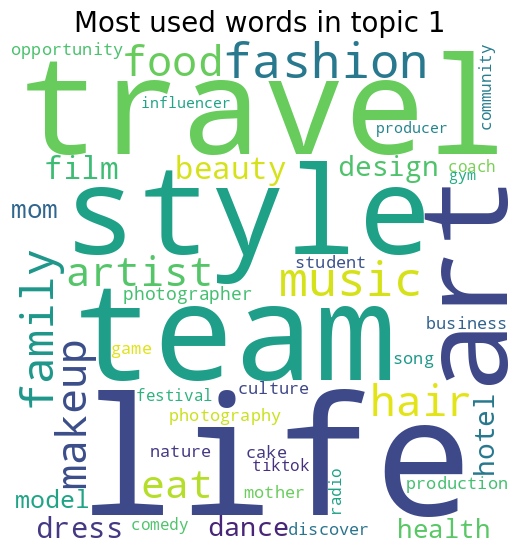

In [188]:
create_WordCloud(result['Lemma_text'].loc[result.Topic =='Travel Tourism Cuisine Food  Art Creativity Family Health Fashion Beauty Education Entertainment Sports  Business Animals  Nature  Technology  SocialMedia  Events  Celebrations '], title="Most used words in topic 1")

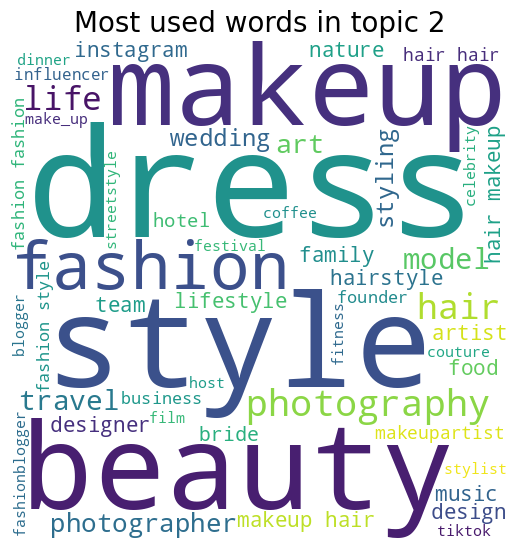

In [187]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'Fashion Beauty Photography Travel Lifestyle Art Culture Events Influencers SocialMedia Education Food Entrepreneurship Family'], title="Most used words in topic 2")

Create LDA-model:

In [189]:
id2word = corpora.Dictionary(reviews_lemmatized)
texts = reviews_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [190]:
# Use TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [191]:
from gensim.models.ldamulticore import LdaMulticore

def calc_coherence_values(dictionary, corpus, texts, limit = 12, start = 1, step = 1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, alpha=.1, eta=0.1, random_state = 42)
        model_list.append(model)
        print('model created')
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = calc_coherence_values(dictionary = id2word, corpus = corpus_tfidf, texts = texts, start = 20, limit = 30, step = 2)

model created
0.6038794801834297
model created
0.5941310671173269
model created
0.5862468178609485
model created
0.5729789649028431
model created
0.5759237806688345


In [192]:
import matplotlib.pyplot as plt

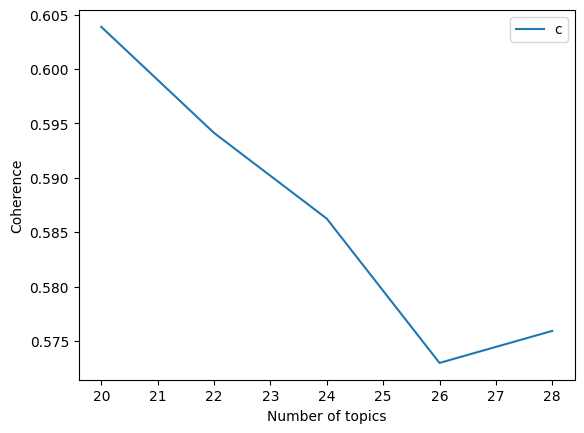

In [193]:
limit, start, step = 30, 20, 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

# LSI model

In [194]:
from gensim.models import LsiModel

In [195]:
def calc_coherence_values_Lsi(dictionary, corpus, texts, limit, start = 2, step = 2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word = dictionary, num_topics = num_topics)
        print('model created')
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list, coherence_values_Lsi = calc_coherence_values_Lsi(dictionary = id2word, corpus=corpus_tfidf, texts=texts, start = 2, limit = 30, step =2)

model created
0.5767676412673344
model created
0.5714462646360018
model created
0.4611965330397761
model created
0.47224187686752317
model created
0.5144849224843823
model created
0.4944039562665345
model created
0.5142240670338086
model created
0.4847921523620621
model created
0.4961734938388563
model created
0.48651819947383823
model created
0.4800759773254511
model created
0.4619833605090838
model created
0.45189681200557097
model created
0.47325491538852094


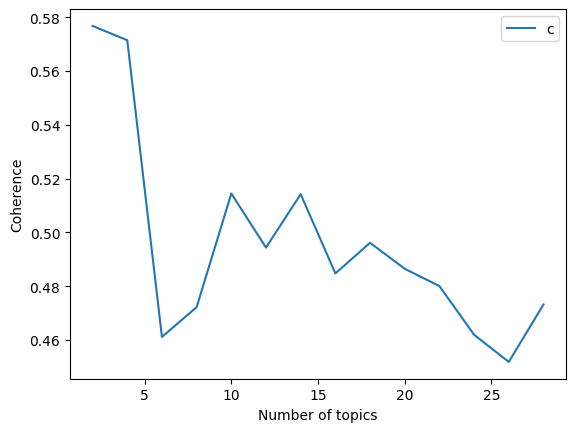

In [196]:
limit, start, step = 30, 2, 2
x = range(start, limit, step)
plt.plot(x, coherence_values_Lsi)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [197]:
index = coherence_values_Lsi.index(max(coherence_values_Lsi))
model_list[index].show_topics()

[(0,
  '-0.339*"dress" + -0.323*"hair" + -0.291*"fashion" + -0.284*"makeup" + -0.277*"style" + -0.262*"life" + -0.243*"beauty" + -0.210*"photography" + -0.203*"travel" + -0.161*"art"'),
 (1,
  '-0.462*"hair" + -0.400*"dress" + -0.377*"makeup" + 0.287*"life" + 0.280*"travel" + 0.169*"art" + 0.144*"family" + 0.136*"fashion" + 0.108*"team" + 0.108*"club"')]